<a href="https://colab.research.google.com/github/annasli378/AlphabetPSLdesktop/blob/main/analysis_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports



In [10]:
!pip install scikit_posthocs

In [11]:
import os

import pandas as pd
import numpy as np
from scipy.stats import shapiro, f_oneway, tukey_hsd, levene, kruskal
from scikit_posthocs import posthoc_dunn
import matplotlib.pyplot as plt

Functions

In [12]:
# Function to check normality of data distribution using Shapiro-Wilk test
def normality(Group1, Group2, Group3):
    print('Shapiro-Wilk Test p-values:')
    print(shapiro(Group1))
    print(shapiro(Group2))
    print(shapiro(Group3))
    return [shapiro(Group1).pvalue, shapiro(Group2).pvalue, shapiro(Group3).pvalue]

In [13]:
# Function to check equality of variances using Levene's test
def varin(Group1, Group2, Group3):
    return levene(Group1, Group2, Group3, center='median')

In [14]:
# krusgall walise test when ANOVA assumptions are not met
def get_kruskalwallis(Group1, Group2, Group3):
    try:
        kw = kruskal(Group1, Group2, Group3)
        print(kw)
        return kw.pvalue
    except:
        return 1

In [15]:
# Function performing an analysis of variance (ANOVA) and displaying the results
def get_anova(Group1, Group2, Group3):
    alpha_anova = 0.05
    # data = [Group1, Group2, Group3]
    f_val, p_val = f_oneway(Group1, Group2, Group3)
    if p_val < alpha_anova:
        print(f'One-Way ANOVA: There is a significant difference between groups (p = {round(p_val, 4)}).')
    else:
        print(f'One-Way ANOVA: No significant difference between groups (p = {round(p_val, 4)}).')
    return p_val

In [16]:
# Function to perform the Tukey HSD test and display the results
def get_tukey(Group1, Group2, Group3):
    tukey = tukey_hsd(Group1, Group2, Group3)
    print(tukey)

    return tukey.pvalue

In [17]:
# post - hoc for kuruskala-wallisa -> dunn
def get_dunn(Group1, Group2, Group3):
    dunn_p = posthoc_dunn([Group1, Group2, Group3], p_adjust='holm')
    print(dunn_p)
    return np.array(dunn_p)

In [18]:
def plot_boxplot(Group1, Group2, Group3, ft_name):
    fig, ax = plt.subplots(1, 1)
    ax.boxplot([Group1, Group2, Group3], 1)
    ax.set_xticklabels(["AK 1", "AK 2", "AK 3"])
    ax.set_ylabel("values")
    ax.set_title(ft_name)
    plt.savefig(newpath +'/'+ str(ft_name) + "_results.png")

Read files


CECHY_MORFOLOGICZNE_EPI
['perimeter to area epi', 'max depth epi', ' median depth epi', 'mean depth epi', 'std depth epi', 'var depth epi', 'q1 depth epi', 'g3 depth epi', 'diff depth epi']
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9795969724655151, pvalue=0.1447751522064209)
ShapiroResult(statistic=0.9615378975868225, pvalue=0.11649453639984131)
ShapiroResult(statistic=0.9738457202911377, pvalue=0.6115207672119141)
One-Way ANOVA: There is a significant difference between groups (p = 0.0011).
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.005     0.496    -0.005     0.015
 (0 - 2)      0.019     0.001     0.007     0.031
 (1 - 0)     -0.005     0.496    -0.015     0.005
 (1 - 2)      0.014     0.037     0.001     0.027
 (2 - 0)     -0.019     0.001    -0.031    -0.007
 (2 - 1)     -0.014     0.037    -0.027    -0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8345625996589661,

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.003     0.709    -0.012     0.006
 (0 - 2)     -0.021     0.000    -0.031    -0.010
 (1 - 0)      0.003     0.709    -0.006     0.012
 (1 - 2)     -0.017     0.002    -0.029    -0.006
 (2 - 0)      0.021     0.000     0.010     0.031
 (2 - 1)      0.017     0.002     0.006     0.029

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9761368632316589, pvalue=0.07991556078195572)
ShapiroResult(statistic=0.9419620037078857, pvalue=0.019320130348205566)
ShapiroResult(statistic=0.9553455710411072, pvalue=0.2040492594242096)
KruskalResult(statistic=1.766349495898794, pvalue=0.4134681685765408)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.911396861076355, pvalue=8.252307452494279e-06)
ShapiroResult(statistic=0.8744806051254272, pvalue=0.00010401273175375536)
ShapiroResult(statistic=0.8462807536125183, pvalue=0.00034499375033192337)
KruskalResult(st

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.805    -0.017     0.010
 (0 - 2)     -0.030     0.000    -0.045    -0.014
 (1 - 0)      0.004     0.805    -0.010     0.017
 (1 - 2)     -0.026     0.001    -0.044    -0.009
 (2 - 0)      0.030     0.000     0.014     0.045
 (2 - 1)      0.026     0.001     0.009     0.044

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9786136746406555, pvalue=0.12236905097961426)
ShapiroResult(statistic=0.9666798114776611, pvalue=0.18743807077407837)
ShapiroResult(statistic=0.9395390152931213, pvalue=0.07264630496501923)
One-Way ANOVA: No significant difference between groups (p = 0.2946).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6165382862091064, pvalue=2.201167071151037e-14)
ShapiroResult(statistic=0.6951441764831543, pvalue=1.090735590736358e-08)
ShapiroResult(statistic=0.7040671110153198, pvalue=1.0005742296925746e-06)
KruskalResult(st

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.723550  0.002347
2  0.723550  1.000000  0.002347
3  0.002347  0.002347  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.88761305809021, pvalue=6.704710244775924e-07)
ShapiroResult(statistic=0.8668304681777954, pvalue=6.279906665440649e-05)
ShapiroResult(statistic=0.9669184684753418, pvalue=0.4189840853214264)
KruskalResult(statistic=1.9605636961723576, pvalue=0.3752053330421122)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.33337247371673584, pvalue=8.790803023288657e-19)
ShapiroResult(statistic=0.4744604229927063, pvalue=7.114187711154685e-12)
ShapiroResult(statistic=0.7943093776702881, pvalue=3.19199898513034e-05)
KruskalResult(statistic=2.6452810577580976, pvalue=0.26643085395336374)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9772464036941528, pvalue=0.0967462882399559)
ShapiroResult(statistic=0.9827992916107178, pvalue=0.6982408165931702)
ShapiroResult(statistic=0.9874033331871033, pvalue=0.96406620740

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


['R glcm1 contr epi', 'R glcm2 contr epi', 'R glcm3 contr epi', 'R glcm4 contr epi', 'R glcm1 corr epi', 'R glcm2 corr epi', 'R glcm3 corr epi', 'R glcm4 corr epi', 'R glcm1 ener epi', 'R glcm2 ener epi', 'R glcm3 ener epi', 'R glcm4 ener epi', 'R glcm1 homo epi', 'R glcm2 homo epi', 'R glcm3 homo epi', 'R glcm4 homo epi', 'G glcm1 contr epi', 'G glcm2 contr epi', 'G glcm3 contr epi', 'G glcm4 contr epi', 'G glcm1 corr epi', 'G glcm2 corr epi', 'G glcm3 corr epi', 'G glcm4 corr epi', 'G glcm1 ener epi', 'G glcm2 ener epi', 'G glcm3 ener epi', 'G glcm4 ener epi', 'G glcm1 homo epi', 'G glcm2 homo epi', 'G glcm3 homo epi', 'G glcm4 homo epi', 'B glcm1 contr epi', 'B glcm2 contr epi', 'B glcm3 contr epi', 'B glcm4 contr epi', 'B glcm1 corr epi', 'B glcm2 corr epi', 'B glcm3 corr epi', 'B glcm4 corr epi', 'B glcm1 ener epi', 'B glcm2 ener epi', 'B glcm3 ener epi', 'B glcm4 ener epi', 'B glcm1 homo epi', 'B glcm2 homo epi', 'B glcm3 homo epi', 'B glcm4 homo epi', 'H glcm1 contr epi', 'H glc

<ipython-input-18-c4b99328c3c6>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1)


          1         2         3
1  1.000000  0.235729  0.235729
2  0.235729  1.000000  0.039287
3  0.235729  0.039287  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.23667961359024048, pvalue=5.87293582021704e-20)
ShapiroResult(statistic=0.19914376735687256, pvalue=9.910797090775456e-15)
ShapiroResult(statistic=0.3469351530075073, pvalue=7.94672799786511e-11)
KruskalResult(statistic=0.9009316845798103, pvalue=0.6373311866383082)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6380512118339539, pvalue=5.820845650102158e-14)
ShapiroResult(statistic=0.7122739553451538, pvalue=2.2008935118833506e-08)
ShapiroResult(statistic=0.7332221865653992, pvalue=2.8395950266713044e-06)
KruskalResult(statistic=8.285112498691856, pvalue=0.015882200704693948)
          1         2         3
1  1.000000  0.225898  0.013093
2  0.225898  1.000000  0.213359
3  0.013093  0.213359  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.9791

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.251628  0.037390
2  0.251628  1.000000  0.008217
3  0.037390  0.008217  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6274482011795044, pvalue=3.586378495069355e-14)
ShapiroResult(statistic=0.9268675446510315, pvalue=0.005236334633082151)
ShapiroResult(statistic=0.5666100978851318, pvalue=1.4671889481121525e-08)
KruskalResult(statistic=1.6832805713243193, pvalue=0.4310029752964645)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7112847566604614, pvalue=2.2467828379030275e-12)
ShapiroResult(statistic=0.9304044246673584, pvalue=0.007056864444166422)
ShapiroResult(statistic=0.5781255960464478, pvalue=2.0164970138125682e-08)
KruskalResult(statistic=1.082310919343854, pvalue=0.5820752991295239)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.4995536804199219, pvalue=2.0172388747370662e-16)
ShapiroResult(statistic=0.9345650672912598, pvalue=0.010084006935358047)
ShapiroResult(statistic=0.5181154012680054, pvalue=4.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.217828  0.027539
2  0.217828  1.000000  0.004696
3  0.027539  0.004696  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9451566934585571, pvalue=0.0005842572427354753)
ShapiroResult(statistic=0.9289816617965698, pvalue=0.006255188956856728)
ShapiroResult(statistic=0.5721439123153687, pvalue=1.7082724568240337e-08)
KruskalResult(statistic=2.148883493487965, pvalue=0.34148833907621884)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6611348390579224, pvalue=1.7318747347686014e-13)
ShapiroResult(statistic=0.9272361397743225, pvalue=0.005400536581873894)
ShapiroResult(statistic=0.5963691473007202, pvalue=3.3763878803938496e-08)
KruskalResult(statistic=1.1326834415583562, pvalue=0.5675980774949856)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9142965078353882, pvalue=1.1479534805403091e-05)
ShapiroResult(statistic=0.9447957277297974, pvalue=0.02491038665175438)
ShapiroResult(statistic=0.5017359852790833, pvalue=2.6

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.304767  0.028923
2  0.304767  1.000000  0.008463
3  0.028923  0.008463  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6289108991622925, pvalue=3.831911323621748e-14)
ShapiroResult(statistic=0.9293968081474304, pvalue=0.0064787189476192)
ShapiroResult(statistic=0.5973144173622131, pvalue=3.469165221758885e-08)
KruskalResult(statistic=1.584138969583023, pvalue=0.4529065415665702)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7194440960884094, pvalue=3.5086545214363385e-12)
ShapiroResult(statistic=0.9324029684066772, pvalue=0.008370027877390385)
ShapiroResult(statistic=0.6006232500076294, pvalue=3.815729954226299e-08)
KruskalResult(statistic=0.958333646616552, pvalue=0.6192991625396598)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.510654866695404, pvalue=3.035106456051738e-16)
ShapiroResult(statistic=0.941145122051239, pvalue=0.01796436868607998)
ShapiroResult(statistic=0.5213777422904968, pvalue=4.4253964937

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.304767  0.028923
2  0.304767  1.000000  0.008463
3  0.028923  0.008463  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6289108991622925, pvalue=3.831911323621748e-14)
ShapiroResult(statistic=0.9293968081474304, pvalue=0.0064787189476192)
ShapiroResult(statistic=0.5973144173622131, pvalue=3.469165221758885e-08)
KruskalResult(statistic=1.584138969583023, pvalue=0.4529065415665702)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7194440960884094, pvalue=3.5086545214363385e-12)
ShapiroResult(statistic=0.9324029684066772, pvalue=0.008370027877390385)
ShapiroResult(statistic=0.6006232500076294, pvalue=3.815729954226299e-08)
KruskalResult(statistic=0.958333646616552, pvalue=0.6192991625396598)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.510654866695404, pvalue=3.035106456051738e-16)
ShapiroResult(statistic=0.941145122051239, pvalue=0.01796436868607998)
ShapiroResult(statistic=0.5213777422904968, pvalue=4.4253964937

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.297098  0.011888
2  0.297098  1.000000  0.153034
3  0.011888  0.153034  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.584557294845581, pvalue=5.561042349267603e-15)
ShapiroResult(statistic=0.7307940721511841, pvalue=4.846785373047169e-08)
ShapiroResult(statistic=0.7787781953811646, pvalue=1.6677238818374462e-05)
KruskalResult(statistic=9.026851871265093, pvalue=0.010960844630197702)
          1         2         3
1  1.000000  0.264014  0.008276
2  0.264014  1.000000  0.139292
3  0.008276  0.139292  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.45599257946014404, pvalue=4.318981955124765e-17)
ShapiroResult(statistic=0.7672390937805176, pvalue=2.5448383667026064e-07)
ShapiroResult(statistic=0.5091411471366882, pvalue=3.2412987849284036e-09)
KruskalResult(statistic=3.721468259916914, pvalue=0.15555838836570135)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8535282611846924, pvalue=2.987494696071735e-

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.320992  0.015506
2  0.320992  1.000000  0.165721
3  0.015506  0.165721  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.5698579549789429, pvalue=3.0312666439435976e-15)
ShapiroResult(statistic=0.7277995944023132, pvalue=4.256314412032225e-08)
ShapiroResult(statistic=0.7749460339546204, pvalue=1.426339804311283e-05)
KruskalResult(statistic=9.605362230691027, pvalue=0.00820771170077224)
          1         2         3
1  1.000000  0.266888  0.005977
2  0.266888  1.000000  0.113005
3  0.005977  0.113005  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.4548876881599426, pvalue=4.15838715530331e-17)
ShapiroResult(statistic=0.7654865980148315, pvalue=2.341566300856357e-07)
ShapiroResult(statistic=0.4922785758972168, pvalue=2.1279649153882474e-09)
KruskalResult(statistic=3.914310673522136, pvalue=0.14125968615457238)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8507510423660278, pvalue=2.365984741459215e-08)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.309683  0.012044
2  0.309683  1.000000  0.147429
3  0.012044  0.147429  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.5855920314788818, pvalue=5.807102032313188e-15)
ShapiroResult(statistic=0.7333969473838806, pvalue=5.430155169960926e-08)
ShapiroResult(statistic=0.7781848311424255, pvalue=1.6276781025226228e-05)
KruskalResult(statistic=8.929895563488039, pvalue=0.011505296530824162)
          1         2         3
1  1.000000  0.262043  0.008753
2  0.262043  1.000000  0.145217
3  0.008753  0.145217  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.45748424530029297, pvalue=4.546055937288127e-17)
ShapiroResult(statistic=0.7671788930892944, pvalue=2.5375544510097825e-07)
ShapiroResult(statistic=0.49104297161102295, pvalue=2.0641102160823266e-09)
KruskalResult(statistic=3.74727340495635, pvalue=0.1535641778672189)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8533850312232971, pvalue=2.951571609344228e-

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.309683  0.012044
2  0.309683  1.000000  0.147429
3  0.012044  0.147429  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.5855920314788818, pvalue=5.807102032313188e-15)
ShapiroResult(statistic=0.7333969473838806, pvalue=5.430155169960926e-08)
ShapiroResult(statistic=0.7781848311424255, pvalue=1.6276781025226228e-05)
KruskalResult(statistic=8.929895563488039, pvalue=0.011505296530824162)
          1         2         3
1  1.000000  0.262043  0.008753
2  0.262043  1.000000  0.145217
3  0.008753  0.145217  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.45748424530029297, pvalue=4.546055937288127e-17)
ShapiroResult(statistic=0.7671788930892944, pvalue=2.5375544510097825e-07)
ShapiroResult(statistic=0.49104297161102295, pvalue=2.0641102160823266e-09)
KruskalResult(statistic=3.74727340495635, pvalue=0.1535641778672189)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8533850312232971, pvalue=2.951571609344228e-

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.904161  0.063503
2  0.904161  1.000000  0.063503
3  0.063503  0.063503  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.855105459690094, pvalue=3.414777438592864e-08)
ShapiroResult(statistic=0.8898066282272339, pvalue=0.00029955594800412655)
ShapiroResult(statistic=0.964674711227417, pvalue=0.36665430665016174)
KruskalResult(statistic=3.2949428229762066, pvalue=0.1925361382917138)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.21009641885757446, pvalue=2.922403900990558e-20)
ShapiroResult(statistic=0.9409227967262268, pvalue=0.017612846568226814)
ShapiroResult(statistic=0.935310959815979, pvalue=0.05516783148050308)
KruskalResult(statistic=3.685933018492193, pvalue=0.1583469908641746)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.4832855463027954, pvalue=1.1218118911814735e-16)
ShapiroResult(statistic=0.9328850507736206, pvalue=0.008723714388906956)
ShapiroResult(statistic=0.8940370082855225, pvalue=0.00438127

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


['LBP R 1 sleb', 'LBP R 2 sleb', 'LBP R 3 sleb', 'LBP R 4 sleb', 'LBP R 5 sleb', 'LBP R 6 sleb', 'LBP R 7 sleb', 'LBP R 8 sleb', 'LBP R 9 sleb', 'LBP R 10 sleb', 'LBP G 1 sleb', 'LBP G 2 sleb', 'LBP G 3 sleb', 'LBP G 4 sleb', 'LBP G 5 sleb', 'LBP G 6 sleb', 'LBP G 7 sleb', 'LBP G 8 sleb', 'LBP G 9 sleb', 'LBP G 10 sleb', 'LBP B 1 sleb', 'LBP B 2 sleb', 'LBP B 3 sleb', 'LBP B 4 sleb', 'LBP B 5 sleb', 'LBP B 6 sleb', 'LBP B 7 sleb', 'LBP B 8 sleb', 'LBP B 9 sleb', 'LBP B 10 sleb', 'LBP H 1 sleb', 'LBP H 2 sleb', 'LBP H 3 sleb', 'LBP H 4 sleb', 'LBP H 5 sleb', 'LBP H 6 sleb', 'LBP H 7 sleb', 'LBP H 8 sleb', 'LBP H 9 sleb', 'LBP H 10 sleb', 'LBP S 1 sleb', 'LBP S 2 sleb', 'LBP S 3 sleb', 'LBP S 4 sleb', 'LBP S 5 sleb', 'LBP S 6 sleb', 'LBP S 7 sleb', 'LBP S 8 sleb', 'LBP S 9 sleb', 'LBP S 10 sleb', 'LBP V 1 sleb', 'LBP V 2 sleb', 'LBP V 3 sleb', 'LBP V 4 sleb', 'LBP V 5 sleb', 'LBP V 6 sleb', 'LBP V 7 sleb', 'LBP V 8 sleb', 'LBP V 9 sleb', 'LBP B 10 sleb.1']
Shapiro-Wilk Test p-values:
Sha

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


ShapiroResult(statistic=0.8506738543510437, pvalue=2.2658508896711282e-05)
ShapiroResult(statistic=0.9088941216468811, pvalue=0.010511599481105804)
KruskalResult(statistic=3.1798382755544776, pvalue=0.20394210227917828)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9568816423416138, pvalue=0.003320114454254508)
ShapiroResult(statistic=0.7343195676803589, pvalue=5.6543235871231445e-08)
ShapiroResult(statistic=0.8216840624809265, pvalue=0.00010709528578445315)
KruskalResult(statistic=4.188602738631376, pvalue=0.12315625434386533)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9355285167694092, pvalue=0.0001565273996675387)
ShapiroResult(statistic=0.7410578727722168, pvalue=7.61829923590085e-08)
ShapiroResult(statistic=0.895844042301178, pvalue=0.00486228009685874)
KruskalResult(statistic=4.07669544181479, pvalue=0.13024373218753768)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9076683521270752, pvalue=5.4433216973848175e-06)
ShapiroResult(statistic=0.6381701231002

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.309757  0.091355
2  0.309757  1.000000  0.029821
3  0.091355  0.029821  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9099968671798706, pvalue=7.051030024740612e-06)
ShapiroResult(statistic=0.8750935792922974, pvalue=0.00010837436275323853)
ShapiroResult(statistic=0.8827353715896606, pvalue=0.002316015772521496)
KruskalResult(statistic=1.97111324242168, pvalue=0.37323142058206593)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9553282856941223, pvalue=0.0026138322427868843)
ShapiroResult(statistic=0.8499984741210938, pvalue=2.1741123418905772e-05)
ShapiroResult(statistic=0.8612090349197388, pvalue=0.0007327090133912861)
KruskalResult(statistic=2.61956637005206, pvalue=0.26987856375559627)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9585214257240295, pvalue=0.004286843817681074)
ShapiroResult(statistic=0.6993659138679504, pvalue=1.2936663296159168e-08)
ShapiroResult(statistic=0.7500337958335876, pvalue=5.34

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.303373  0.101886
2  0.303373  1.000000  0.032613
3  0.101886  0.032613  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9130536913871765, pvalue=9.958060218195897e-06)
ShapiroResult(statistic=0.878562331199646, pvalue=0.000136991759063676)
ShapiroResult(statistic=0.862038254737854, pvalue=0.0007648071623407304)
KruskalResult(statistic=2.0394958192042543, pvalue=0.3606858541538068)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.953399121761322, pvalue=0.0019497147295624018)
ShapiroResult(statistic=0.8513277769088745, pvalue=2.358587153139524e-05)
ShapiroResult(statistic=0.8699864745140076, pvalue=0.001160228974185884)
KruskalResult(statistic=2.4797241084519532, pvalue=0.2894241400224625)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9589619040489197, pvalue=0.00459393672645092)
ShapiroResult(statistic=0.6995069980621338, pvalue=1.3011044686095374e-08)
ShapiroResult(statistic=0.7533988952636719, pvalue=6.0791403

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.311975  0.092671
2  0.311975  1.000000  0.030608
3  0.092671  0.030608  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.902960479259491, pvalue=3.2600444228592096e-06)
ShapiroResult(statistic=0.8745367527008057, pvalue=0.00010440476035000756)
ShapiroResult(statistic=0.8781273365020752, pvalue=0.001798001118004322)
KruskalResult(statistic=2.084642788491217, pvalue=0.3526351259183759)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9566715955734253, pvalue=0.003213923890143633)
ShapiroResult(statistic=0.8503739237785339, pvalue=2.2246111257118173e-05)
ShapiroResult(statistic=0.8730835914611816, pvalue=0.0013687685132026672)
KruskalResult(statistic=2.454212310668846, pvalue=0.2931396520572613)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9591403007507324, pvalue=0.004724816884845495)
ShapiroResult(statistic=0.6995682716369629, pvalue=1.3043396585032951e-08)
ShapiroResult(statistic=0.749975323677063, pvalue=5.3295

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.309757  0.091355
2  0.309757  1.000000  0.029821
3  0.091355  0.029821  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9103657603263855, pvalue=7.34851209927001e-06)
ShapiroResult(statistic=0.8749634623527527, pvalue=0.00010743277380242944)
ShapiroResult(statistic=0.882309079170227, pvalue=0.002262042835354805)
KruskalResult(statistic=1.963702875224482, pvalue=0.37461687661957593)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9551444053649902, pvalue=0.0025413446128368378)
ShapiroResult(statistic=0.8501019477844238, pvalue=2.1879102860111743e-05)
ShapiroResult(statistic=0.859632134437561, pvalue=0.0006755481008440256)
KruskalResult(statistic=2.584754126276868, pvalue=0.27461722414136513)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.958400309085846, pvalue=0.004206249490380287)
ShapiroResult(statistic=0.6993474364280701, pvalue=1.292697060506498e-08)
ShapiroResult(statistic=0.7497681379318237, pvalue=5.28742

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.309757  0.091355
2  0.309757  1.000000  0.029821
3  0.091355  0.029821  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9103657603263855, pvalue=7.34851209927001e-06)
ShapiroResult(statistic=0.8749634623527527, pvalue=0.00010743277380242944)
ShapiroResult(statistic=0.882309079170227, pvalue=0.002262042835354805)
KruskalResult(statistic=1.963702875224482, pvalue=0.37461687661957593)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9551444053649902, pvalue=0.0025413446128368378)
ShapiroResult(statistic=0.8501019477844238, pvalue=2.1879102860111743e-05)
ShapiroResult(statistic=0.859632134437561, pvalue=0.0006755481008440256)
KruskalResult(statistic=2.584754126276868, pvalue=0.27461722414136513)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.958400309085846, pvalue=0.004206249490380287)
ShapiroResult(statistic=0.6993474364280701, pvalue=1.292697060506498e-08)
ShapiroResult(statistic=0.7497681379318237, pvalue=5.28742

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


ShapiroResult(statistic=0.899595320224762, pvalue=0.006048106122761965)
KruskalResult(statistic=2.170470519061476, pvalue=0.33782230062932755)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9403262734413147, pvalue=0.0002982665610034019)
ShapiroResult(statistic=0.964644730091095, pvalue=0.1554095447063446)
ShapiroResult(statistic=0.8283817768096924, pvalue=0.0001460625499021262)
KruskalResult(statistic=3.2267885590559966, pvalue=0.19921028980303931)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9012891054153442, pvalue=2.7265186872682534e-06)
ShapiroResult(statistic=0.878295361995697, pvalue=0.00013452788698486984)
ShapiroResult(statistic=0.6306819319725037, pvalue=9.280930868271753e-08)
KruskalResult(statistic=3.3803834161003405, pvalue=0.18448415350533814)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8972806334495544, pvalue=1.788024860616133e-06)
ShapiroResult(statistic=0.7924151420593262, pvalue=8.792524113232503e-07)
ShapiroResult(statistic=0.95014739036560

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.797052  0.014128
2  0.797052  1.000000  0.039436
3  0.014128  0.039436  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.25639885663986206, pvalue=9.975742611192108e-20)
ShapiroResult(statistic=0.1609143614768982, pvalue=4.55903201881892e-15)
ShapiroResult(statistic=0.6080687046051025, pvalue=4.736208225608607e-08)
KruskalResult(statistic=4.049334363994858, pvalue=0.13203778042621803)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9837503433227539, pvalue=0.28924131393432617)
ShapiroResult(statistic=0.9737024903297424, pvalue=0.350554883480072)
ShapiroResult(statistic=0.8528233766555786, pvalue=0.0004778852453455329)
KruskalResult(statistic=5.491788866882977, pvalue=0.06419086080759859)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=0.12915760278701782, pvalue=2.4389534445876104e-15)
ShapiroResult(statistic=1.0, pvalue=1.0)
KruskalResult(statistic=2.6458333333302955, pvalue

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.553901  0.056293
2  0.553901  1.000000  0.045878
3  0.056293  0.045878  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.23862576484680176, pvalue=6.185325102191666e-20)
ShapiroResult(statistic=0.13592082262039185, pvalue=2.7825568065642904e-15)
ShapiroResult(statistic=0.8212984800338745, pvalue=0.00010521761578274891)
KruskalResult(statistic=2.71314352530957, pvalue=0.2575421809820155)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7872623801231384, pvalue=2.1166179919873684e-10)
ShapiroResult(statistic=0.9736981391906738, pvalue=0.35042330622673035)
ShapiroResult(statistic=0.7208863496780396, pvalue=1.8121991161024198e-06)
KruskalResult(statistic=1.9104478743098012, pvalue=0.3847259804641867)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=1.0, pvalue=1.0)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.2984158992767334, pvalu

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


['LBP R 1 episleb', 'LBP R 2 episleb', 'LBP R 3 episleb', 'LBP R 4 episleb', 'LBP R 5 episleb', 'LBP R 6 episleb', 'LBP R 7 episleb', 'LBP R 8 episleb', 'LBP R 9 episleb', 'LBP R 10 episleb', 'LBP G 1 episleb', 'LBP G 2 episleb', 'LBP G 3 episleb', 'LBP G 4 episleb', 'LBP G 5 episleb', 'LBP G 6 episleb', 'LBP G 7 episleb', 'LBP G 8 episleb', 'LBP G 9 episleb', 'LBP G 10 episleb', 'LBP B 1 episleb', 'LBP B 2 episleb', 'LBP B 3 episleb', 'LBP B 4 episleb', 'LBP B 5 episleb', 'LBP B 6 episleb', 'LBP B 7 episleb', 'LBP B 8 episleb', 'LBP B 9 episleb', 'LBP B 10 episleb', 'LBP H 1 episleb', 'LBP H 2 episleb', 'LBP H 3 episleb', 'LBP H 4 episleb', 'LBP H 5 episleb', 'LBP H 6 episleb', 'LBP H 7 episleb', 'LBP H 8 episleb', 'LBP H 9 episleb', 'LBP H 10 episleb', 'LBP S 1 episleb', 'LBP S 2 episleb', 'LBP S 3 episleb', 'LBP S 4 episleb', 'LBP S 5 episleb', 'LBP S 6 episleb', 'LBP S 7 episleb', 'LBP S 8 episleb', 'LBP S 9 episleb', 'LBP S 10 episleb', 'LBP V 1 episleb', 'LBP V 2 episleb', 'LBP V

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.050186  0.884294
2  0.050186  1.000000  0.168612
3  0.884294  0.168612  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9107897877693176, pvalue=7.706878022872843e-06)
ShapiroResult(statistic=0.907404899597168, pvalue=0.001099942484870553)
ShapiroResult(statistic=0.9048324227333069, pvalue=0.008239846676588058)
KruskalResult(statistic=2.221502579151493, pvalue=0.3293114598473272)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9746509194374084, pvalue=0.06186907738447189)
ShapiroResult(statistic=0.961043655872345, pvalue=0.11125939339399338)
ShapiroResult(statistic=0.8933933973312378, pvalue=0.004222346935421228)
KruskalResult(statistic=1.9978701311156848, pvalue=0.3682714173363222)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9149041175842285, pvalue=1.231081932928646e-05)
ShapiroResult(statistic=0.9293327927589417, pvalue=0.0064437054097652435)
ShapiroResult(statistic=0.9458562135696411, pvalue=0.10986091941

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.041755  0.959766
2  0.041755  1.000000  0.124875
3  0.959766  0.124875  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9184723496437073, pvalue=1.8659440684132278e-05)
ShapiroResult(statistic=0.9183028936386108, pvalue=0.002591523341834545)
ShapiroResult(statistic=0.9095615148544312, pvalue=0.010944093577563763)
KruskalResult(statistic=2.7768436165277985, pvalue=0.24946870356692608)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9757089018821716, pvalue=0.07423456013202667)
ShapiroResult(statistic=0.9654414057731628, pvalue=0.16726867854595184)
ShapiroResult(statistic=0.9036757349967957, pvalue=0.00769233051687479)
KruskalResult(statistic=2.1757393702230265, pvalue=0.3369335041668969)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.927960991859436, pvalue=5.911593325436115e-05)
ShapiroResult(statistic=0.9290342330932617, pvalue=0.006283063441514969)
ShapiroResult(statistic=0.949699342250824, pvalue=0.1413165032

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.042076  0.901701
2  0.042076  1.000000  0.145115
3  0.901701  0.145115  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9106103181838989, pvalue=7.553000614279881e-06)
ShapiroResult(statistic=0.9092892408370972, pvalue=0.0012718737125396729)
ShapiroResult(statistic=0.9072492718696594, pvalue=0.009520872496068478)
KruskalResult(statistic=2.1651145084791796, pvalue=0.33872820300214873)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9741606116294861, pvalue=0.05686459317803383)
ShapiroResult(statistic=0.9621739387512207, pvalue=0.12359155714511871)
ShapiroResult(statistic=0.8989283442497253, pvalue=0.005816772114485502)
KruskalResult(statistic=1.8701352898782502, pvalue=0.3925593099827275)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9149315357208252, pvalue=1.2349764801911078e-05)
ShapiroResult(statistic=0.9281957745552063, pvalue=0.00585401663556695)
ShapiroResult(statistic=0.9430062770843506, pvalue=0.0911412

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.042076  0.901701
2  0.042076  1.000000  0.145115
3  0.901701  0.145115  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9106103181838989, pvalue=7.553000614279881e-06)
ShapiroResult(statistic=0.9092892408370972, pvalue=0.0012718737125396729)
ShapiroResult(statistic=0.9072492718696594, pvalue=0.009520872496068478)
KruskalResult(statistic=2.1651145084791796, pvalue=0.33872820300214873)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9741606116294861, pvalue=0.05686459317803383)
ShapiroResult(statistic=0.9621739387512207, pvalue=0.12359155714511871)
ShapiroResult(statistic=0.8989283442497253, pvalue=0.005816772114485502)
KruskalResult(statistic=1.8701352898782502, pvalue=0.3925593099827275)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9149315357208252, pvalue=1.2349764801911078e-05)
ShapiroResult(statistic=0.9281957745552063, pvalue=0.00585401663556695)
ShapiroResult(statistic=0.9430062770843506, pvalue=0.0911412

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.039589  0.528525
2  0.039589  1.000000  0.348496
3  0.528525  0.348496  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9398941993713379, pvalue=0.00028118371847085655)
ShapiroResult(statistic=0.9700021147727966, pvalue=0.2533724308013916)
ShapiroResult(statistic=0.9504579901695251, pvalue=0.14850366115570068)
KruskalResult(statistic=5.131565355061992, pvalue=0.07685900208040643)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9426342248916626, pvalue=0.00041003533988259733)
ShapiroResult(statistic=0.9533671140670776, pvalue=0.0545203872025013)
ShapiroResult(statistic=0.9078444242477417, pvalue=0.009867466054856777)
KruskalResult(statistic=1.2739328436397321, pvalue=0.5288944355201507)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9694895148277283, pvalue=0.025633394718170166)
ShapiroResult(statistic=0.9213281273841858, pvalue=0.003312241518869996)
ShapiroResult(statistic=0.819587230682373, pvalue=9.72969282884

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.044101  0.635133
2  0.044101  1.000000  0.635133
3  0.635133  0.635133  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9336093664169312, pvalue=0.0001216841847053729)
ShapiroResult(statistic=0.9597901105880737, pvalue=0.09900546818971634)
ShapiroResult(statistic=0.9510458111763, pvalue=0.15431685745716095)
KruskalResult(statistic=6.292444599733641, pvalue=0.043014315509558)
          1         2         3
1  1.000000  0.048409  0.335651
2  0.048409  1.000000  0.527668
3  0.335651  0.527668  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9438061118125916, pvalue=0.00048295623855665326)
ShapiroResult(statistic=0.9541251063346863, pvalue=0.05848097801208496)
ShapiroResult(statistic=0.9046599864959717, pvalue=0.008155683055520058)
KruskalResult(statistic=1.7300603734823545, pvalue=0.4210388426449174)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9707252383232117, pvalue=0.03160012513399124)
ShapiroResult

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7824681401252747, pvalue=1.5422138566201227e-10)
ShapiroResult(statistic=0.9267324209213257, pvalue=0.005177457816898823)
ShapiroResult(statistic=0.7647298574447632, pvalue=9.468035386817064e-06)
KruskalResult(statistic=2.4377821257688765, pvalue=0.2955577402092675)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8730926513671875, pvalue=1.6770142963196122e-07)
ShapiroResult(statistic=0.7913473844528198, pvalue=8.327501745952759e-07)
ShapiroResult(statistic=0.6612474322319031, pvalue=2.4036151557993435e-07)
KruskalResult(statistic=13.53117156527685, pvalue=0.0011527720226219085)
          1         2         3
1  1.000000  0.001731  0.049924
2  0.001731  1.000000  0.507273
3  0.049924  0.507273  1.000000
Shapiro-Wilk Test p

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.187485  0.009426
2  0.187485  1.000000  0.187485
3  0.009426  0.187485  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=1.0, pvalue=1.0)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.28152644634246826, pvalue=1.990488781203363e-19)
ShapiroResult(statistic=0.1847013235092163, pvalue=7.367998253887415e-15)
ShapiroResult(statistic=0.8342238664627075, pvalue=0.00019240673282183707)
KruskalResult(statistic=7.944973056678611, pvalue=0.018826562106021662)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.459830  0.014523
2  0.459830  1.000000  0.102406
3  0.014523  0.102406  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.47015923261642456, pvalue=7.056326419365667e-17)
ShapiroResult(statistic=0.4641680121421814, pvalue=5.347549660028594e-12)
ShapiroResult(statistic=0.7626461982727051, pvalue=8.719506695342716e-06)
KruskalResult(statistic=8.988123216636728, pvalue=0.011175162375763941)
          1         2         3
1  1.000000  0.643656  0.008974
2  0.643656  1.000000  0.042924
3  0.008974  0.042924  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=1.0, pvalue=1.0)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.3279889225959778, pvalue=7.504453935719561e-19)
ShapiroResult(statistic=0.3703762888908386, pvalue=4.666809473585776e-13)
ShapiroResult(statistic=0.39091163873672485, pvalue=2.0285015334131629e-10)
KruskalResult(stat

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.182353  0.010537
2  0.182353  1.000000  0.192424
3  0.010537  0.192424  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=1.0, pvalue=1.0)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6348867416381836, pvalue=5.032209864737e-14)
ShapiroResult(statistic=0.4760724902153015, pvalue=7.442104224542057e-12)
ShapiroResult(statistic=0.8284532427787781, pvalue=0.00014655130507890135)
KruskalResult(statistic=4.6170982180729006, pvalue=0.09940537333977603)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.46988582611083984, pvalue=6.989185823405962e-17)
ShapiroResult(statistic=0.5174815654754639, pvalue=2.451379550738597e-11)
ShapiroResult(statistic=0.7641400694847107, pvalue=9.249500180885661e-06)
KruskalResult(statistic=5.060542555651824, pvalue=0.0796374134909153)
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResu

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


          1         2         3
1  1.000000  0.387837  0.003741
2  0.387837  1.000000  0.052722
3  0.003741  0.052722  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9511439204216003, pvalue=0.0013915603049099445)
ShapiroResult(statistic=0.9509972333908081, pvalue=0.04382002353668213)
ShapiroResult(statistic=0.9036480188369751, pvalue=0.007679707370698452)
KruskalResult(statistic=10.21832622447231, pvalue=0.006041136561908958)
          1         2         3
1  1.000000  0.463594  0.004266
2  0.463594  1.000000  0.044234
3  0.004266  0.044234  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8057038187980652, pvalue=7.489565634344331e-10)
ShapiroResult(statistic=0.7020576000213623, pvalue=1.443504782372429e-08)
ShapiroResult(statistic=0.8672897815704346, pvalue=0.00100605096668005)
KruskalResult(statistic=9.559460690059385, pvalue=0.008398263295623699)
          1         2         3
1  1.000000  0.197272  0.006559
2  0.197272  1.000000  0.162546
3  0.0065

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


          1         2         3
1  1.000000  0.460706  0.004415
2  0.460706  1.000000  0.045714
3  0.004415  0.045714  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9518004059791565, pvalue=0.0015341810649260879)
ShapiroResult(statistic=0.9509972333908081, pvalue=0.04382002353668213)
ShapiroResult(statistic=0.9075888395309448, pvalue=0.009717023000121117)
KruskalResult(statistic=10.522950791529292, pvalue=0.005187645239897928)
          1         2         3
1  1.000000  0.478360  0.003651
2  0.478360  1.000000  0.037847
3  0.003651  0.037847  1.000000
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.809226393699646, pvalue=9.618910112862977e-10)
ShapiroResult(statistic=0.7214868068695068, pvalue=3.2460672372280897e-08)
ShapiroResult(statistic=0.8729192614555359, pvalue=0.0013567587593570352)
KruskalResult(statistic=9.423914708840003, pvalue=0.008987169279700833)
          1         2         3
1  1.000000  0.278177  0.006570
2  0.278177  1.000000  0.114364
3  0.0

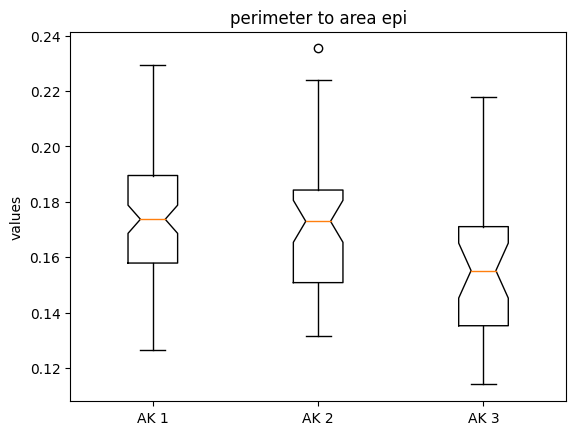

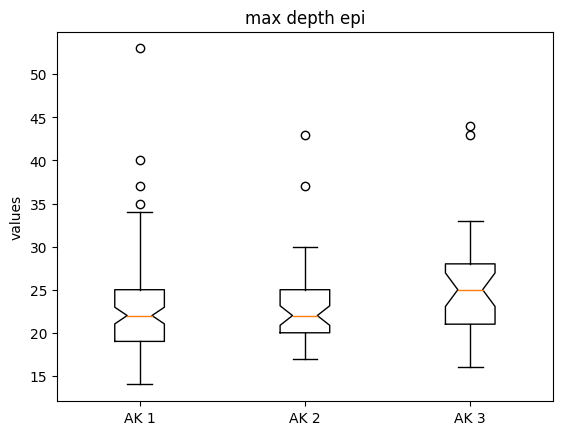

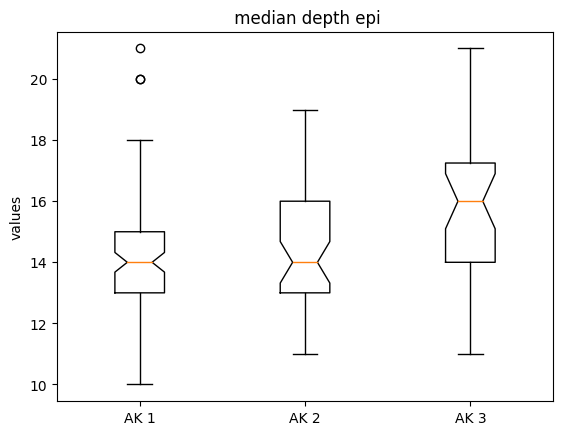

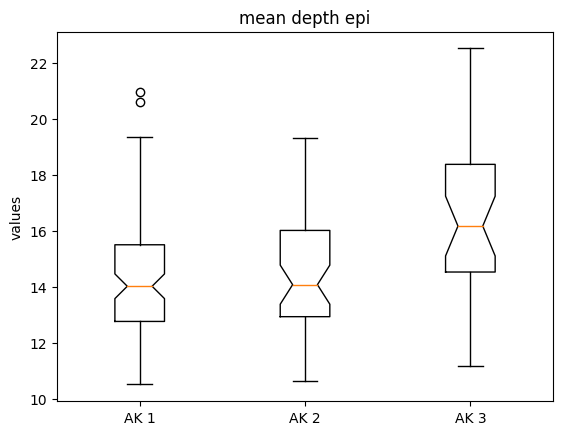

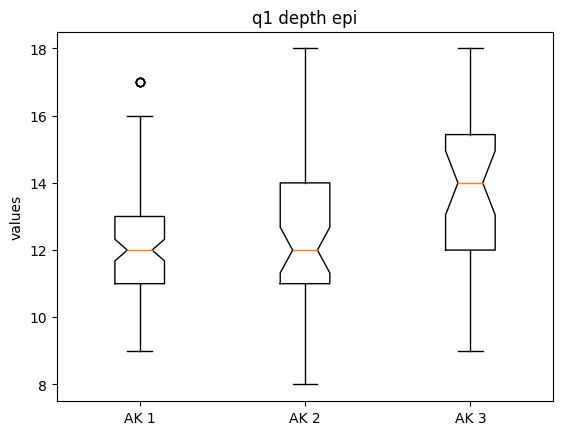

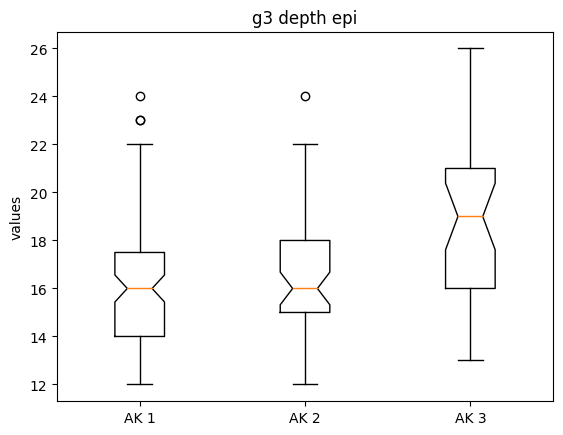

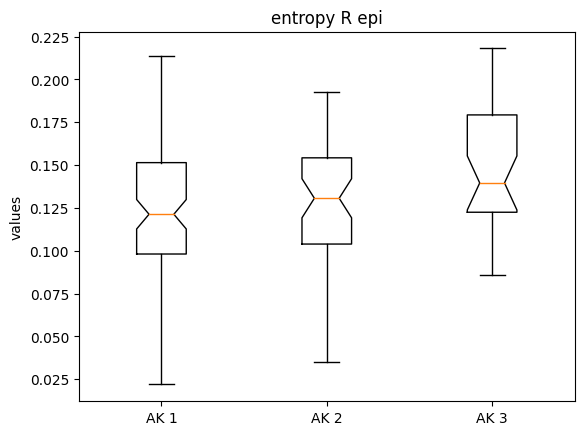

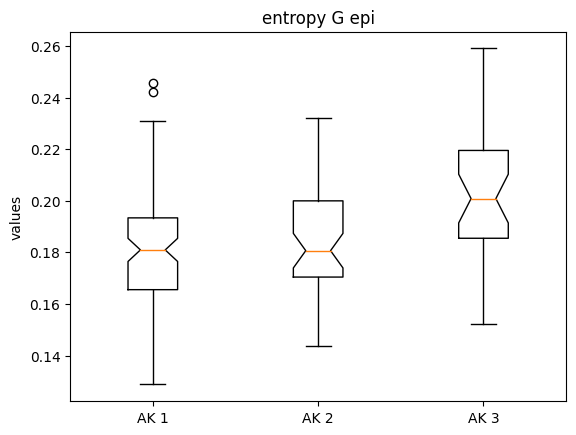

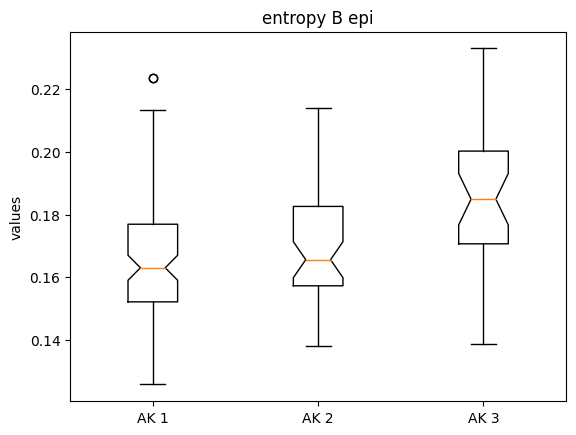

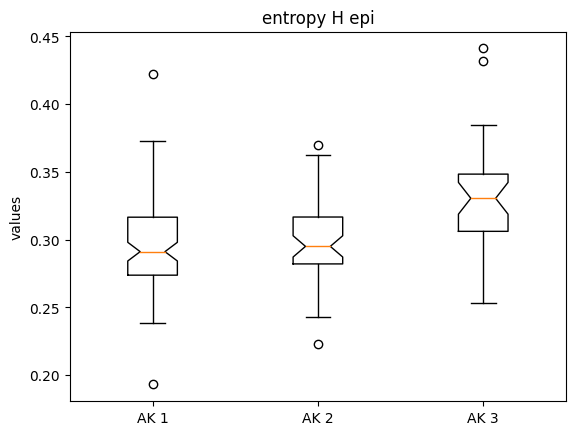

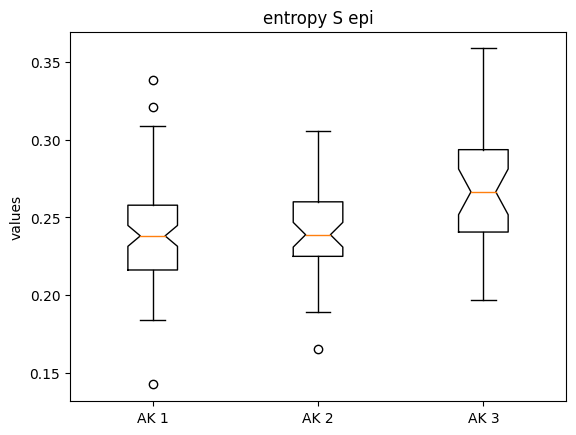

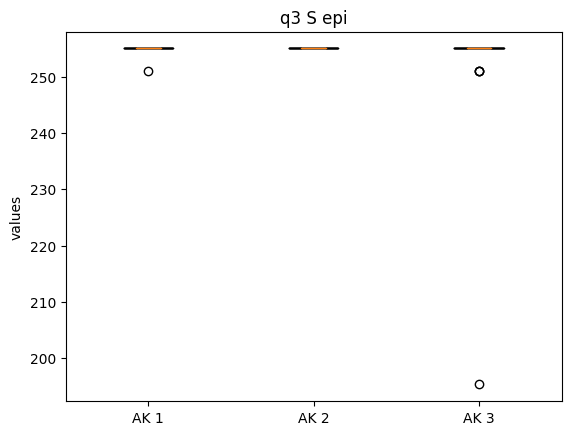

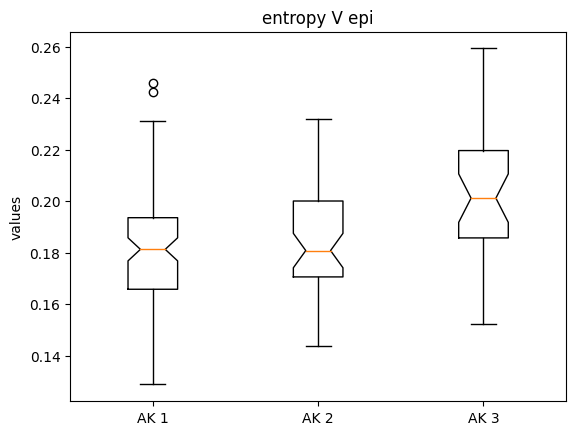

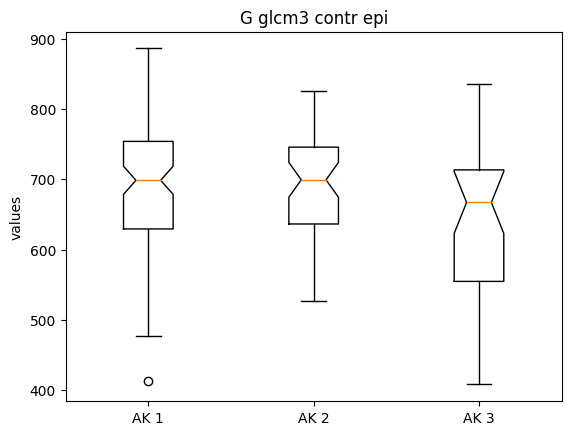

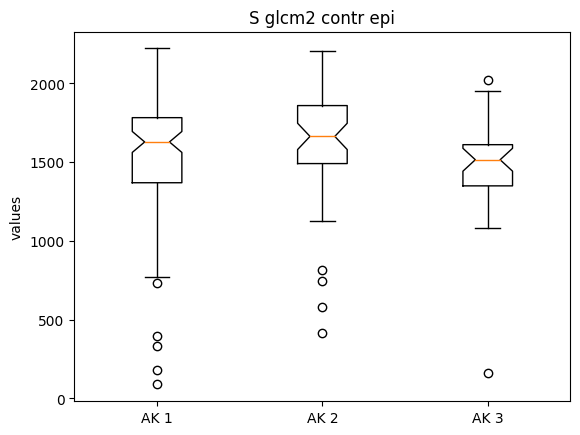

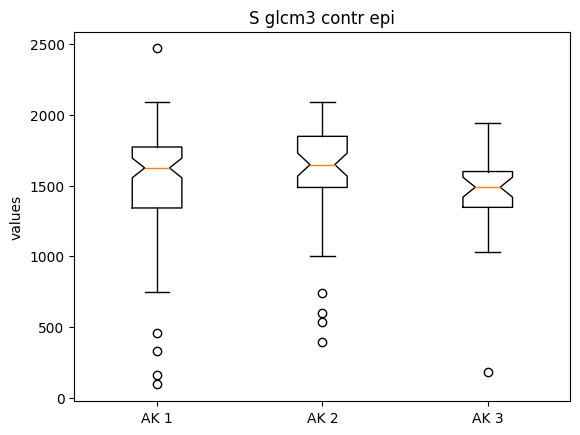

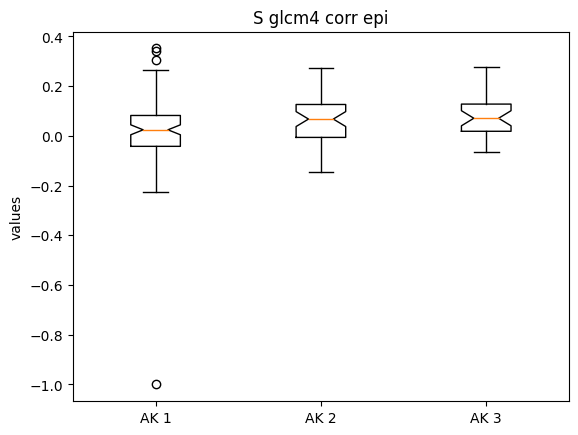

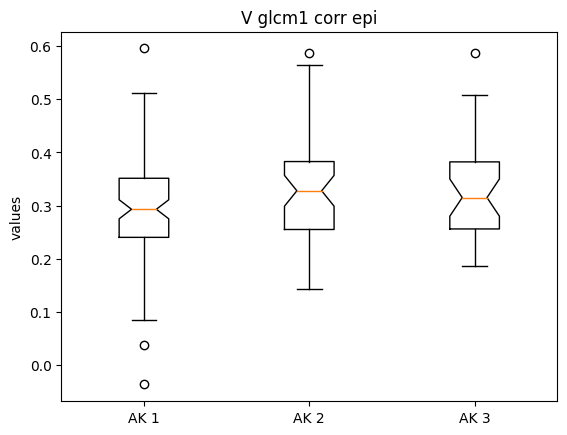

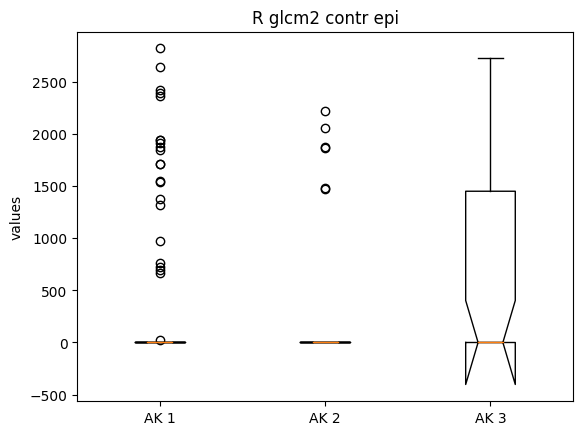

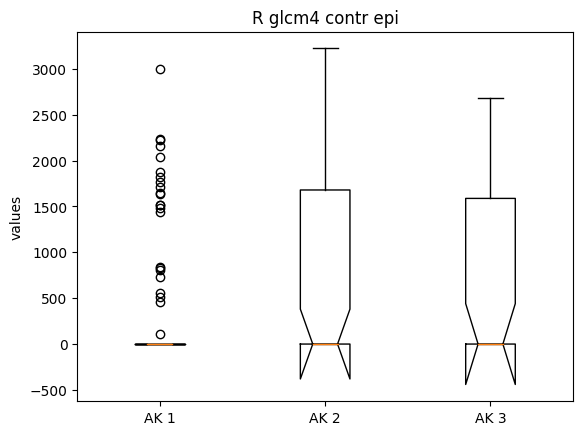

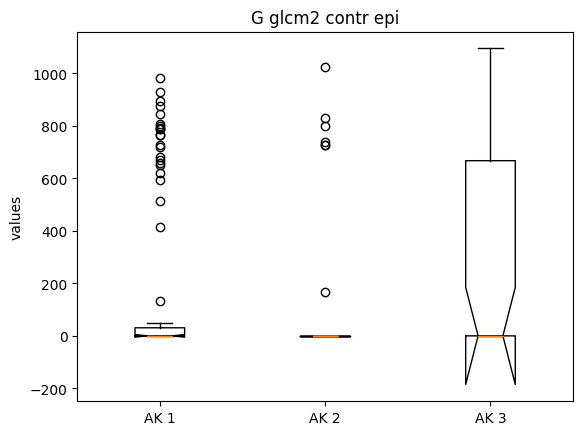

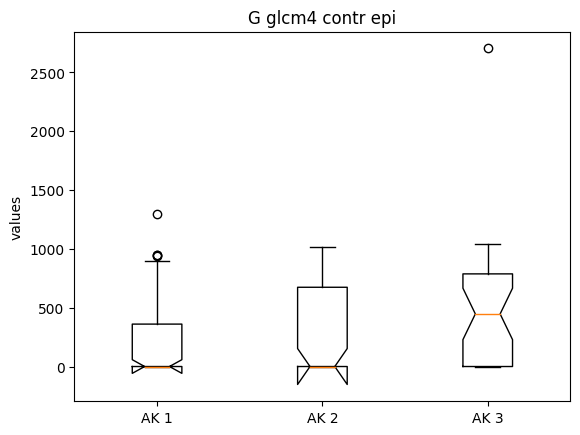

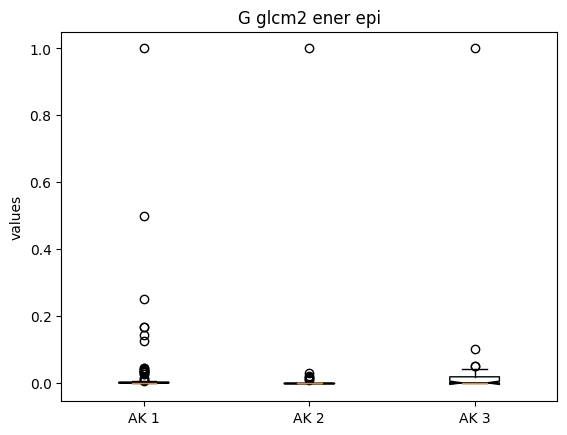

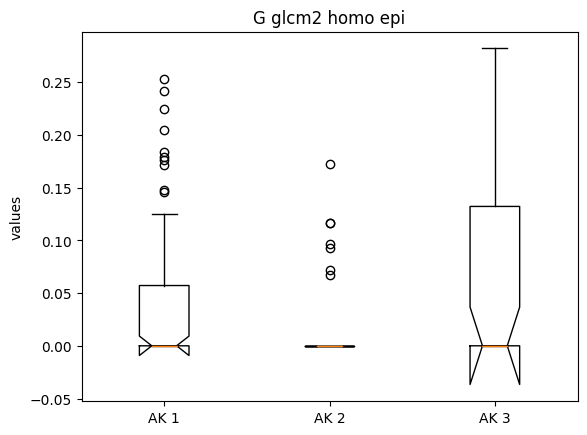

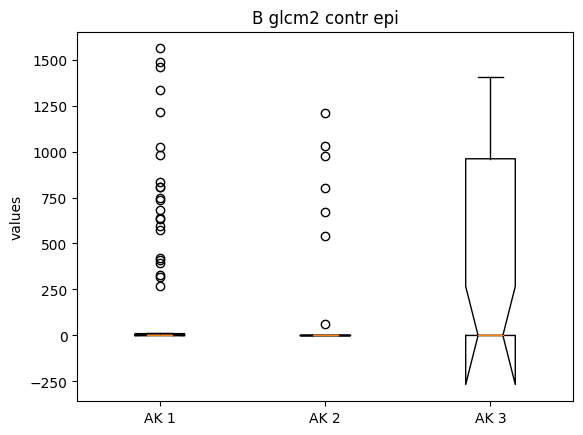

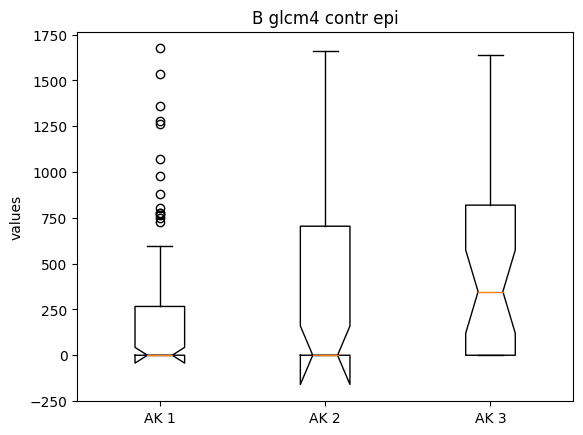

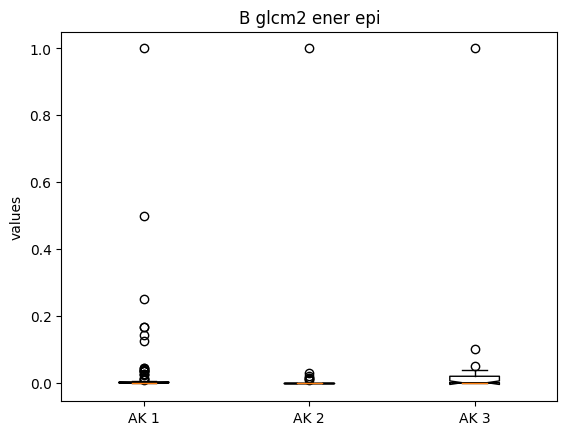

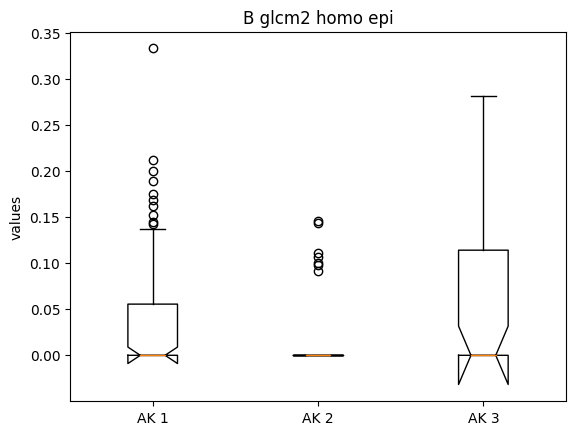

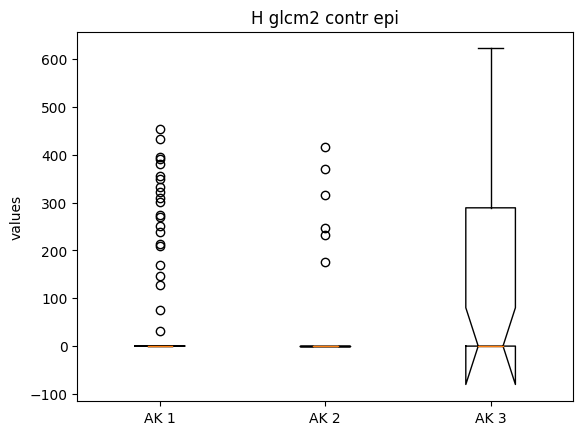

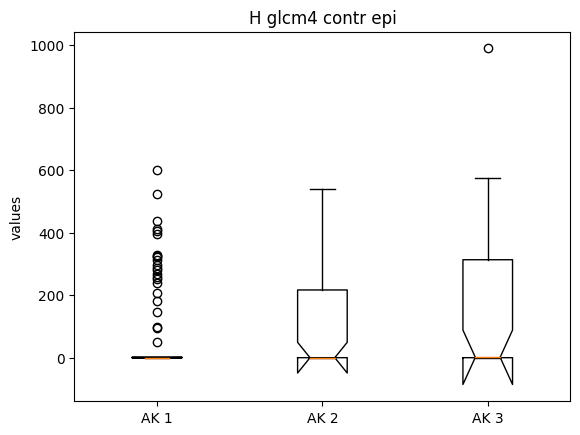

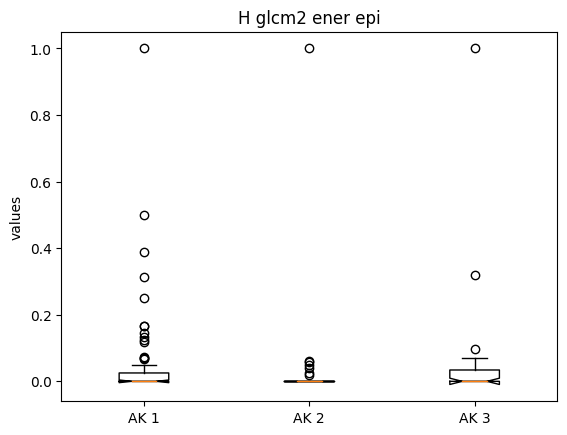

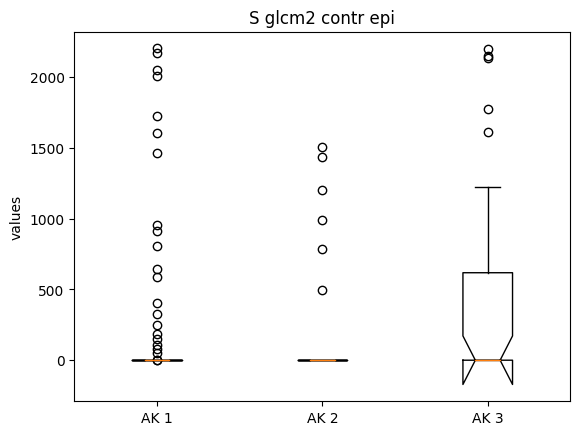

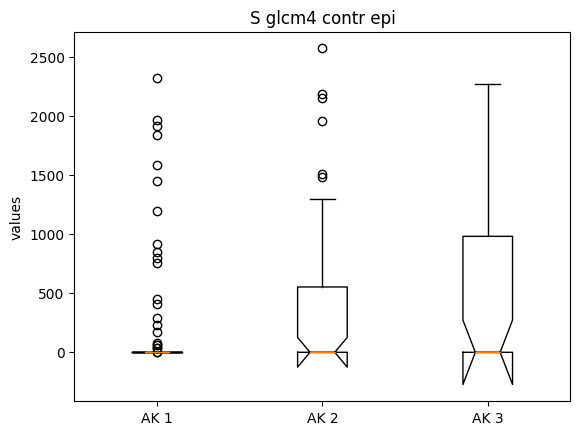

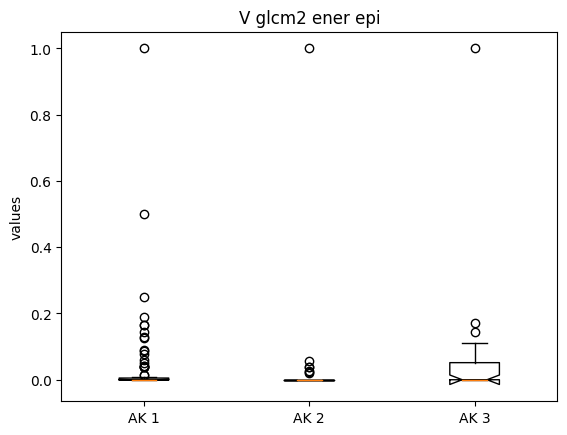

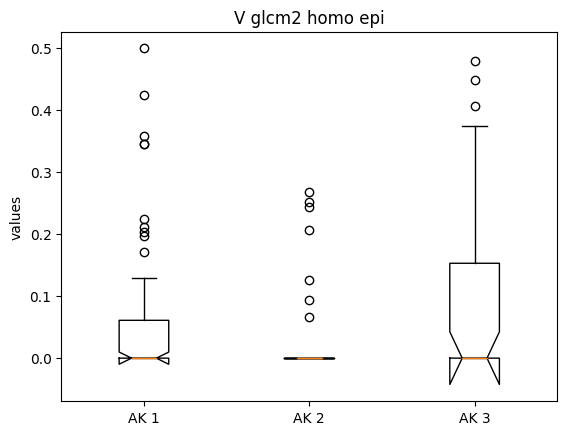

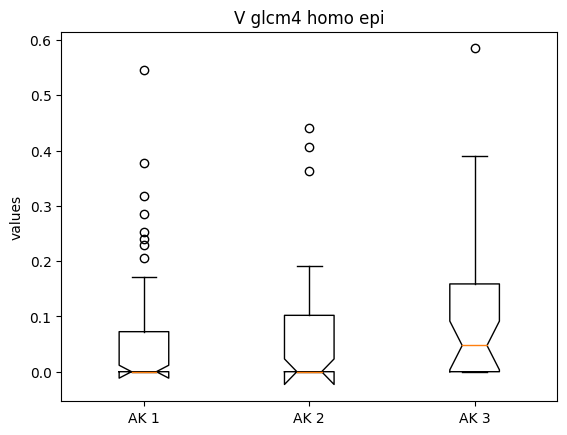

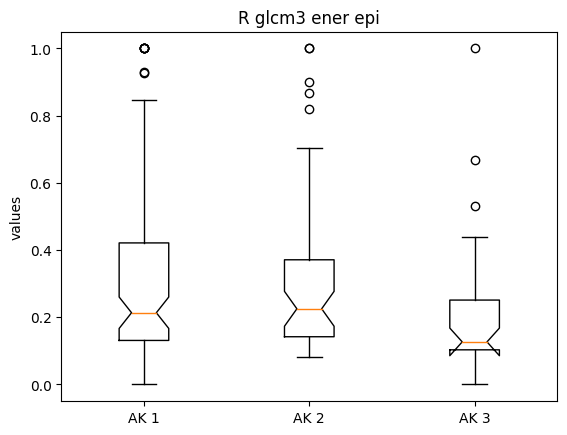

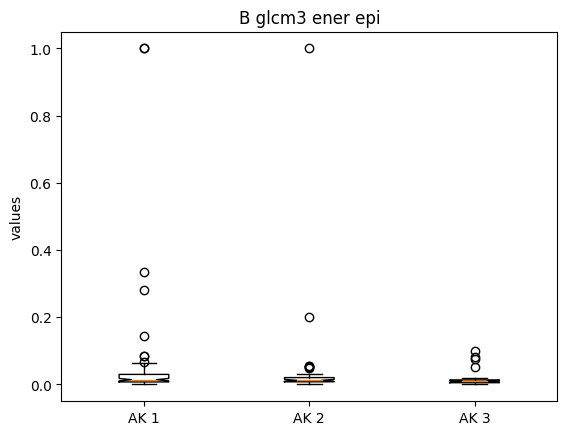

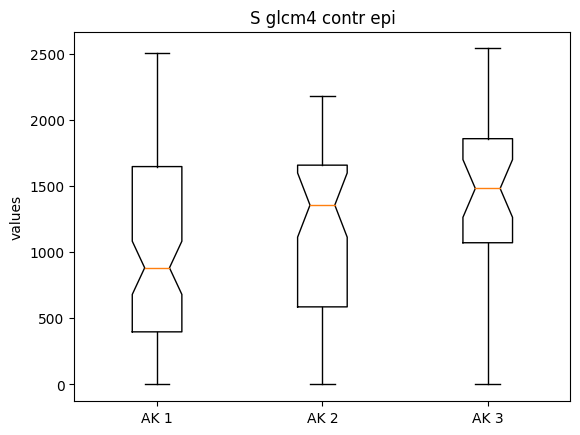

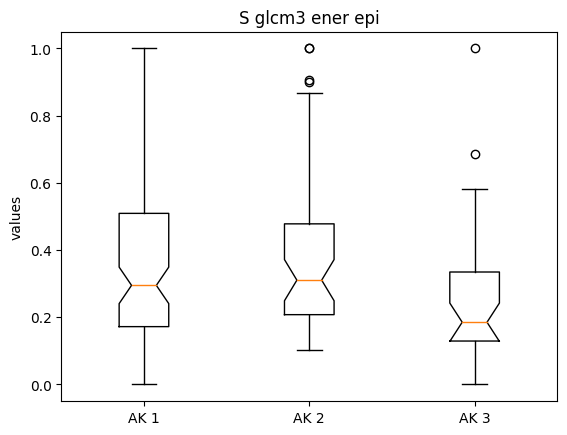

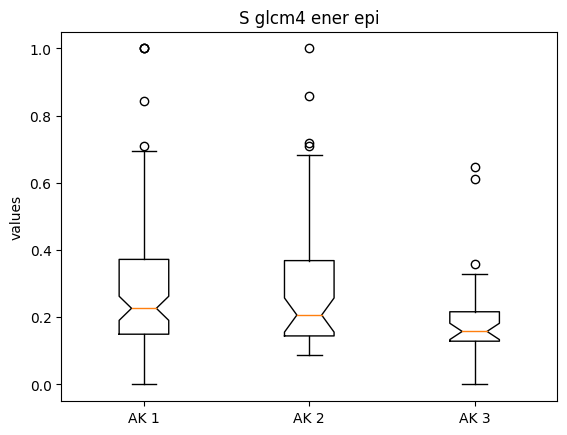

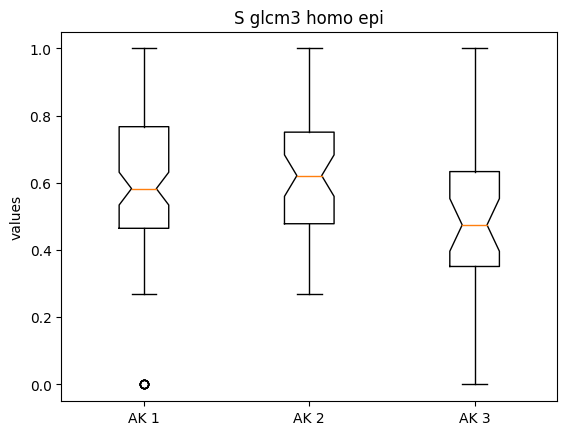

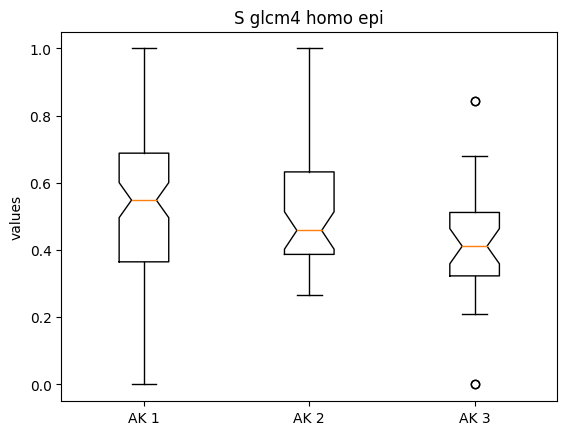

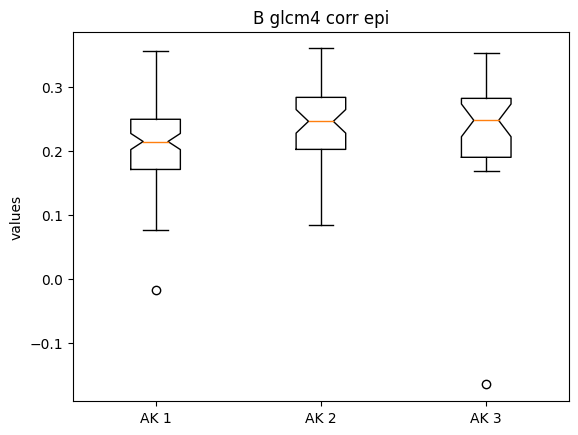

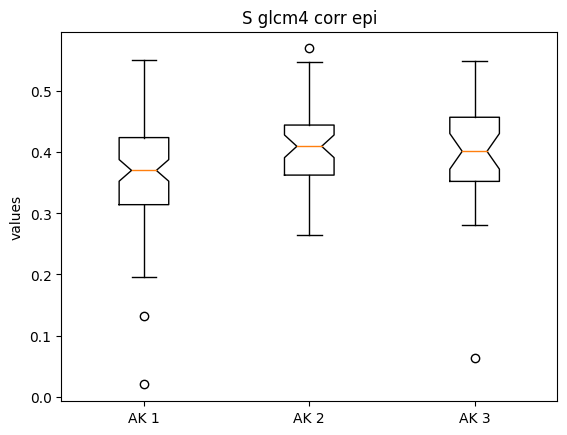

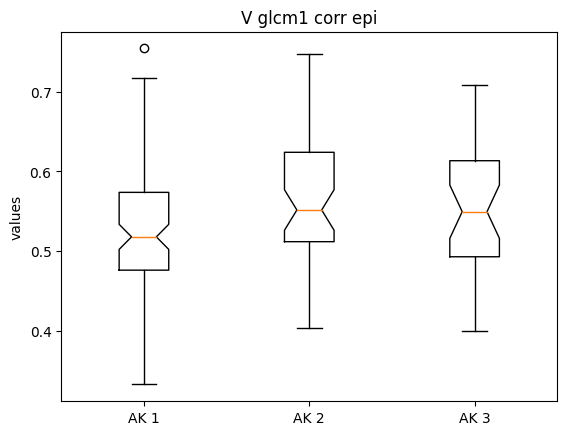

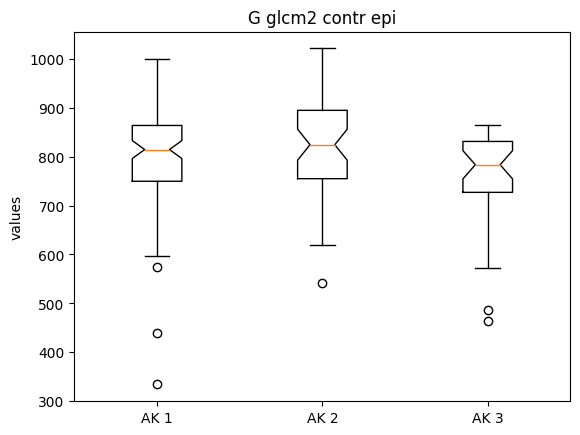

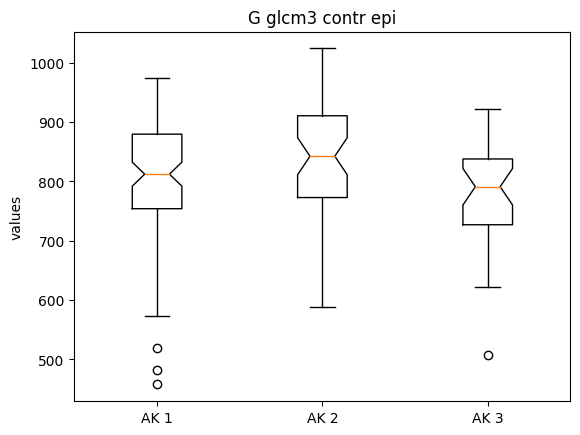

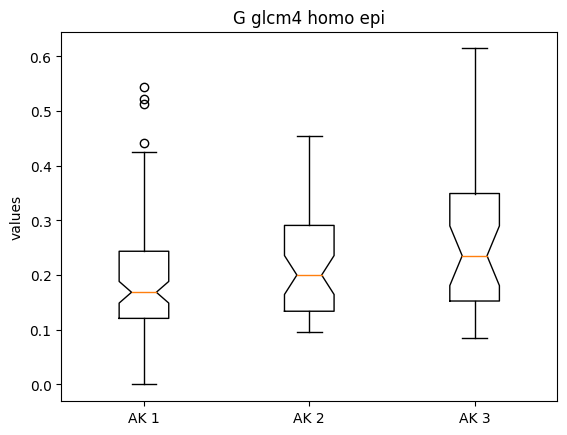

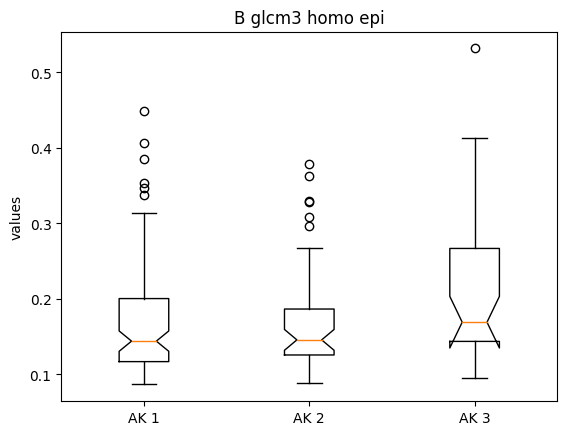

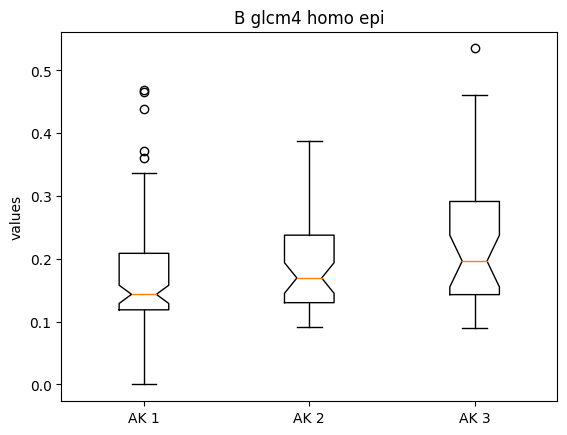

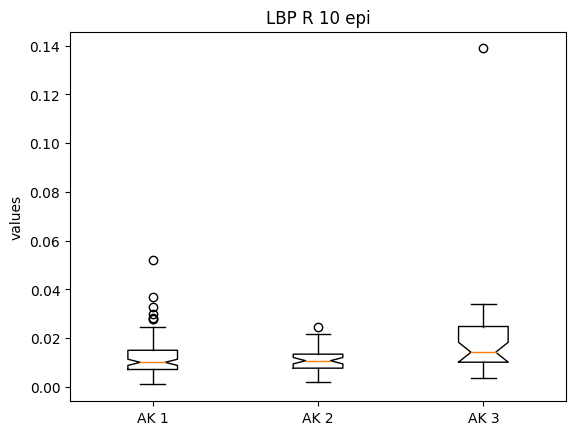

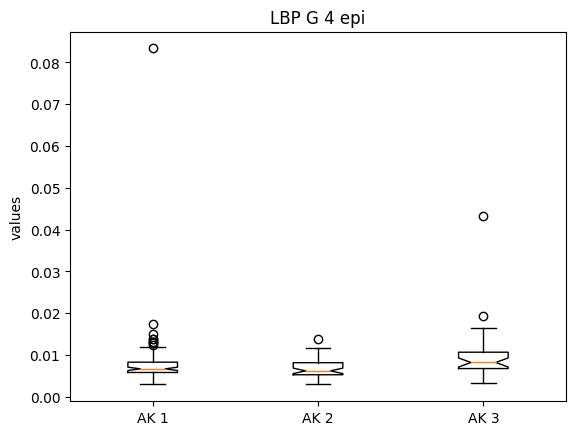

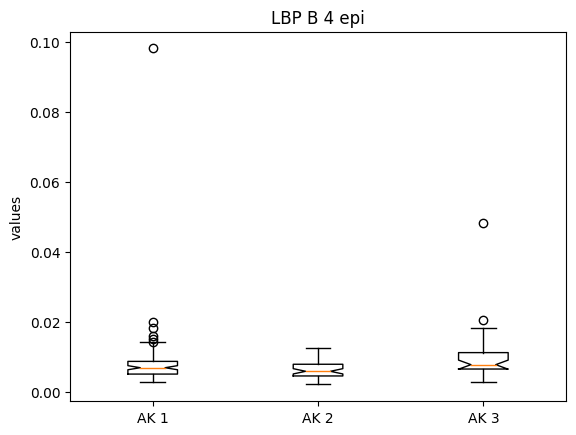

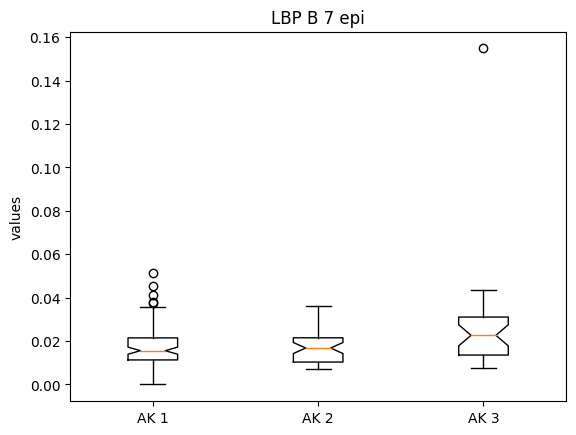

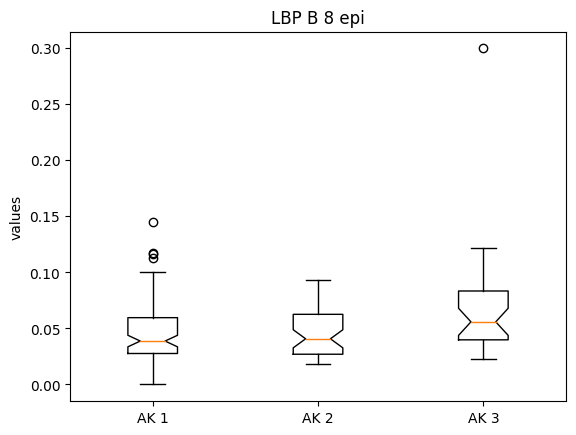

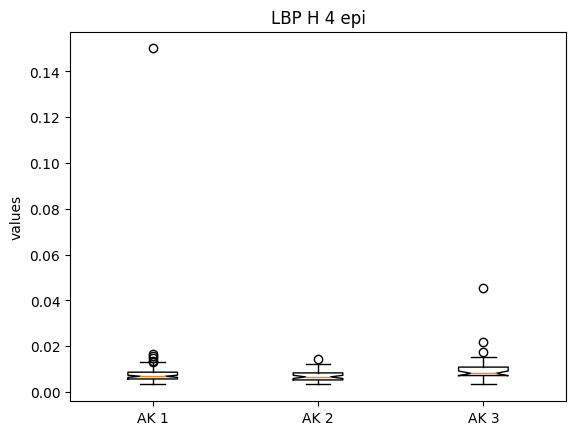

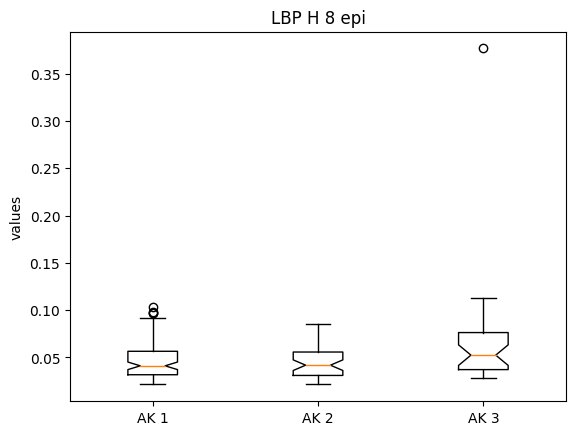

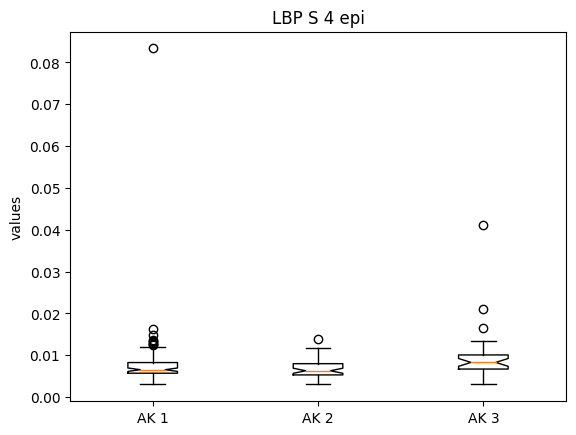

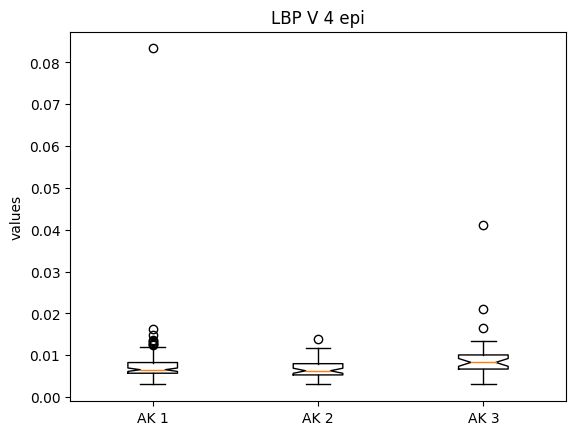

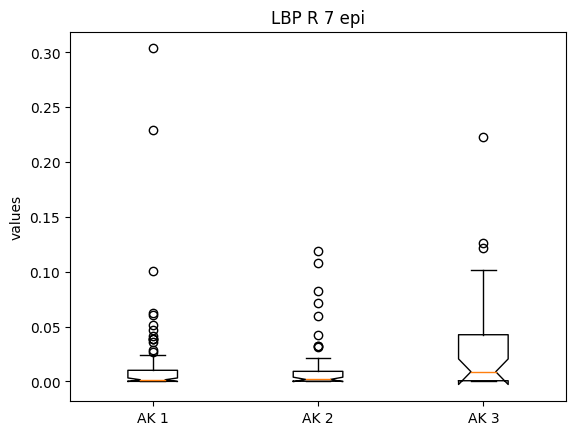

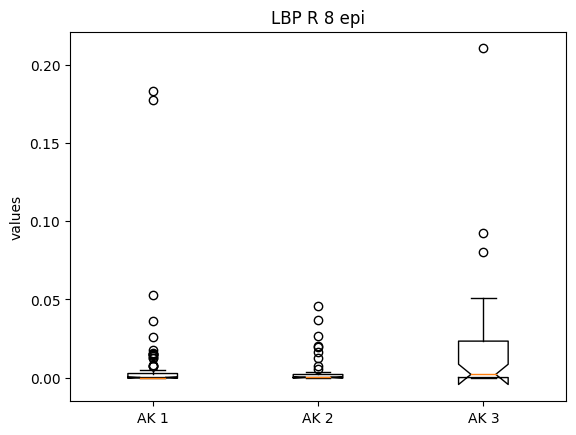

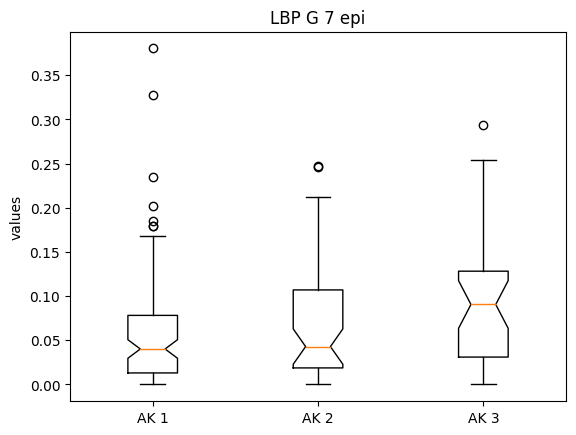

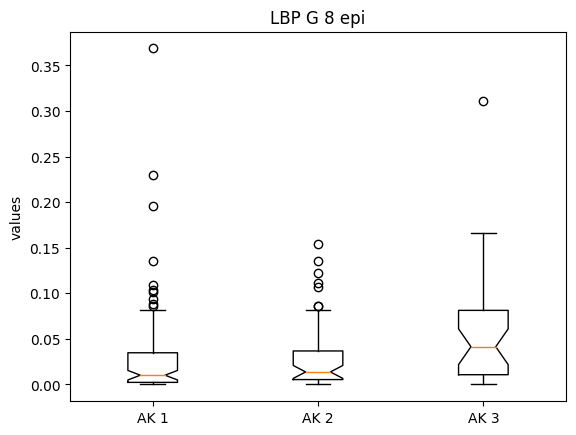

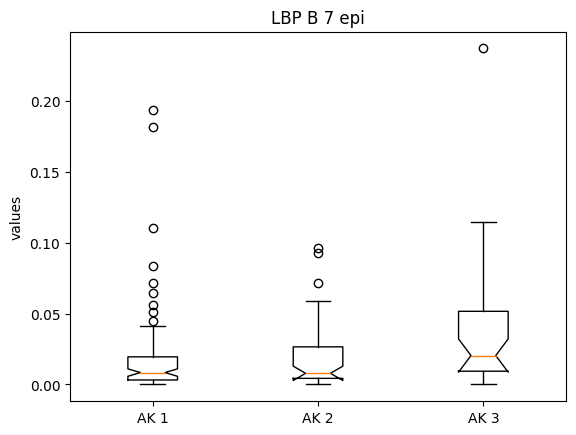

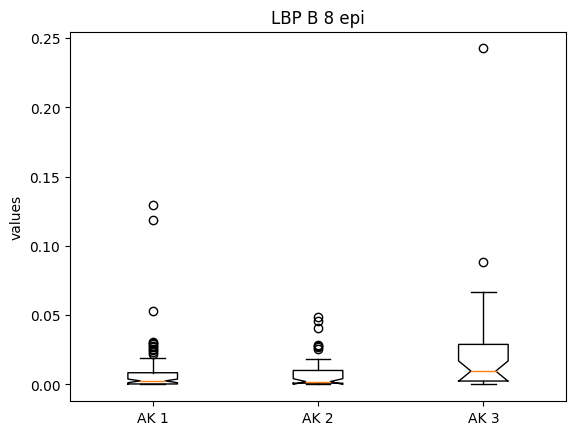

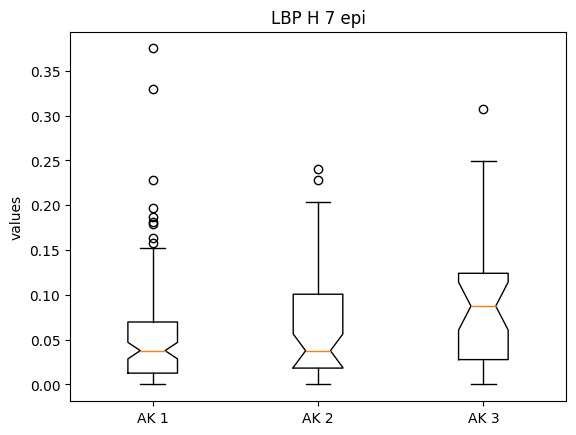

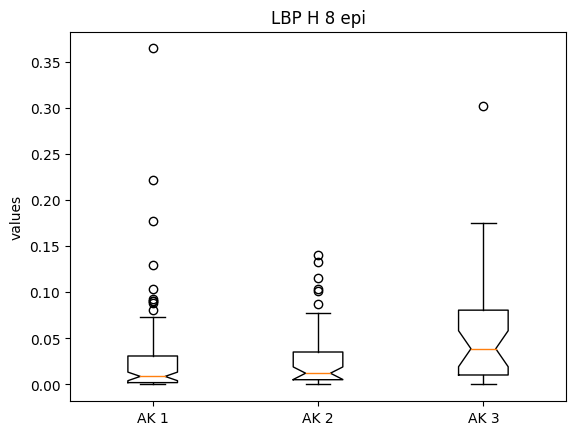

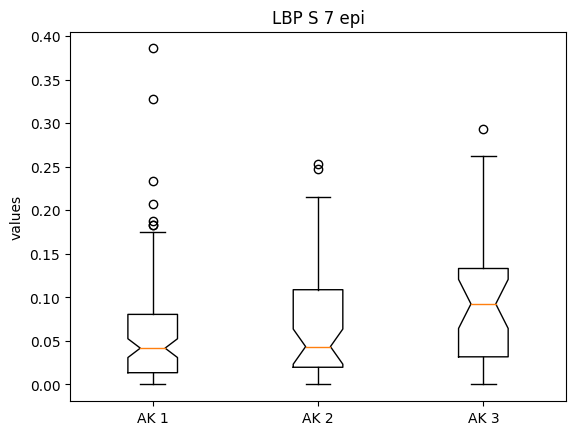

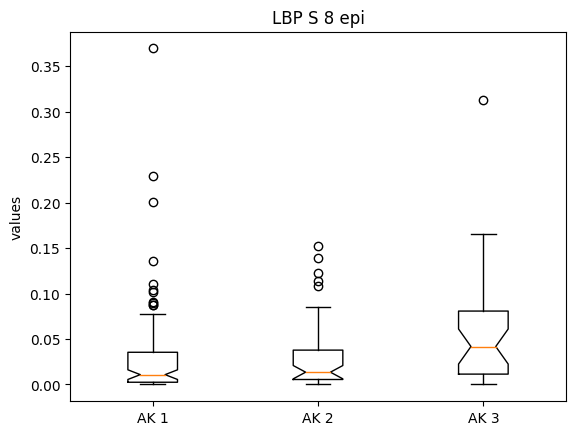

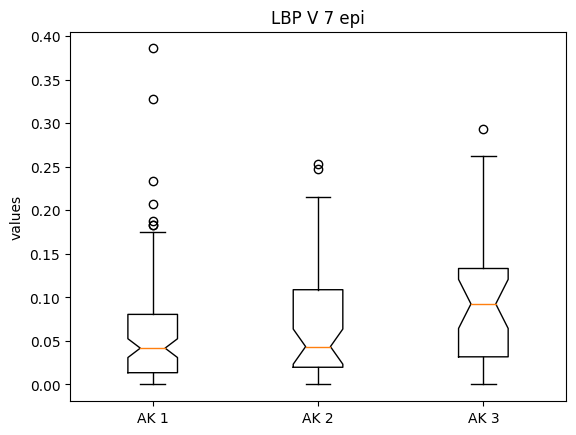

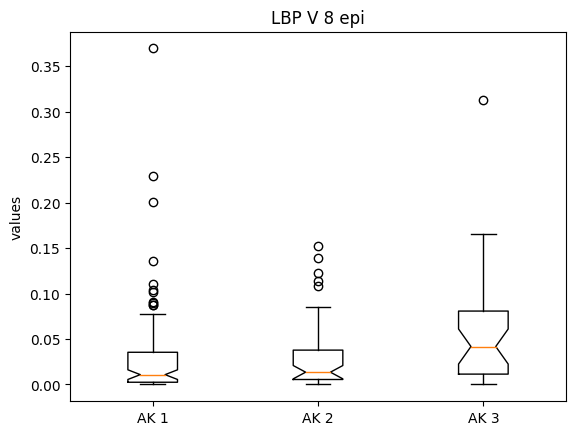

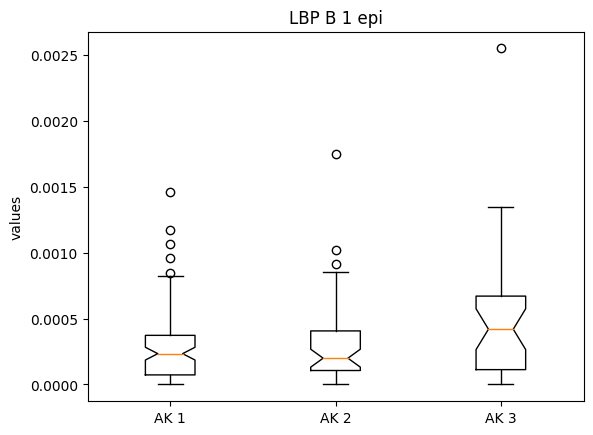

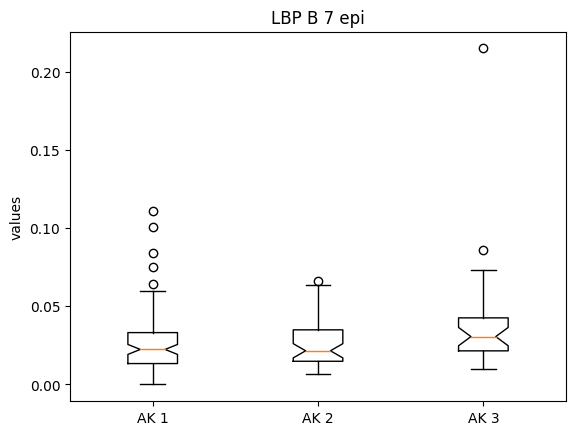

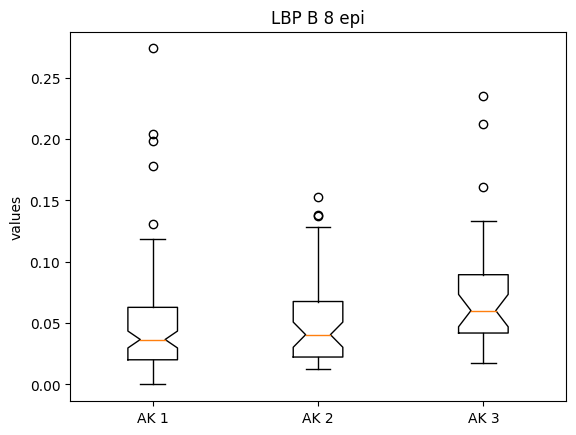

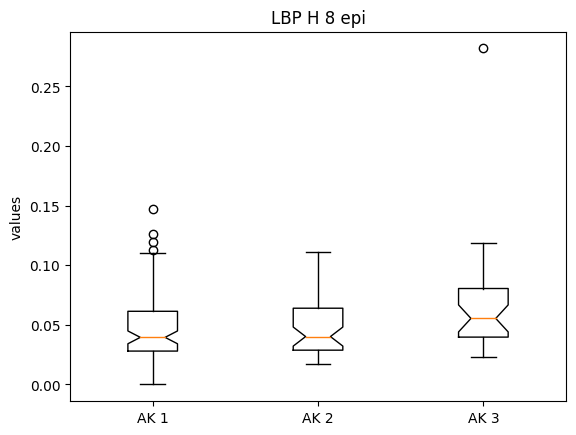

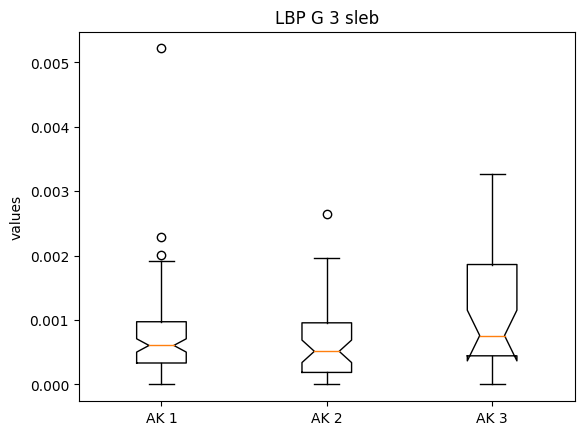

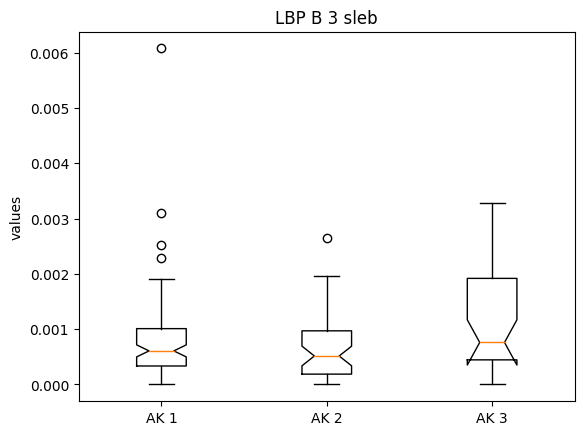

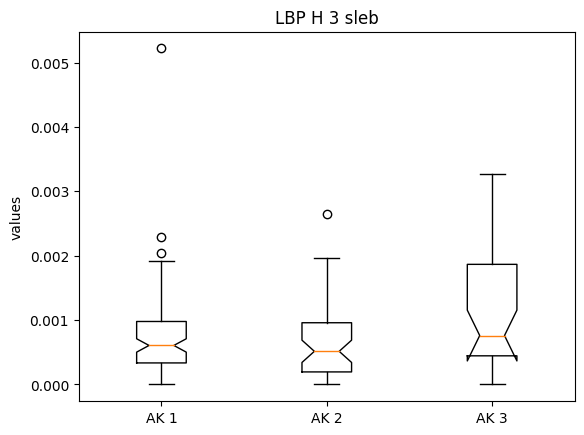

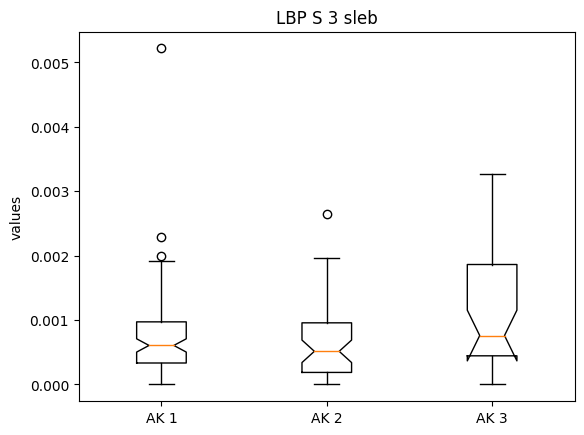

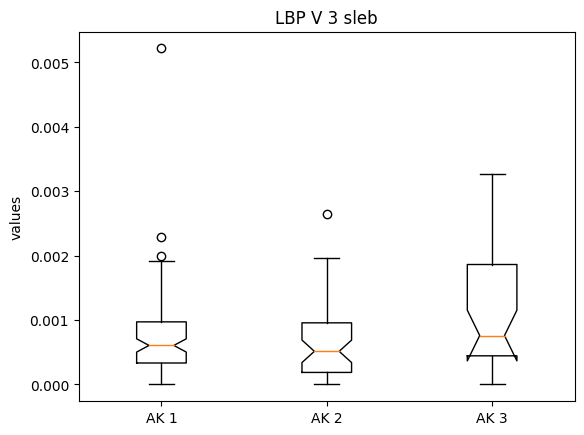

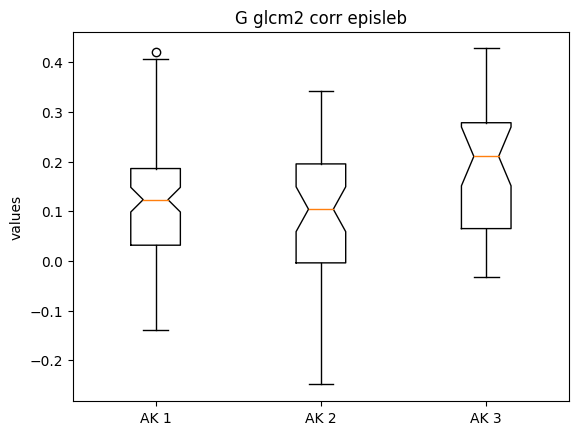

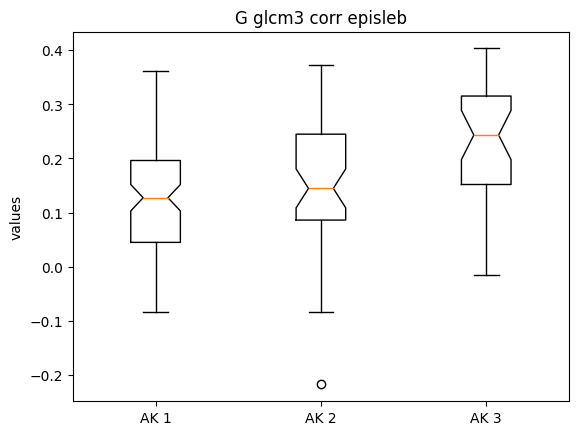

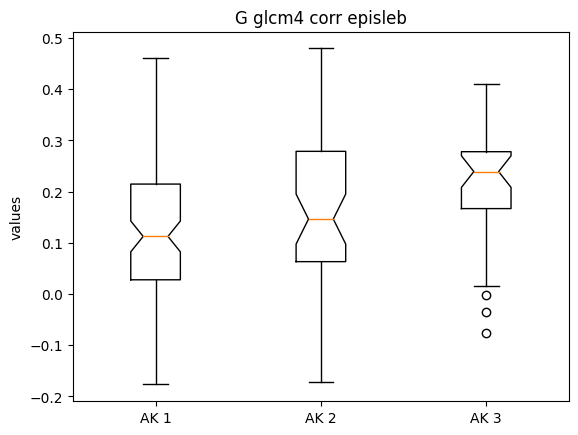

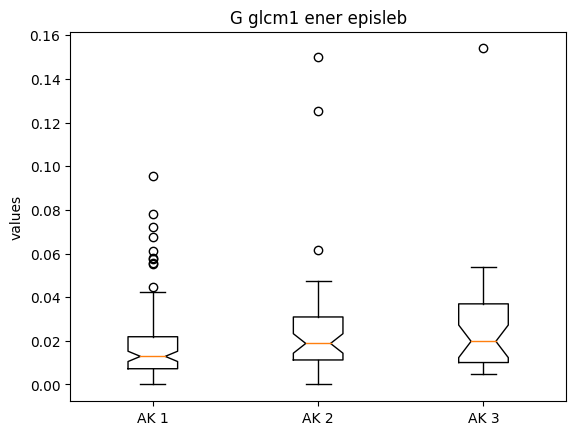

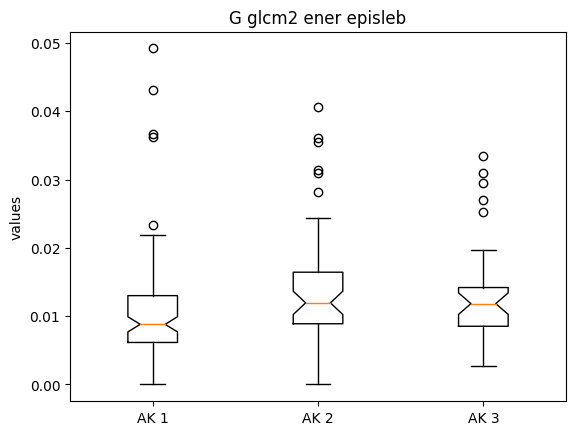

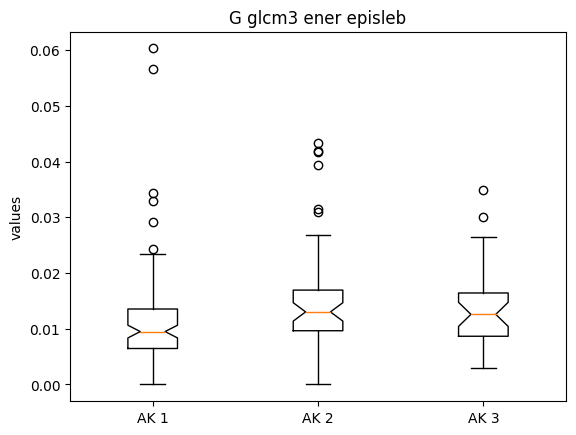

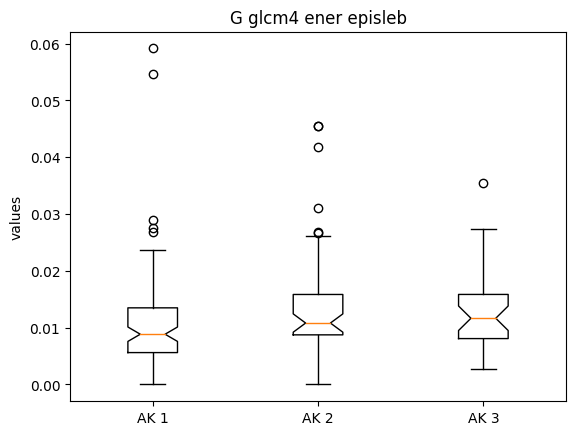

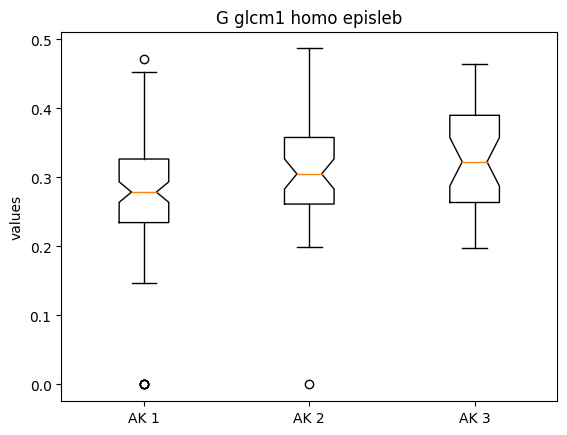

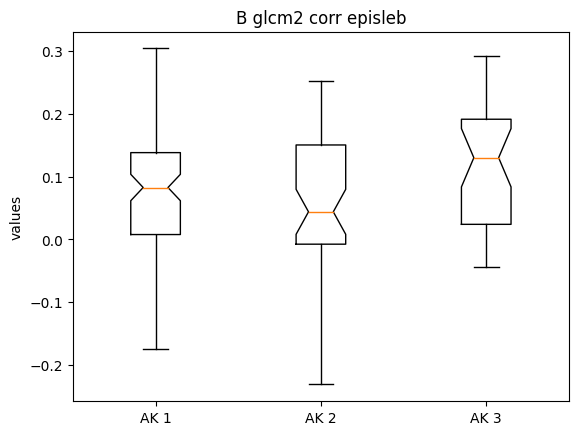

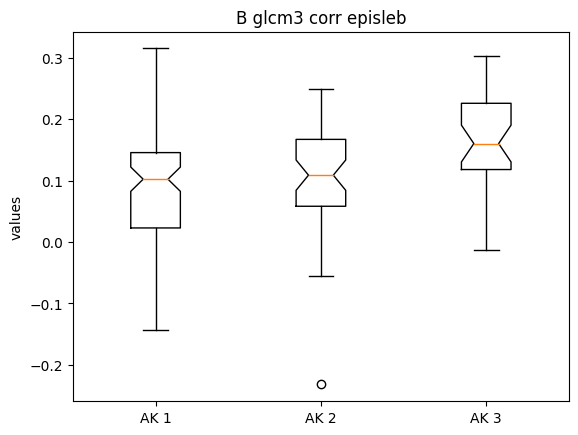

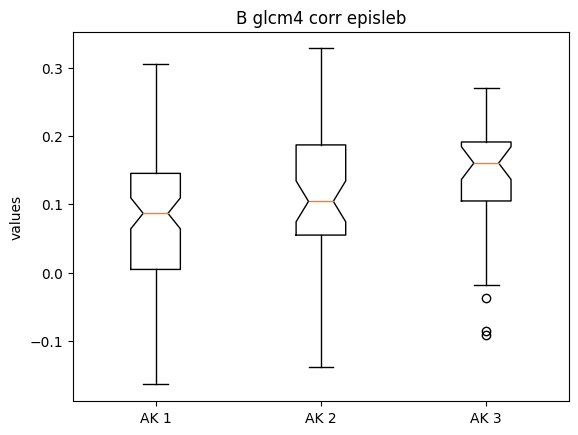

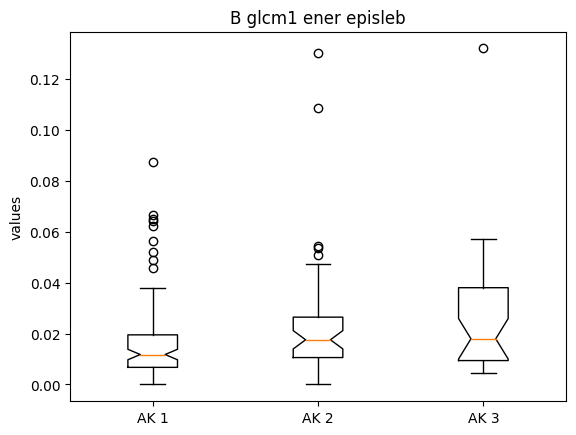

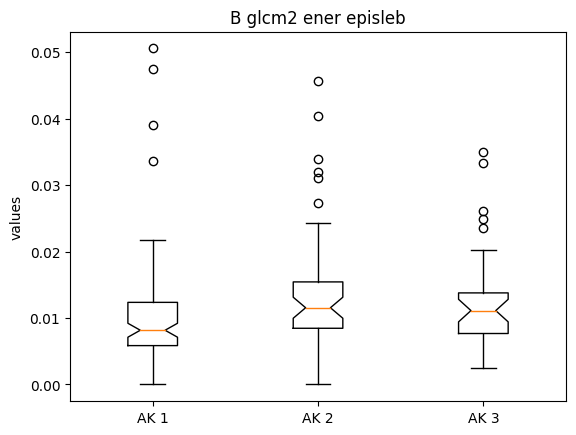

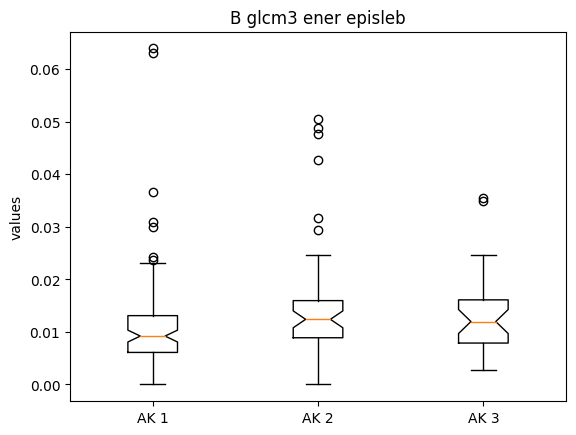

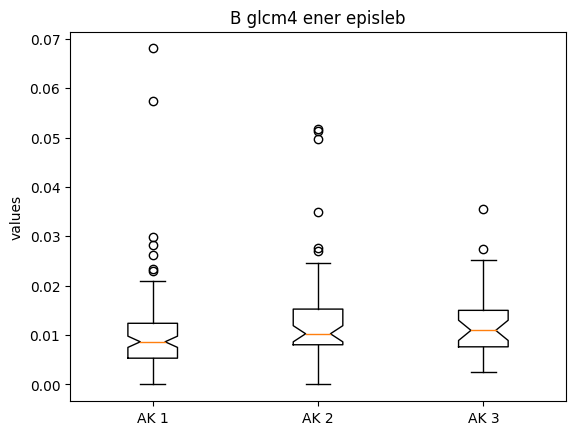

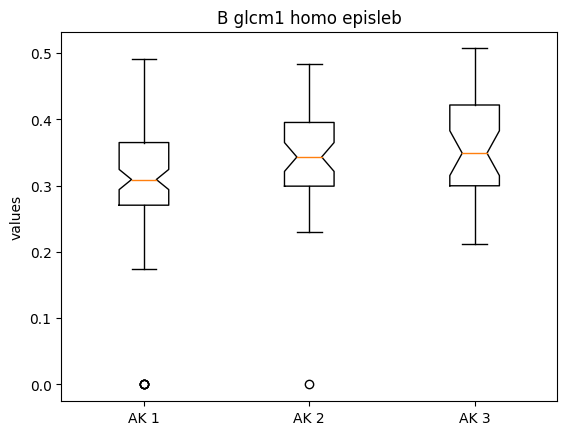

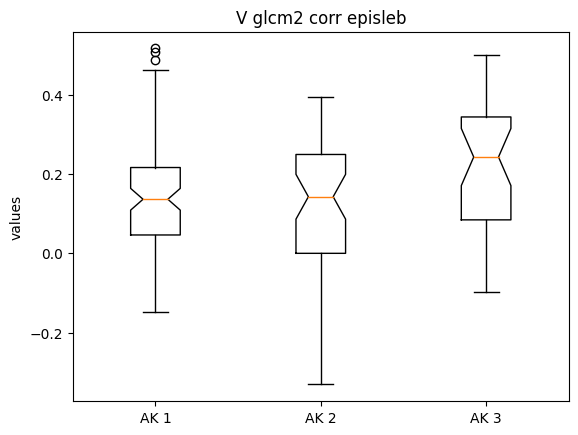

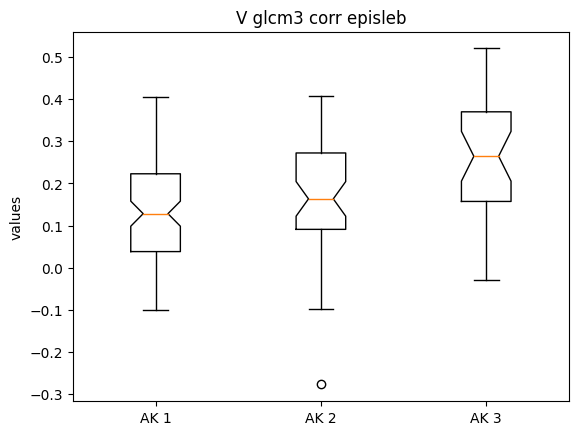

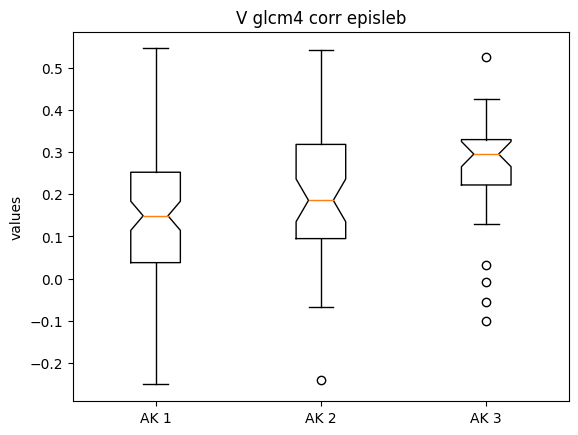

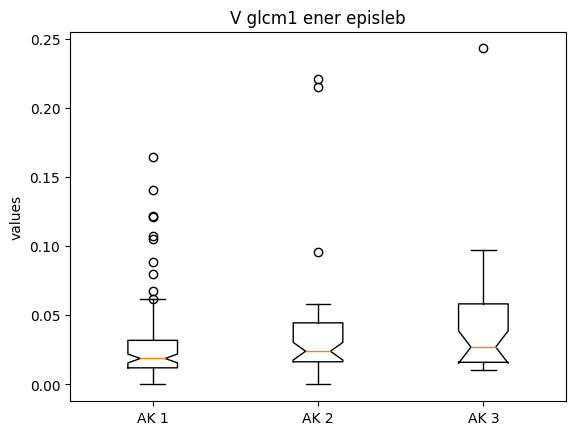

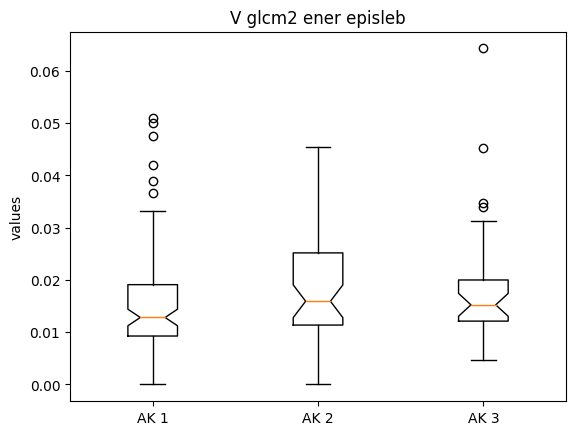

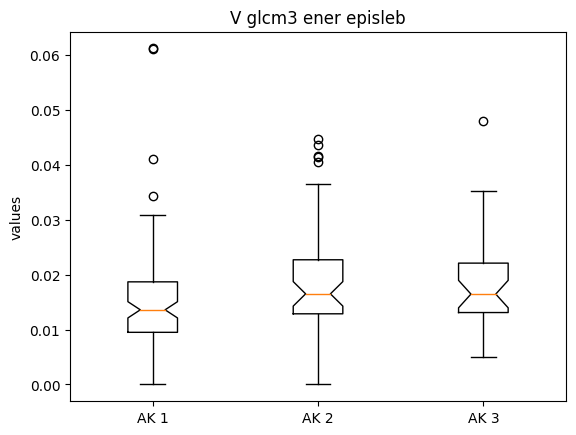

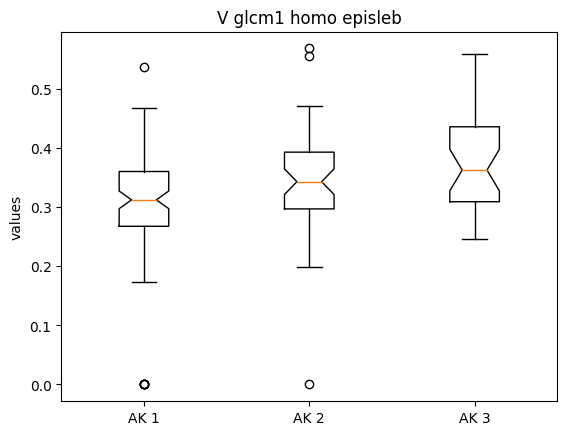

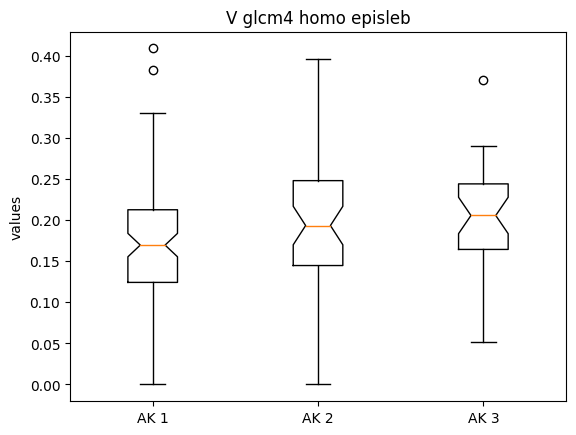

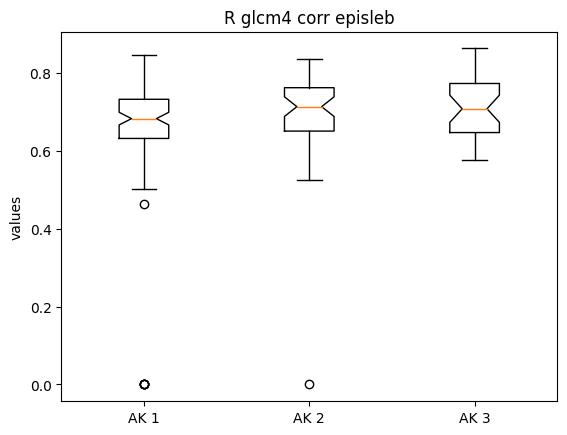

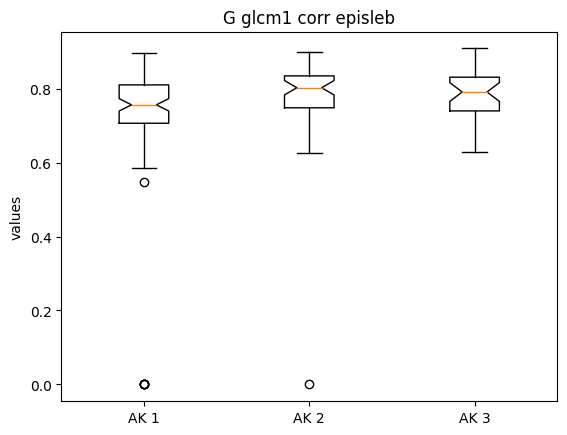

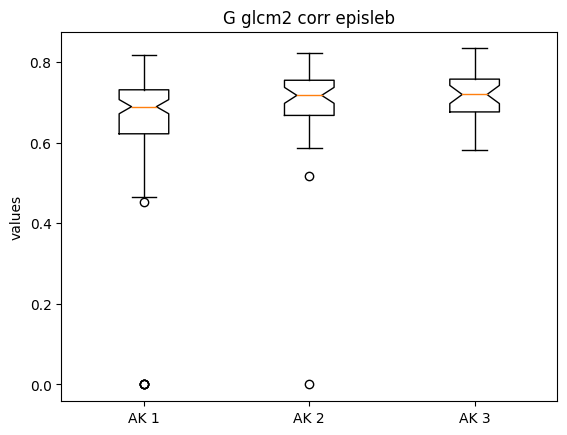

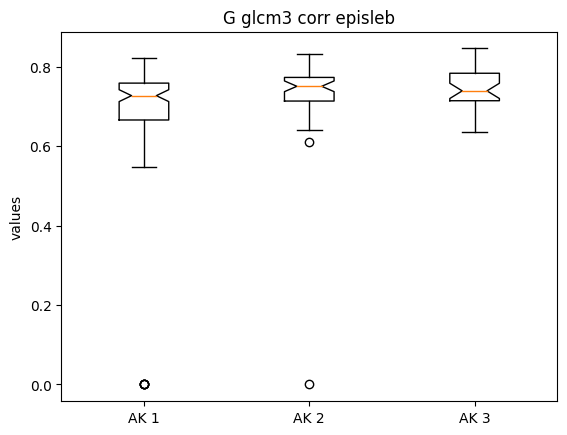

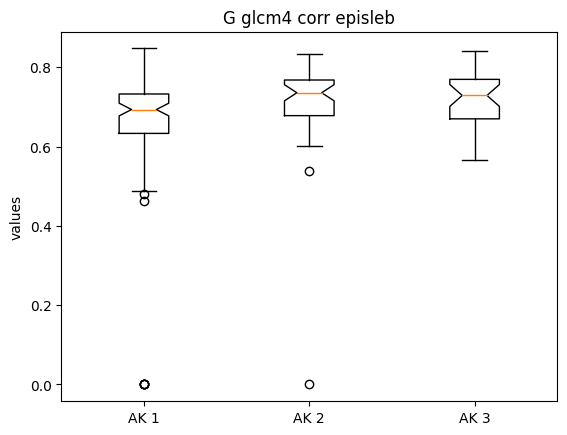

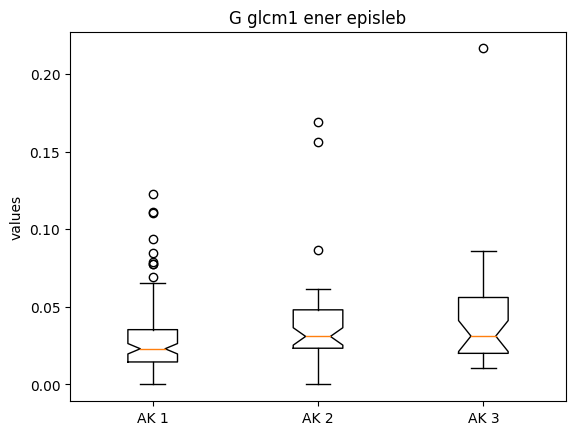

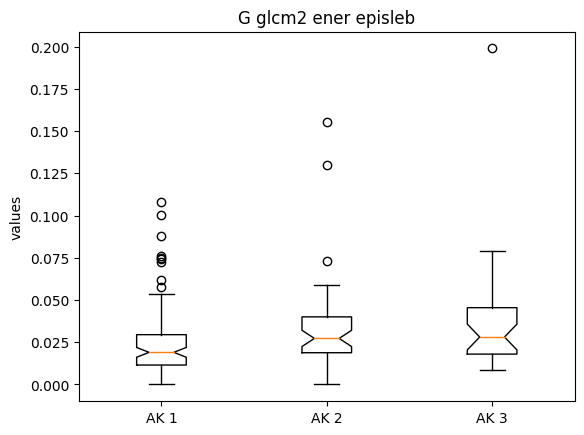

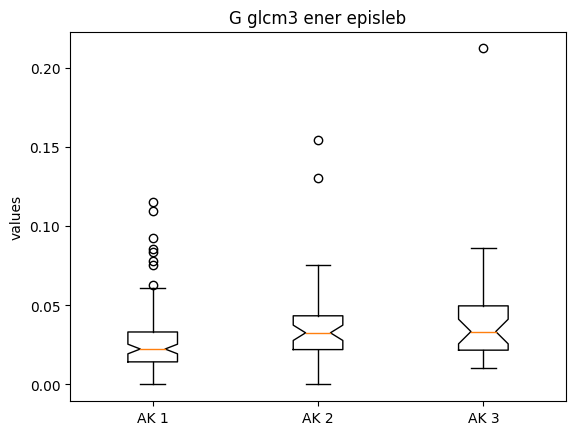

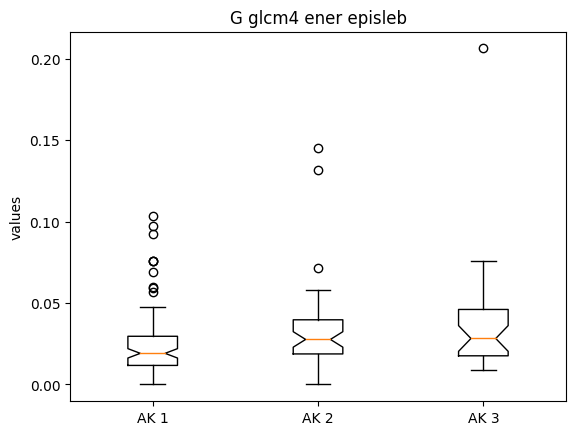

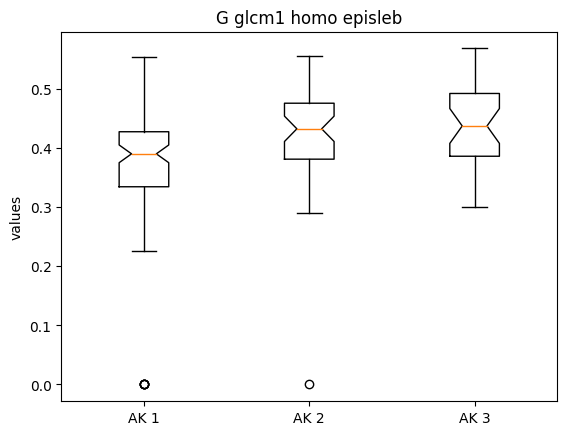

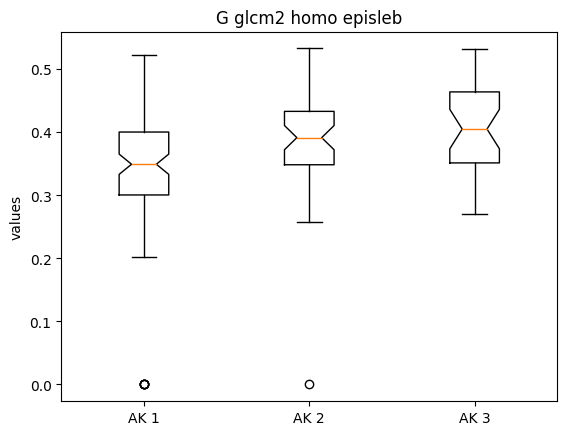

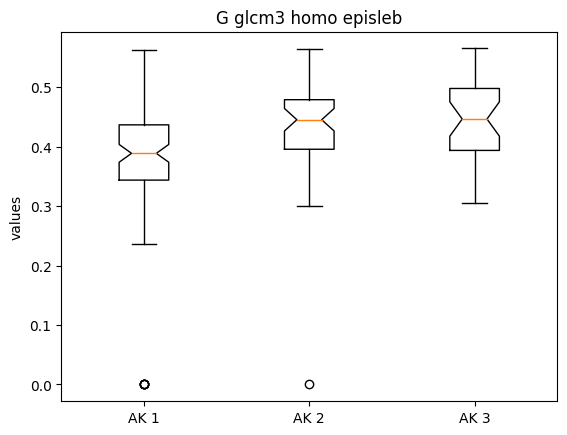

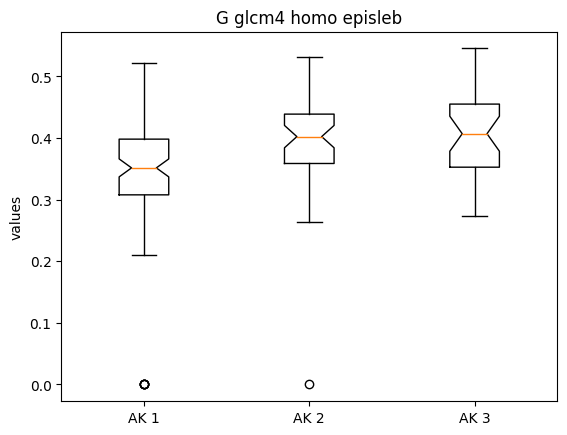

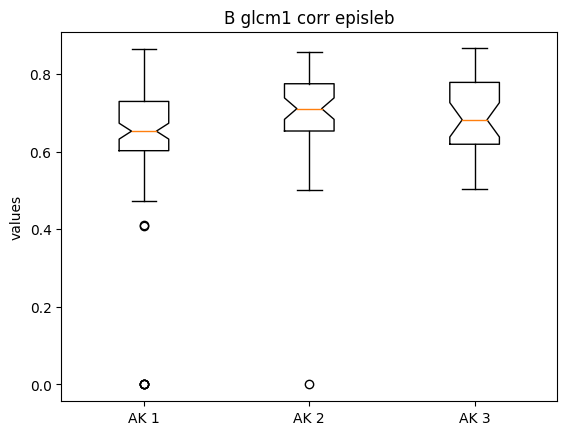

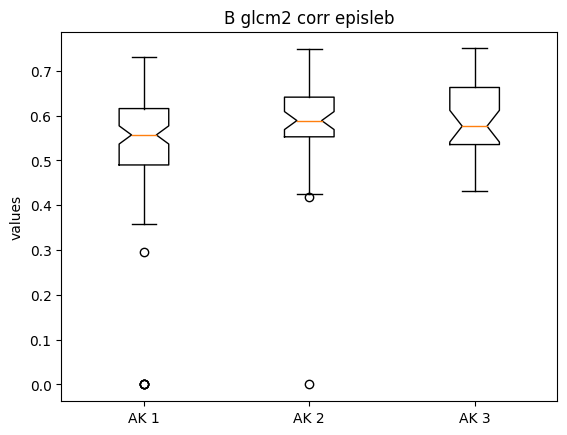

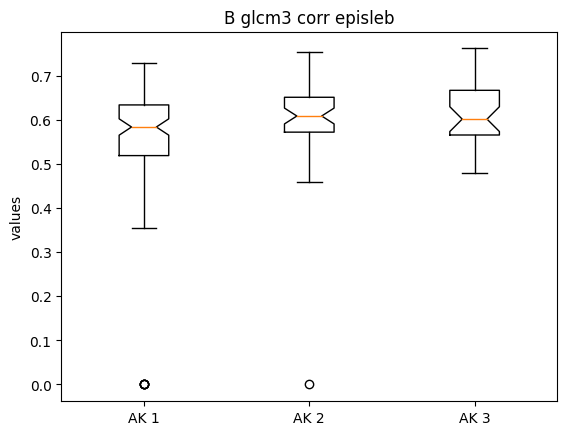

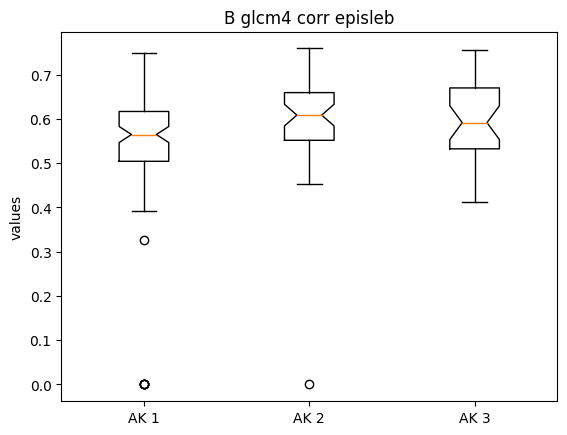

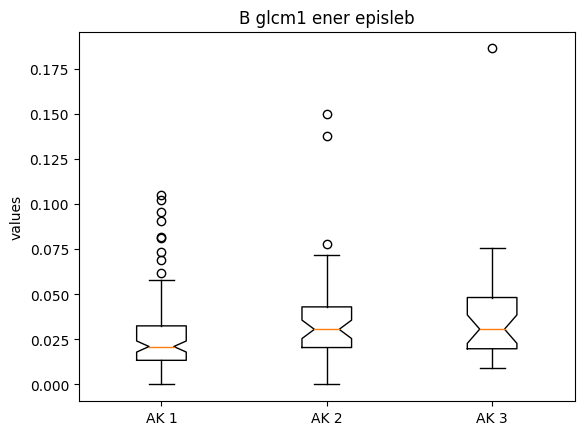

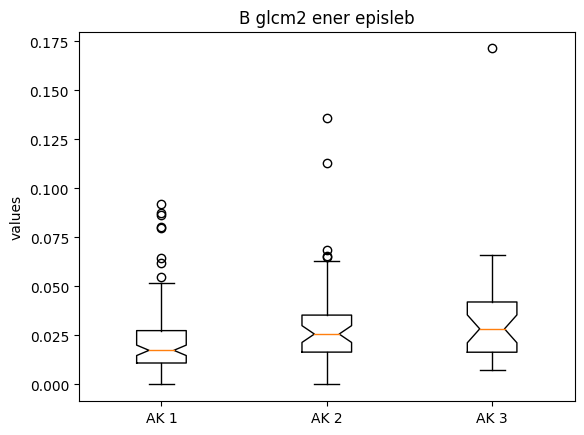

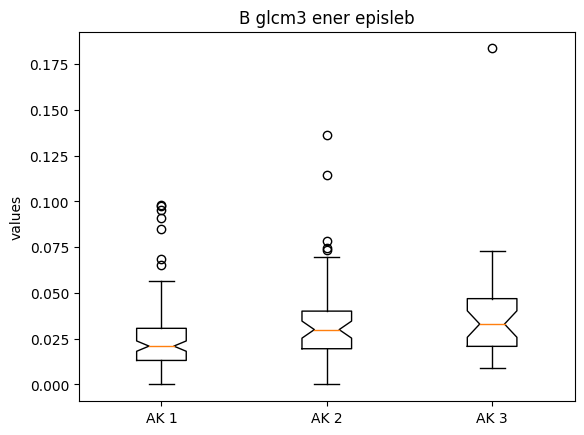

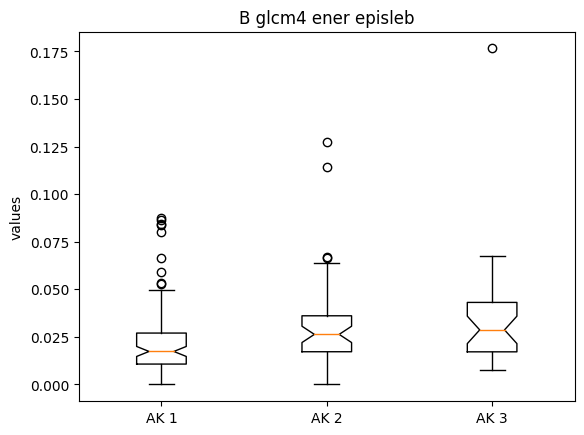

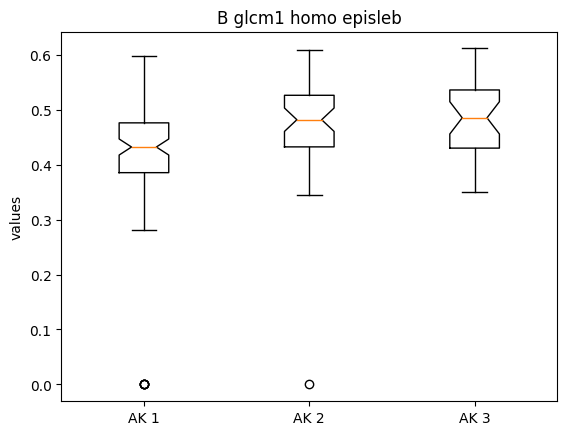

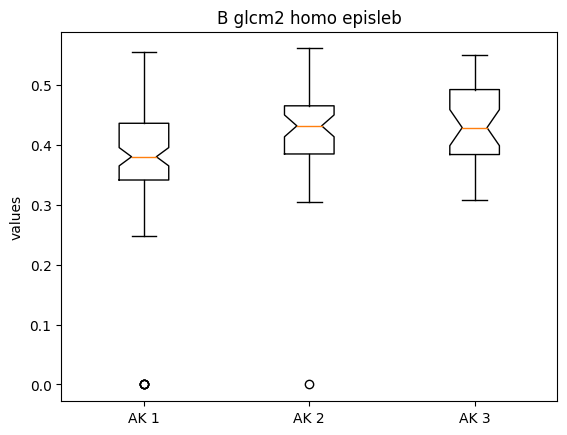

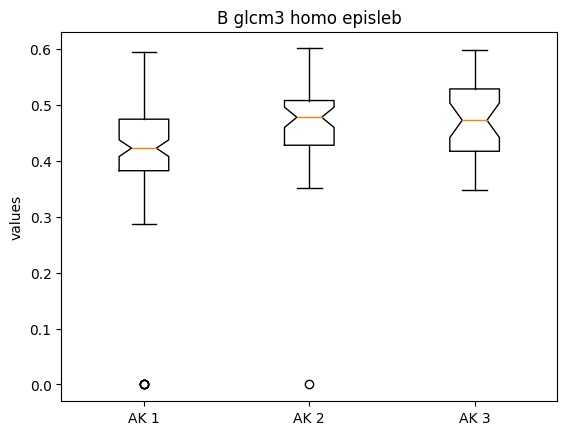

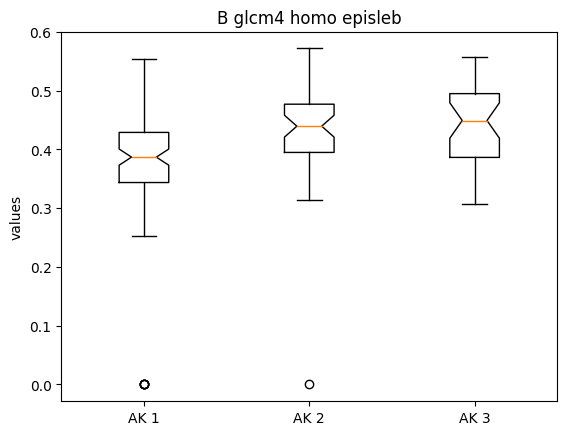

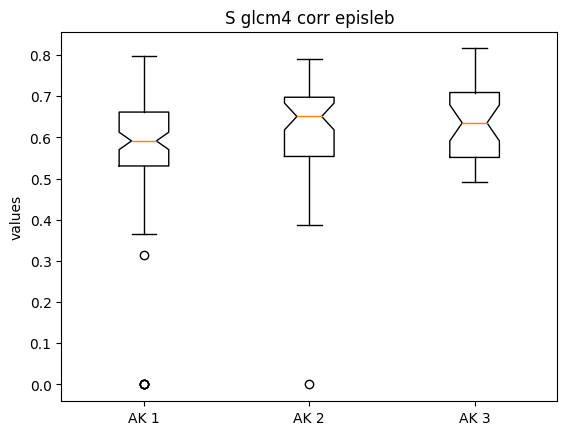

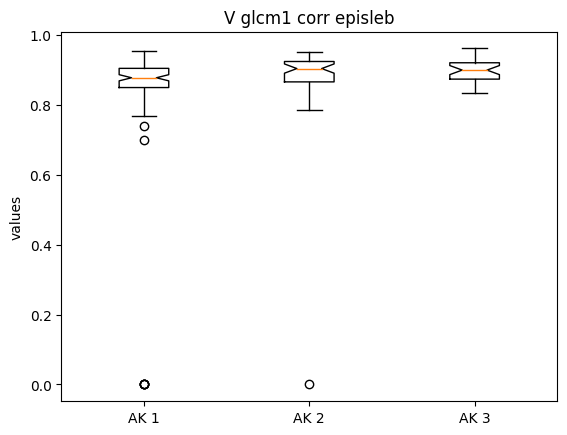

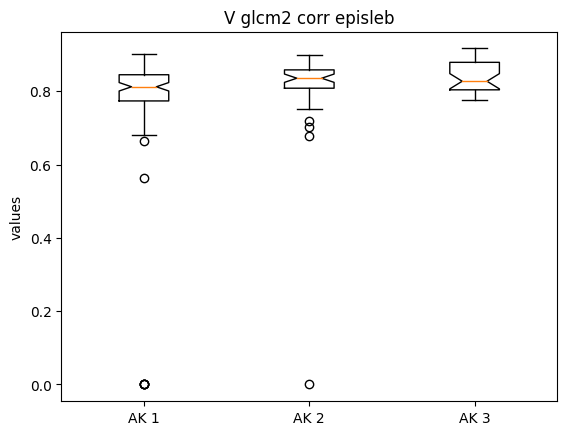

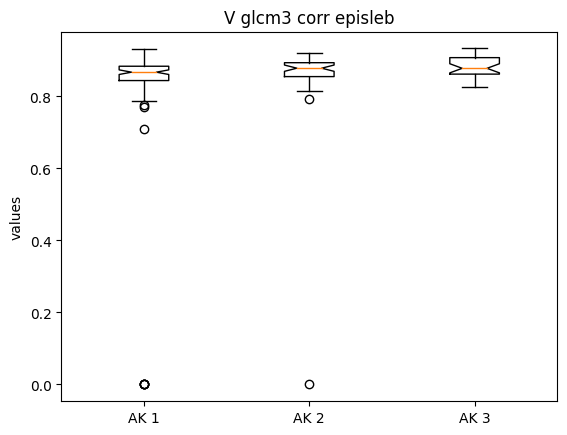

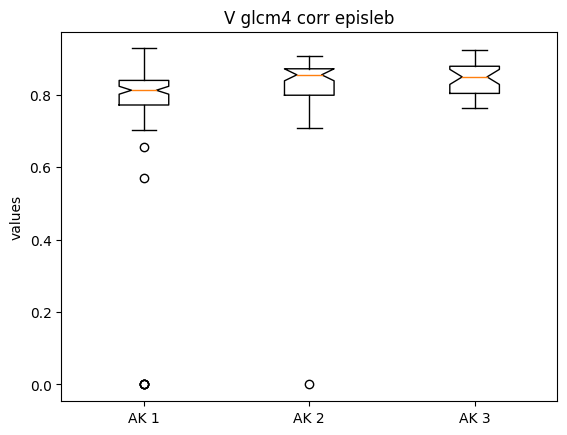

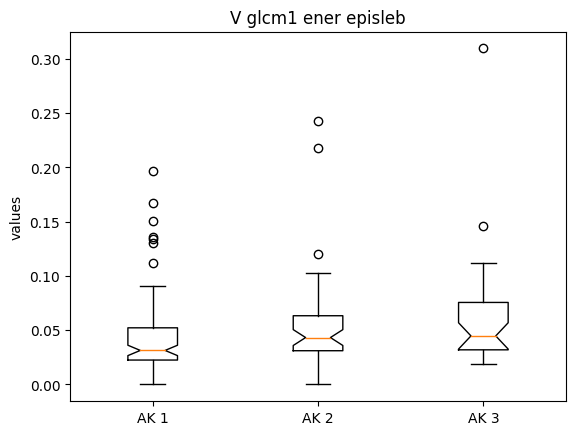

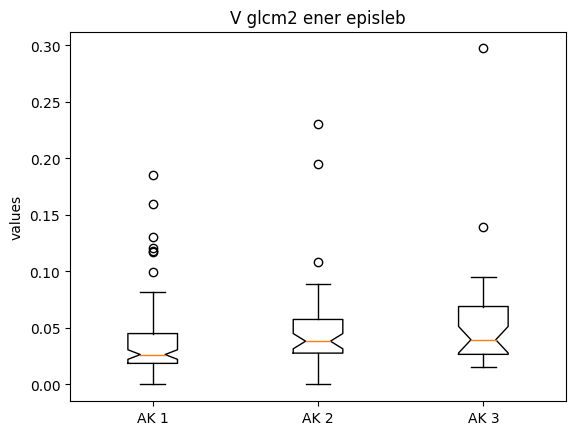

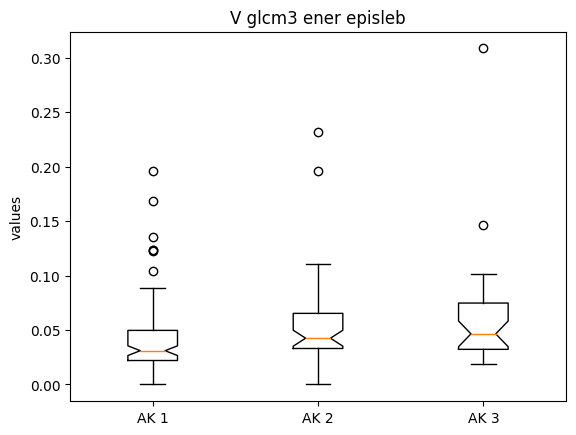

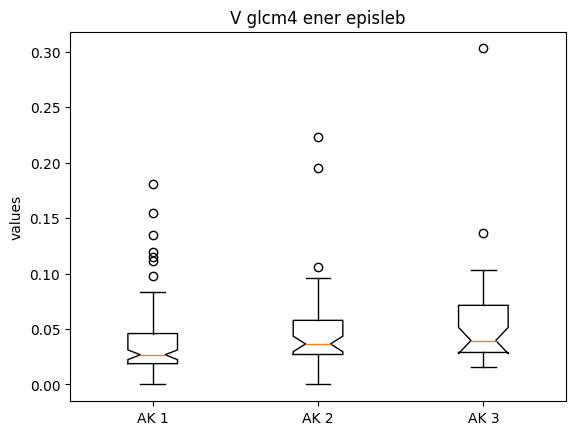

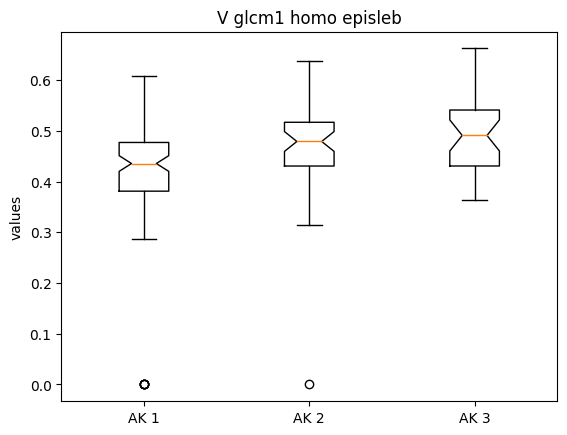

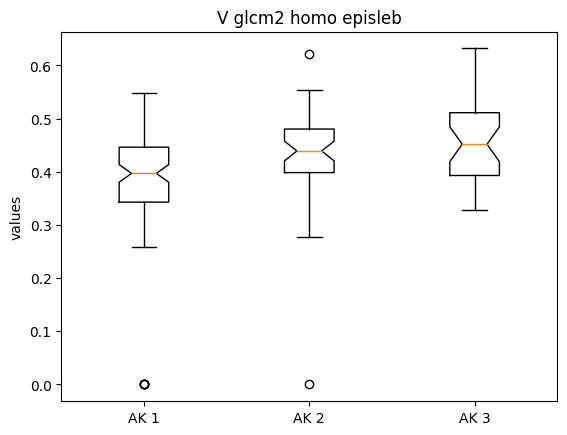

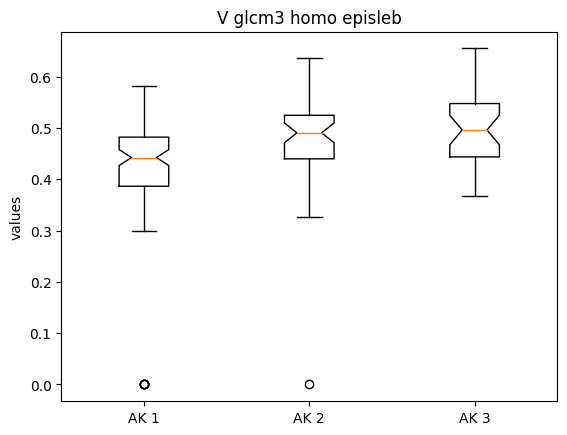

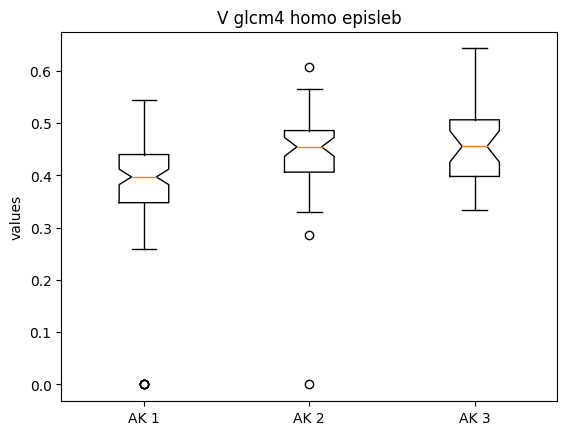

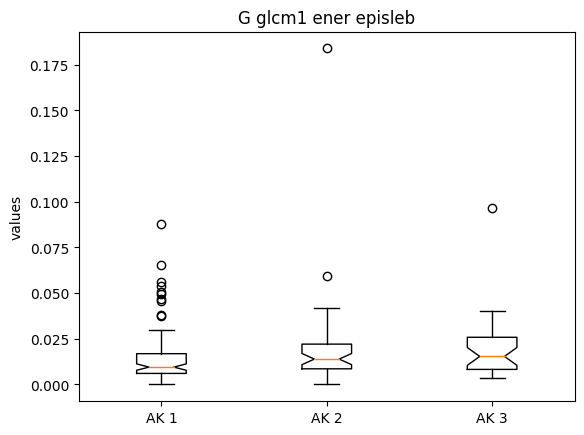

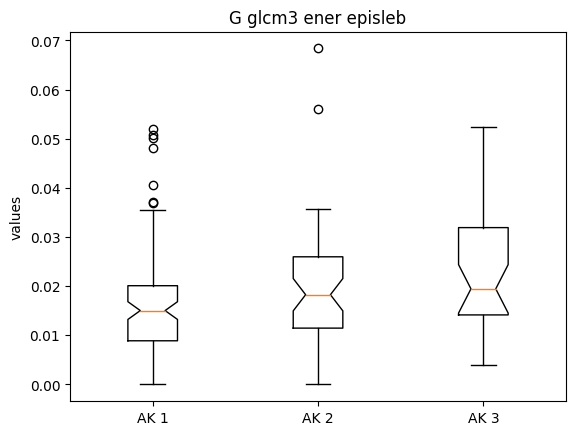

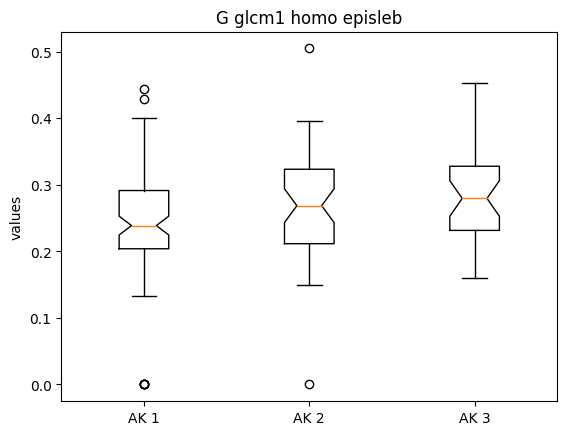

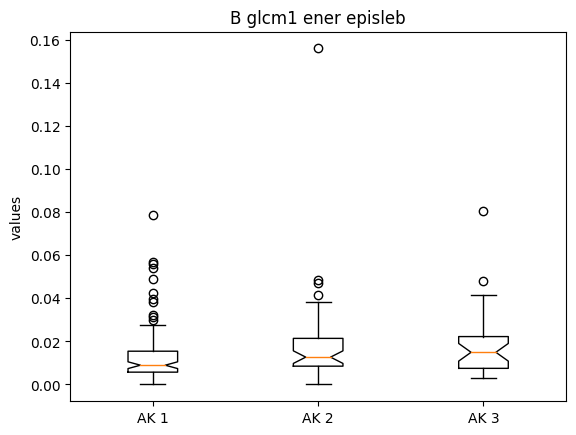

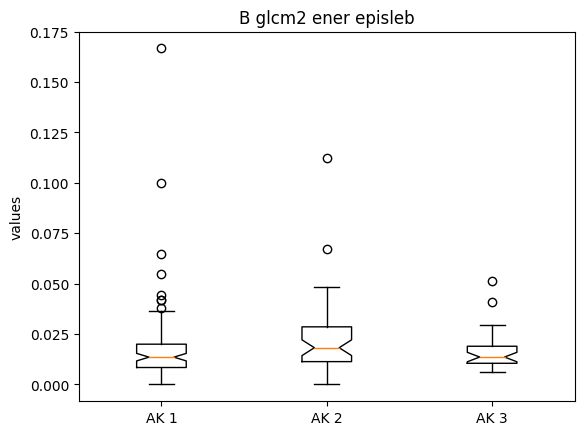

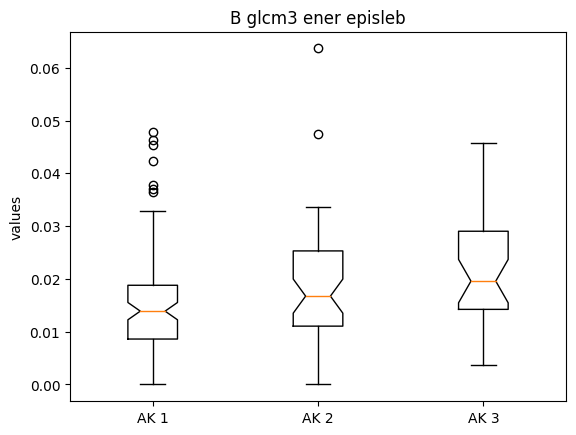

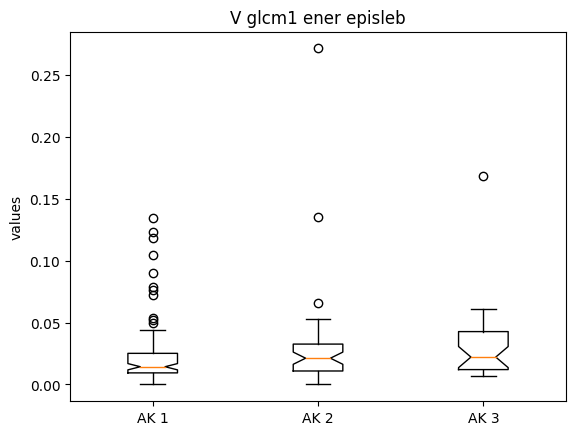

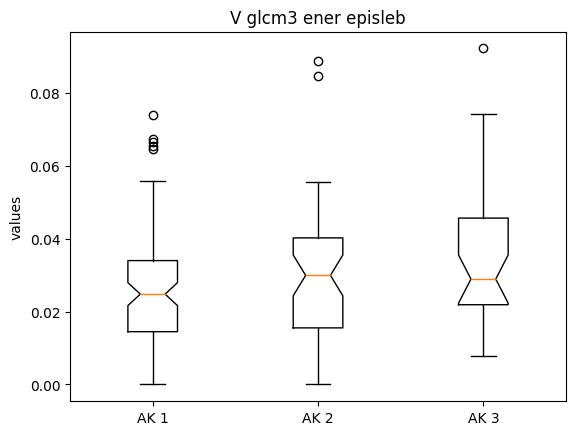

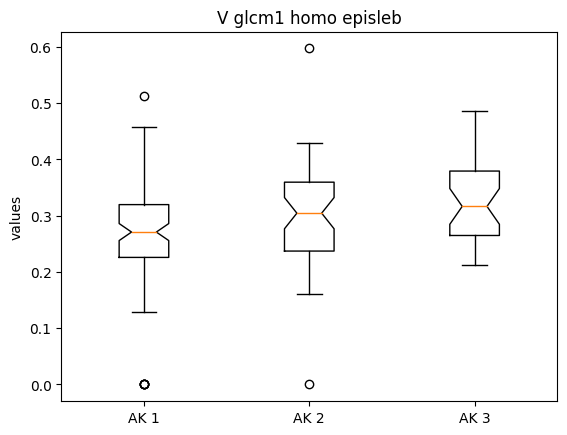

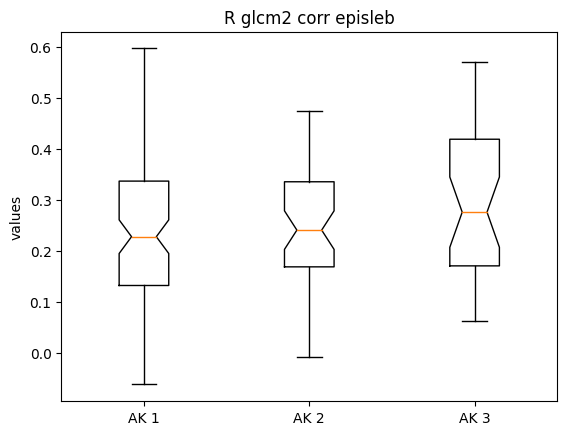

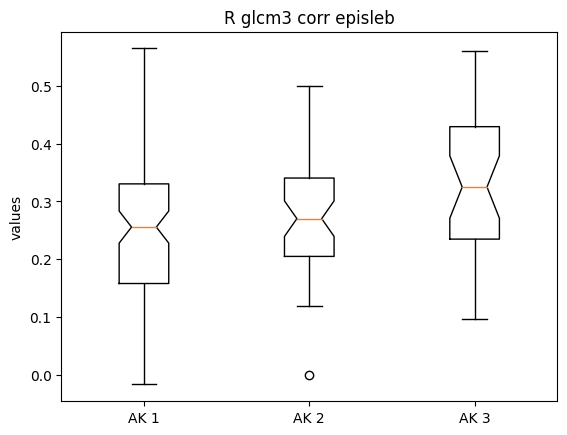

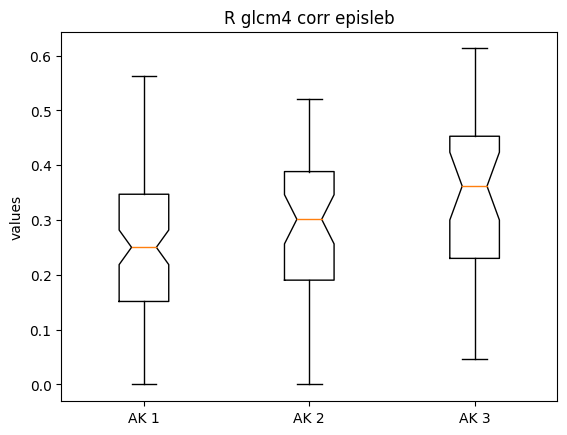

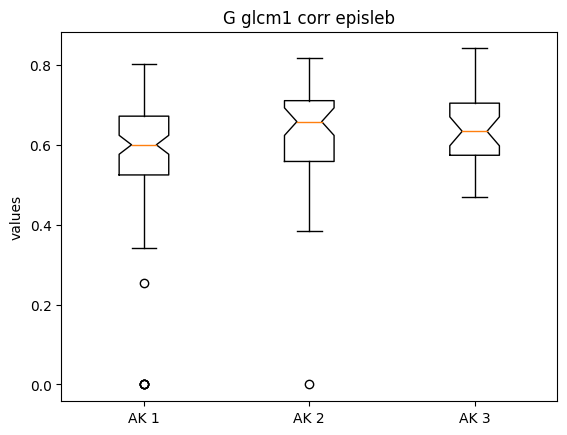

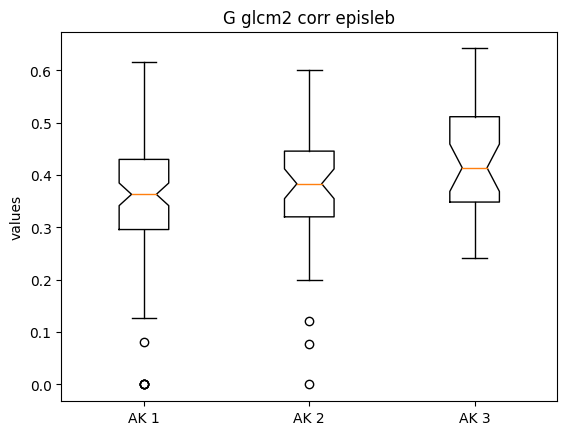

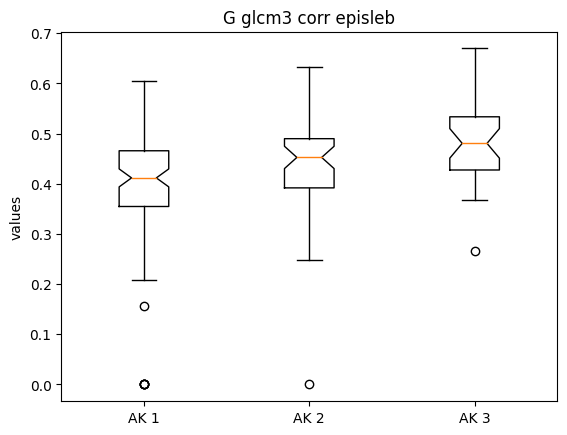

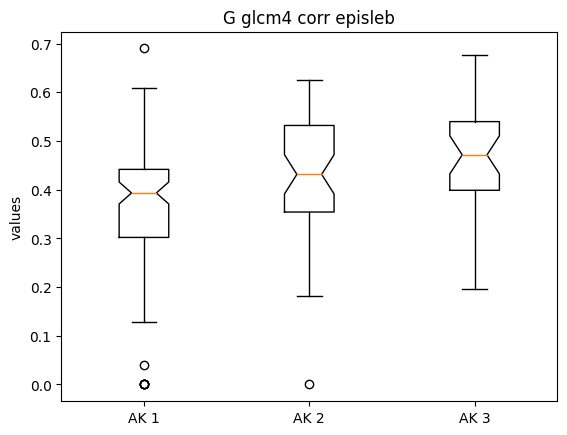

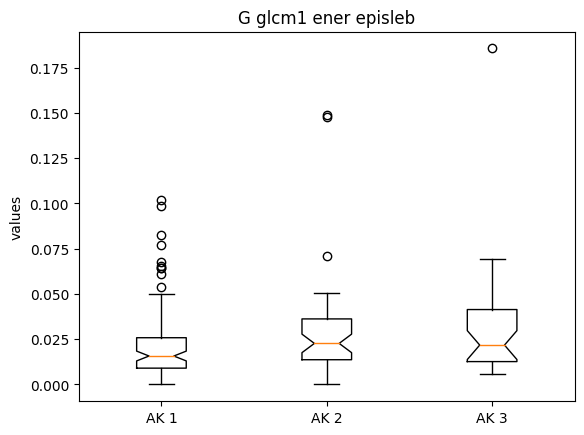

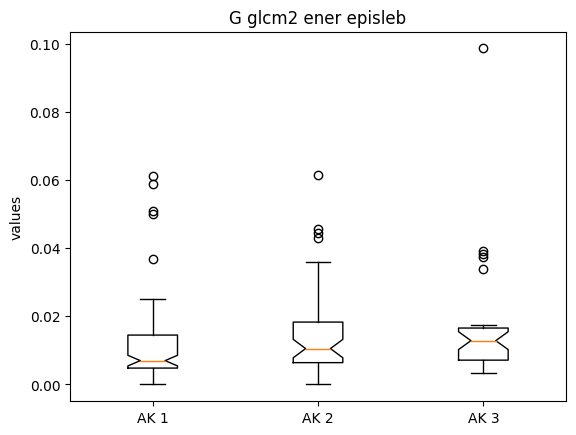

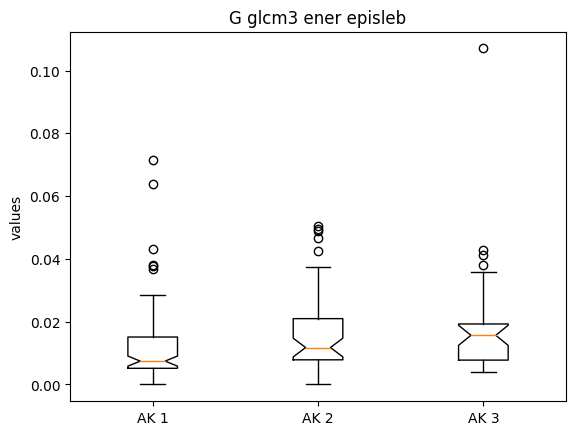

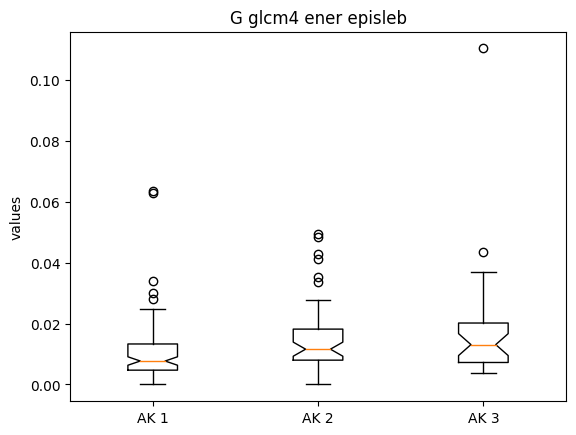

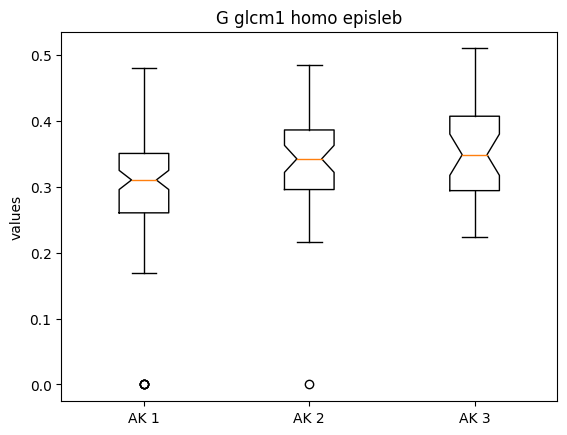

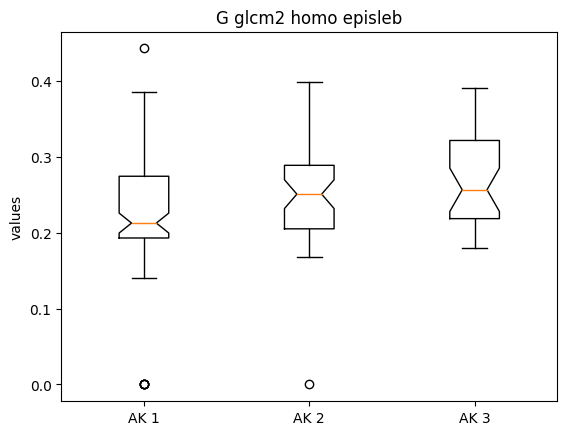

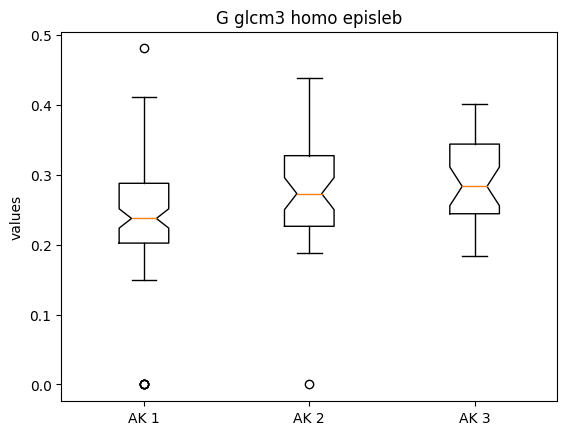

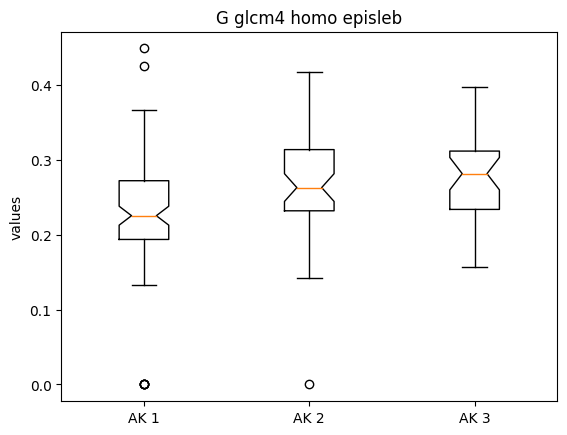

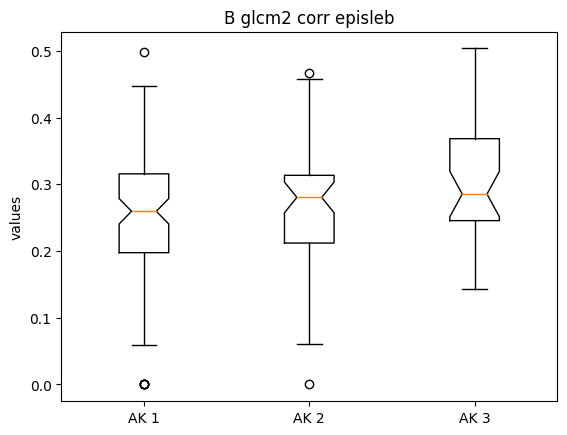

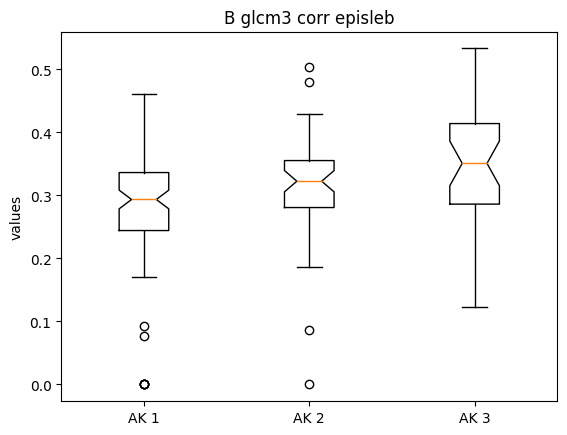

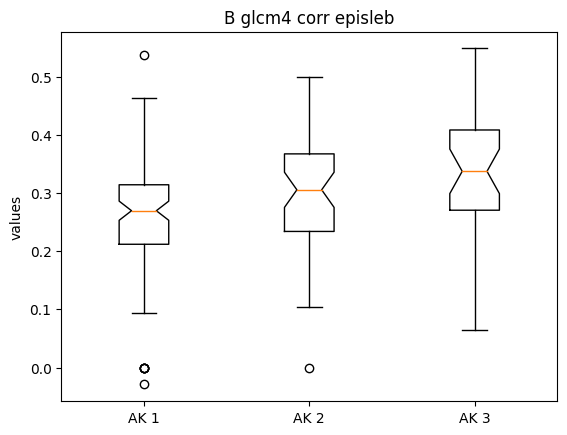

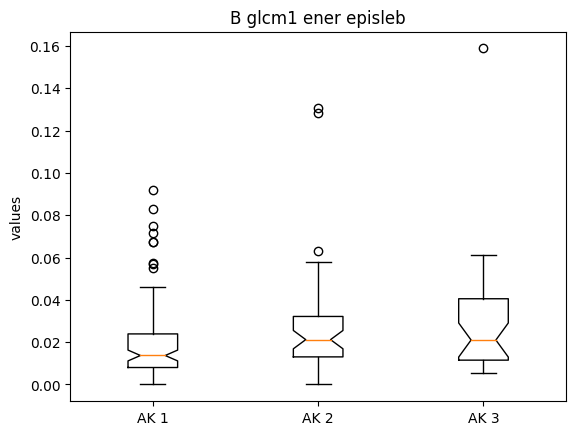

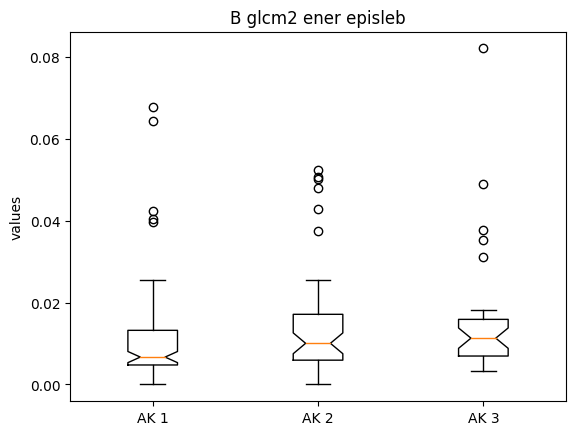

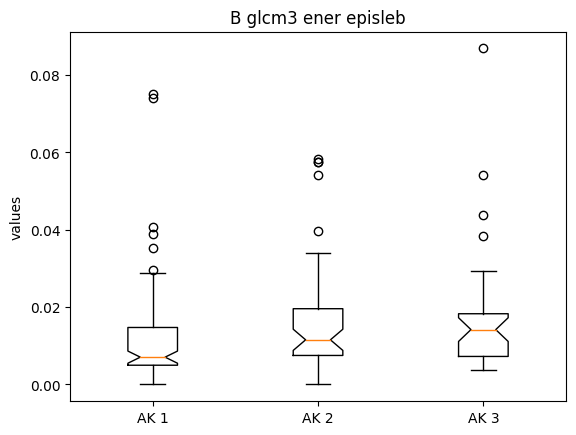

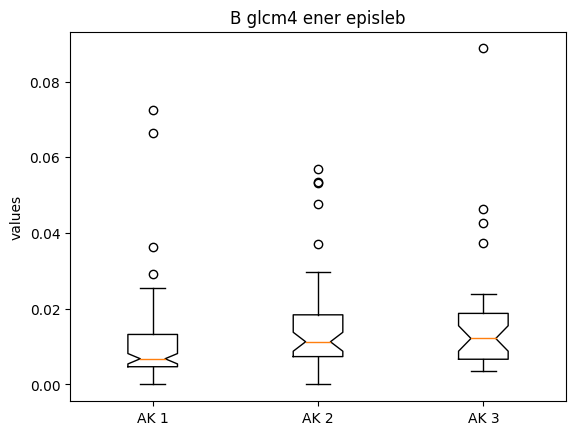

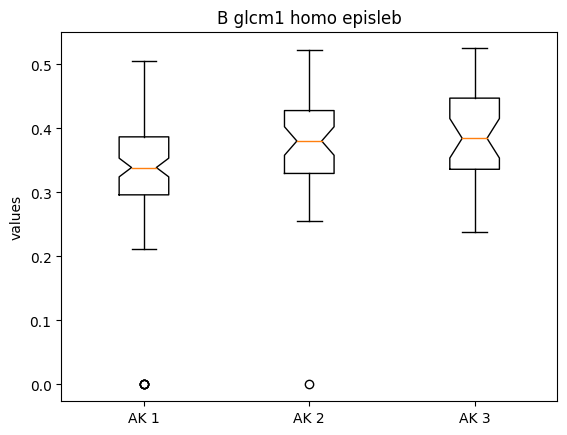

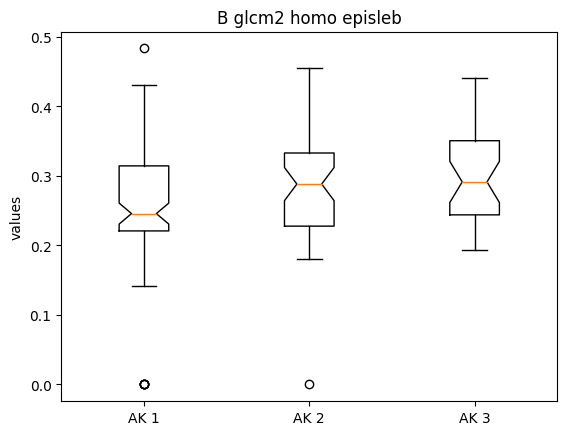

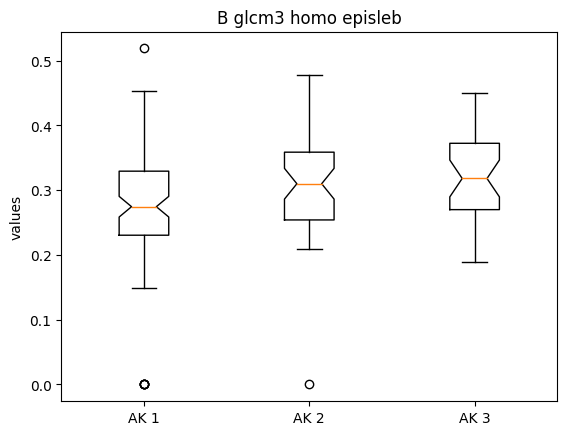

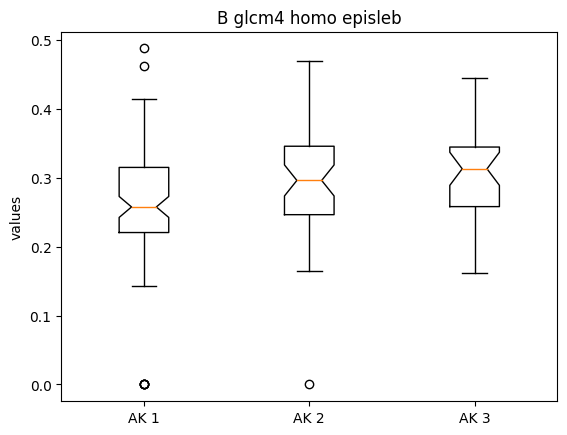

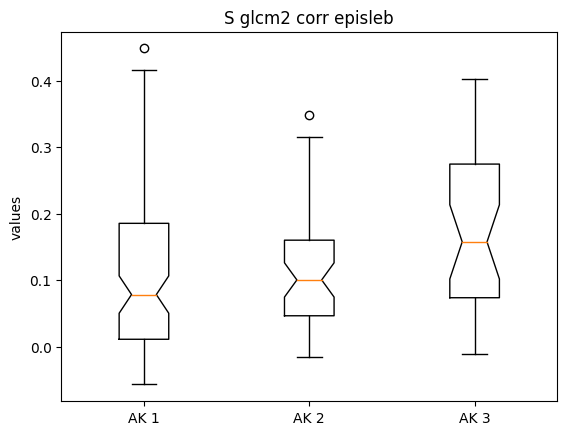

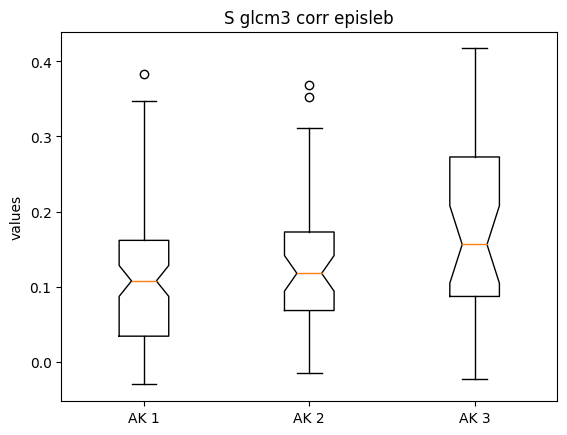

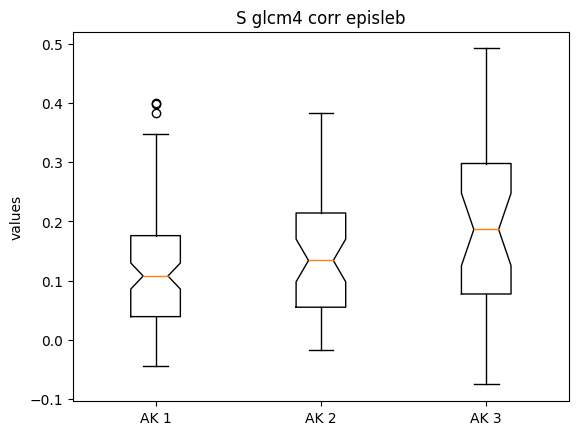

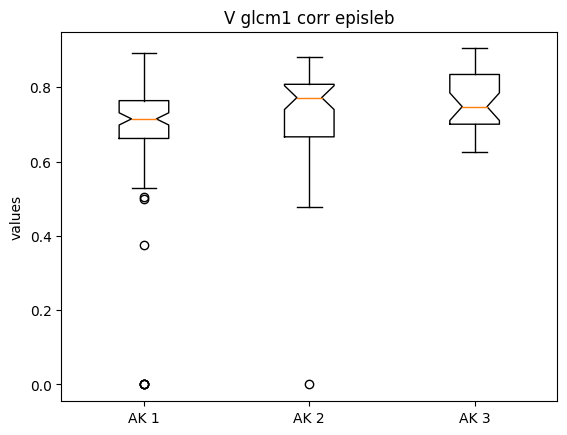

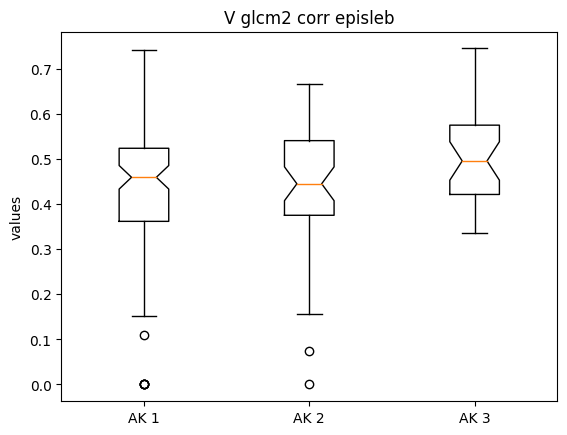

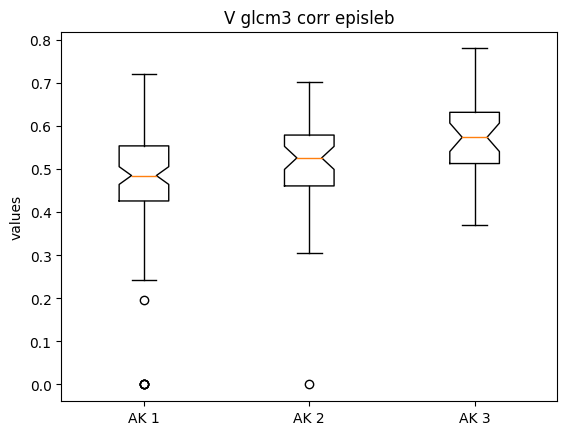

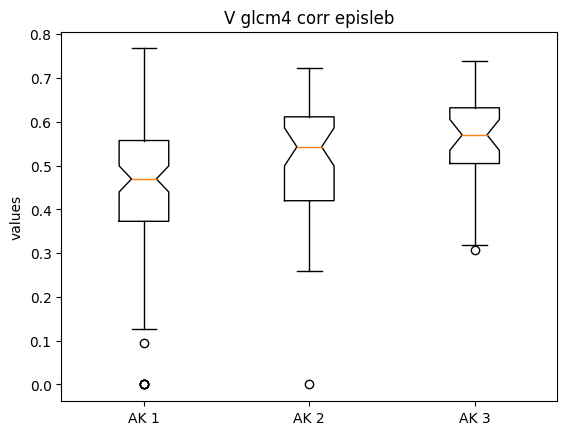

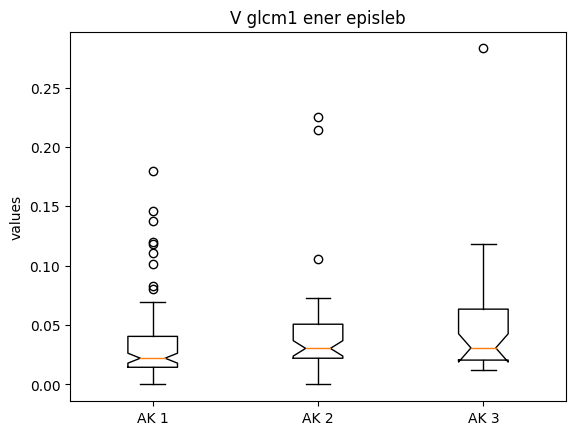

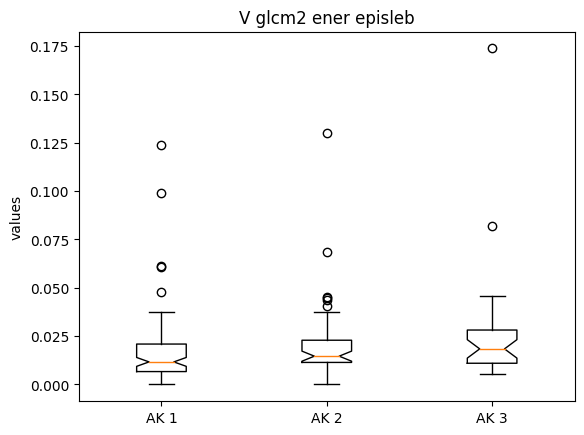

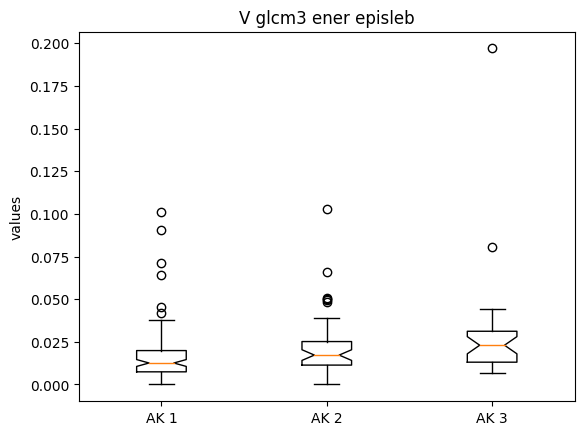

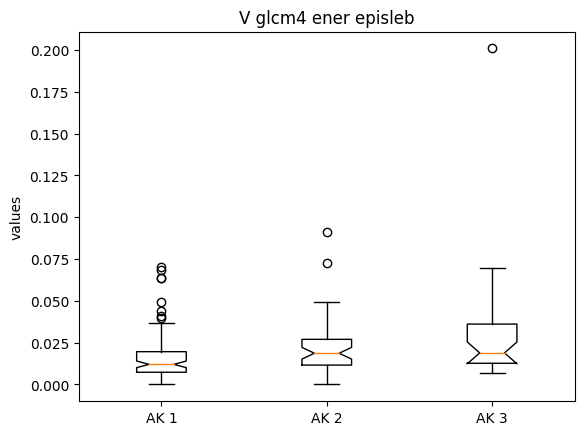

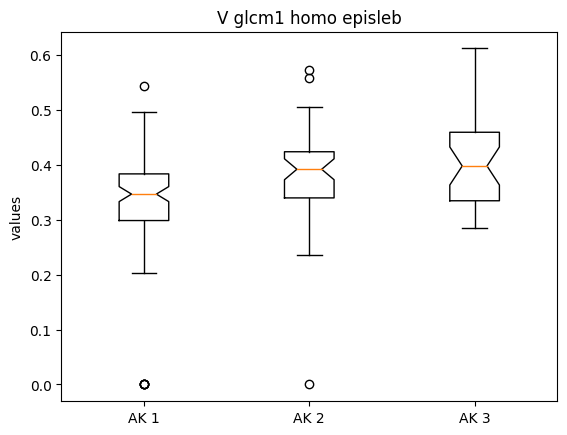

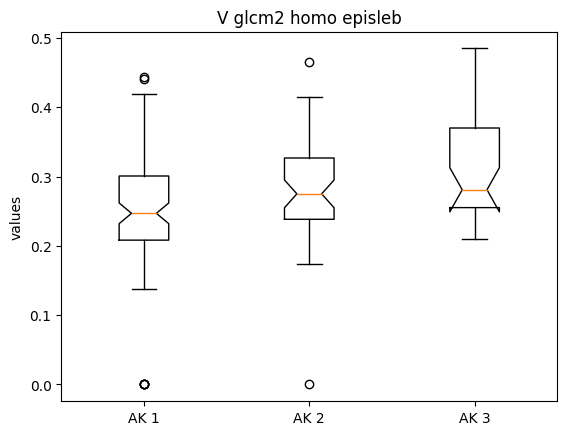

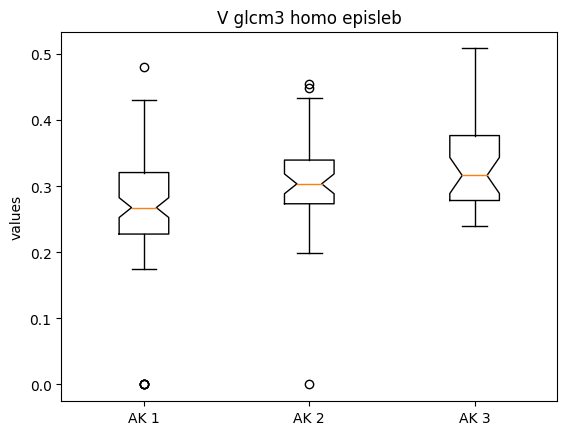

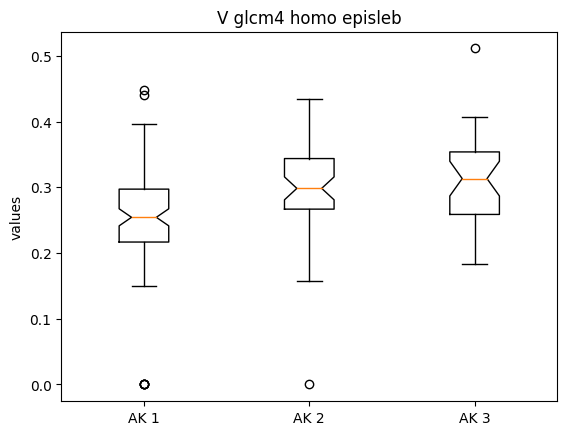

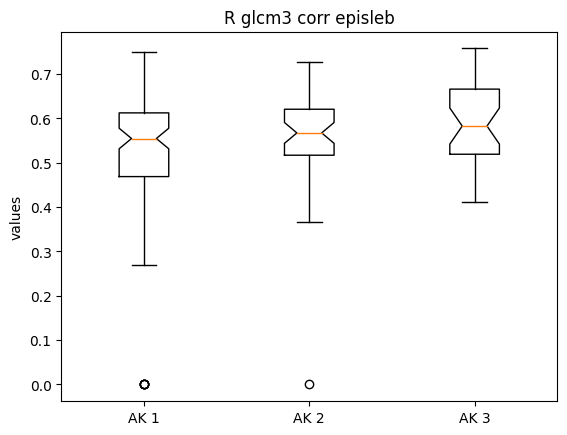

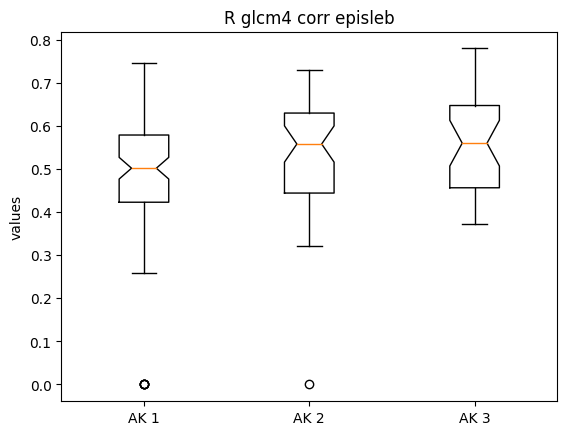

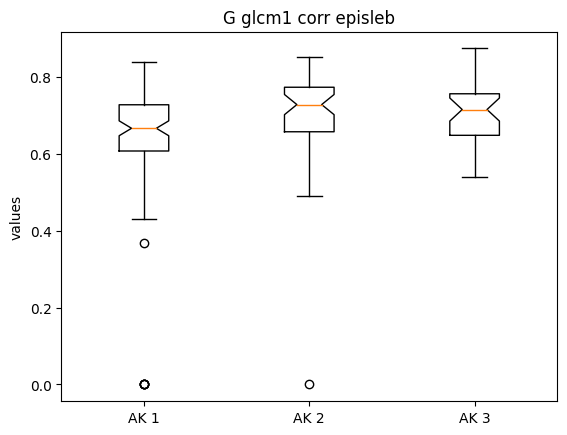

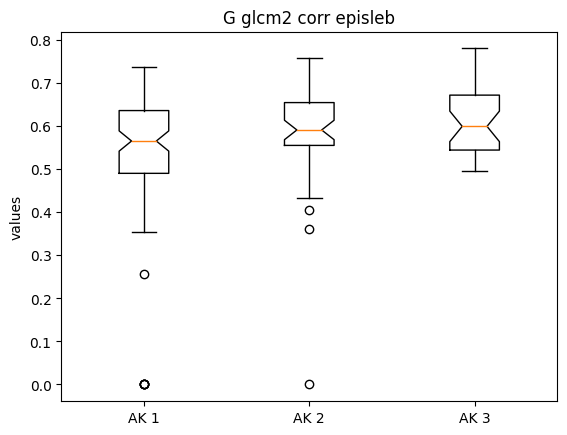

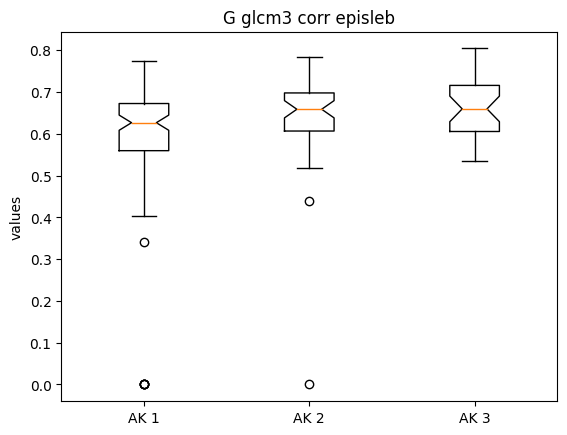

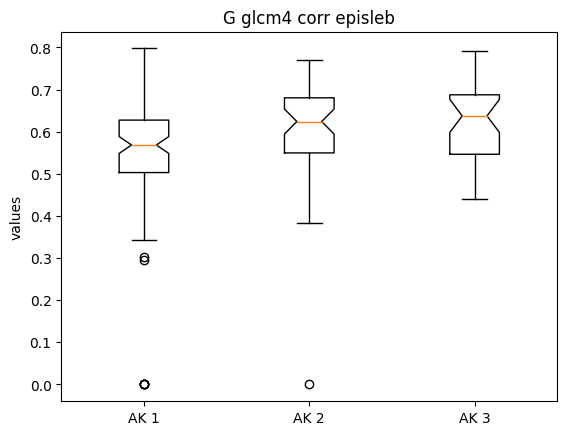

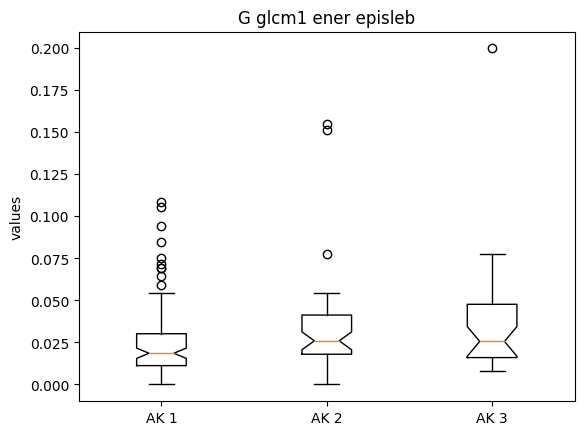

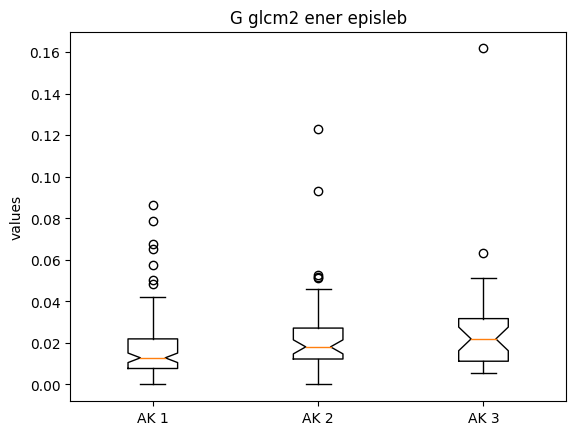

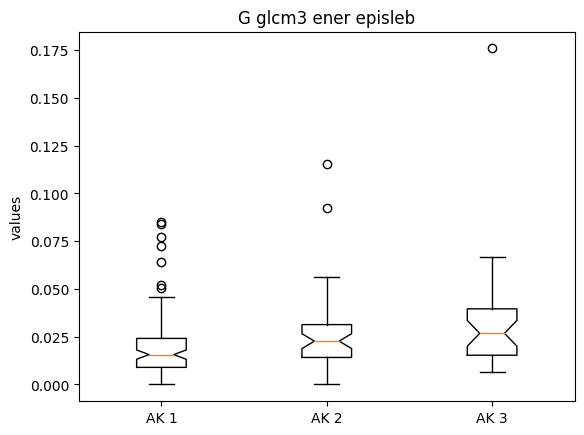

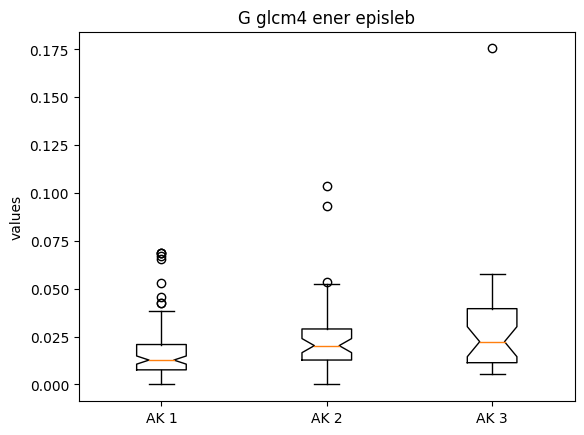

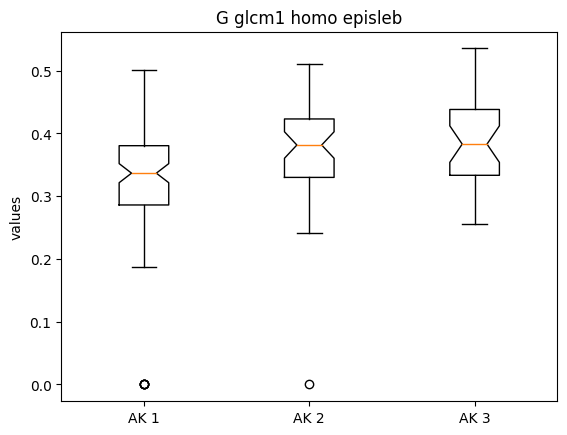

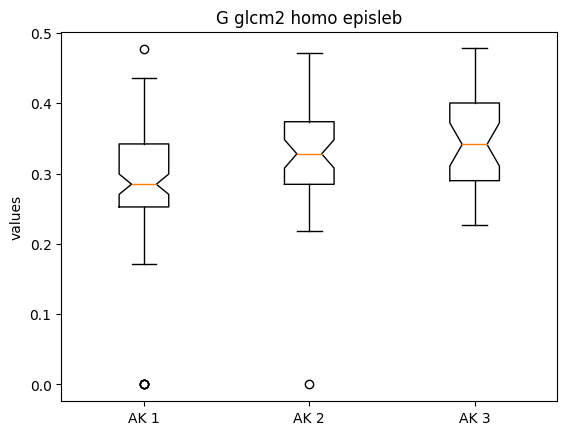

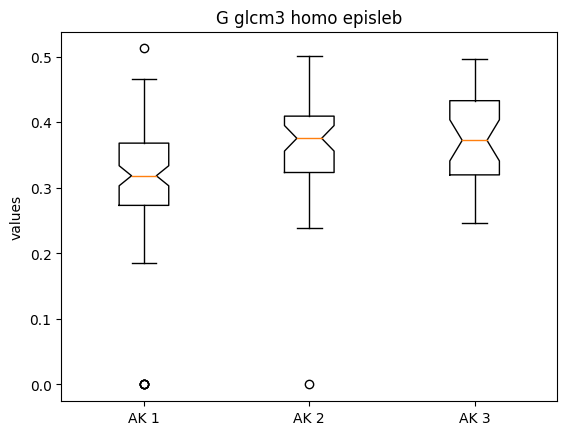

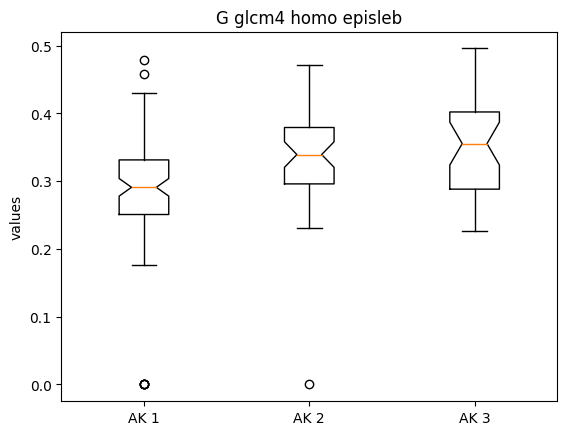

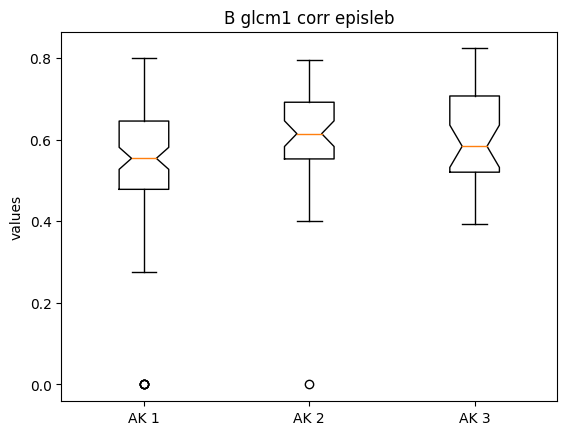

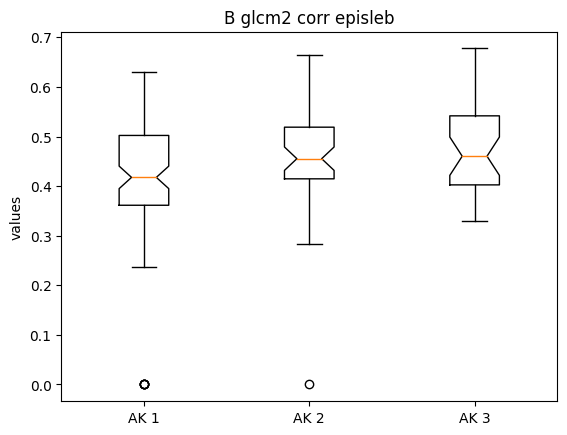

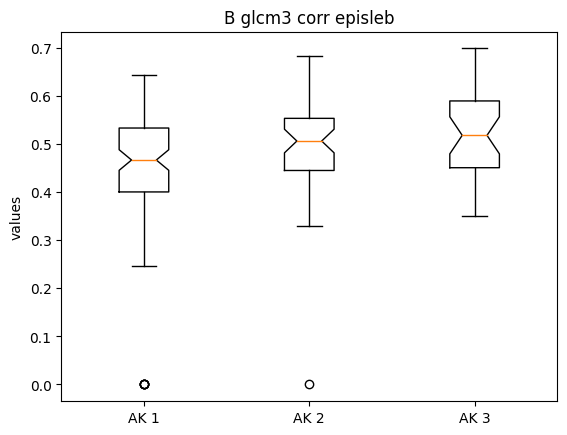

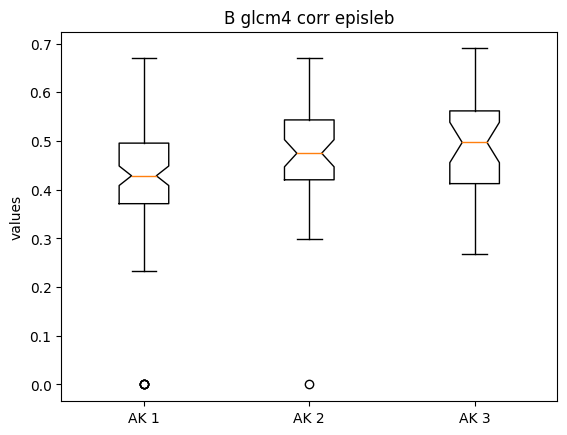

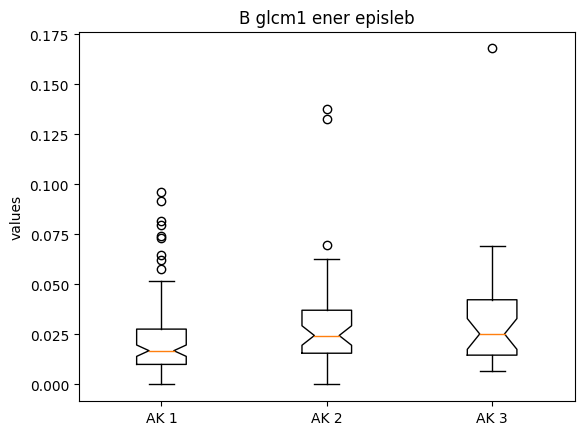

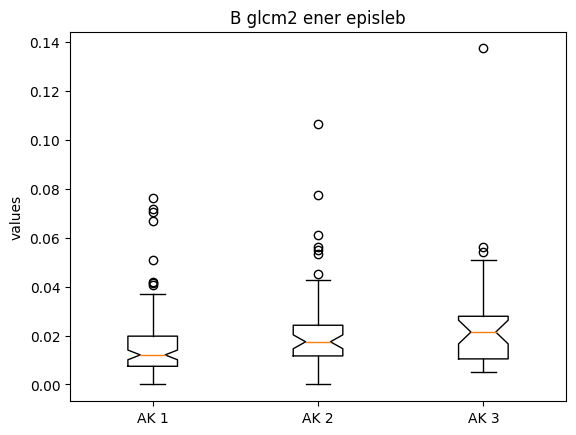

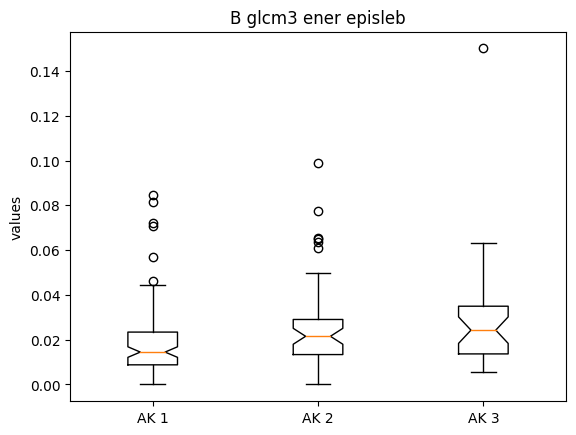

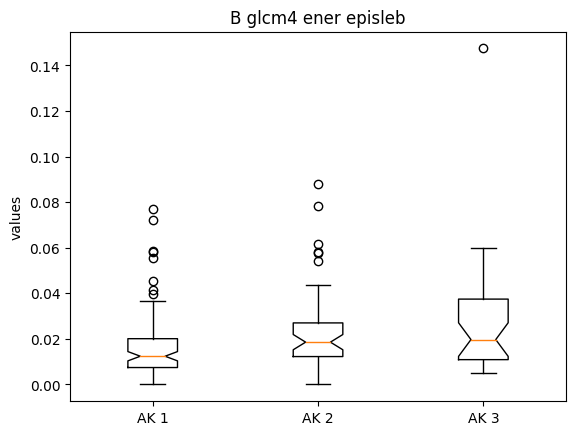

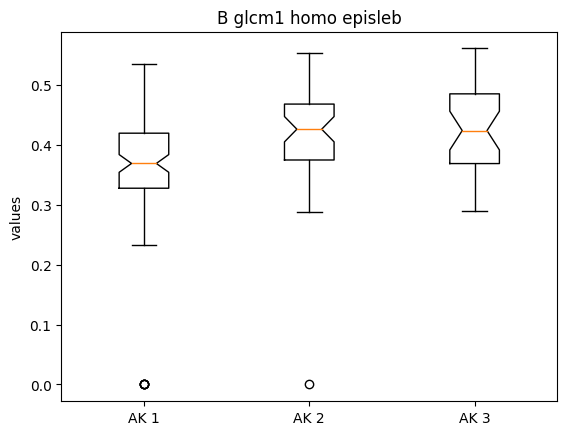

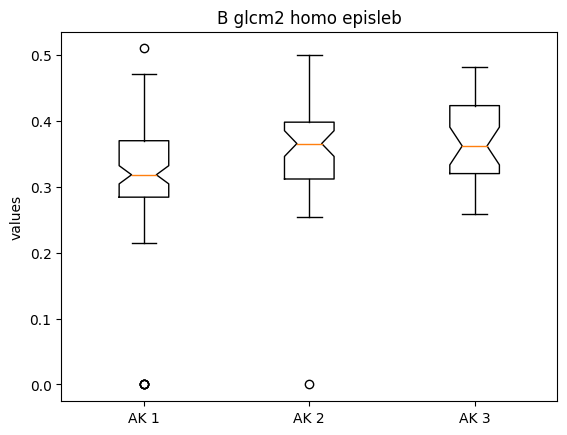

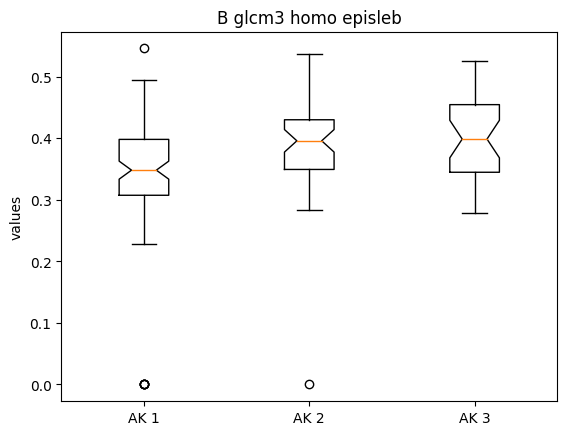

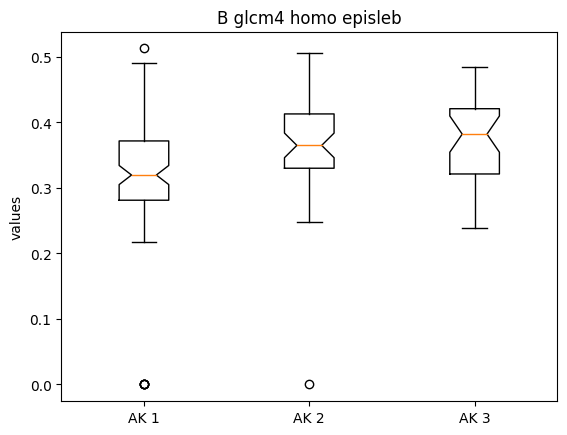

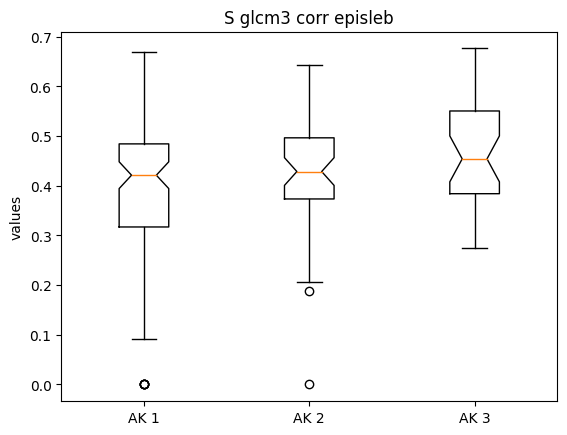

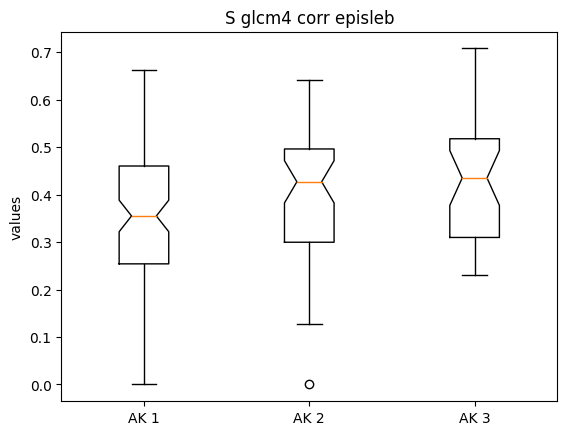

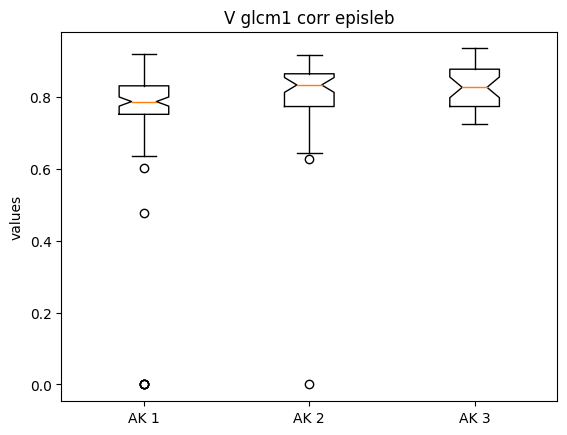

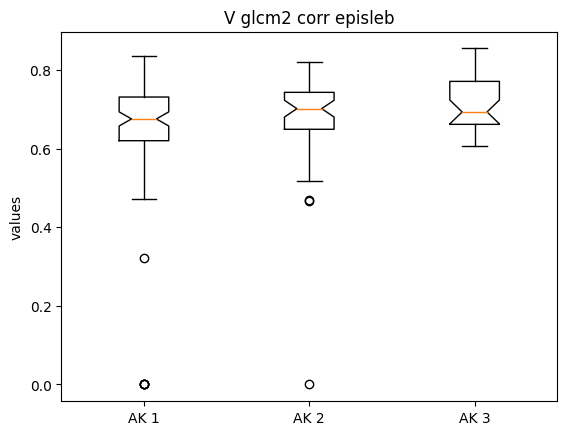

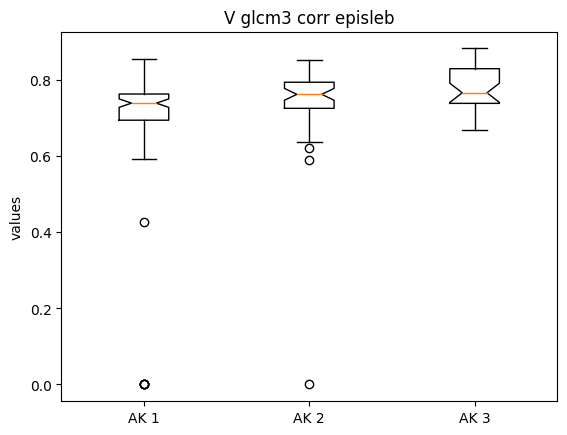

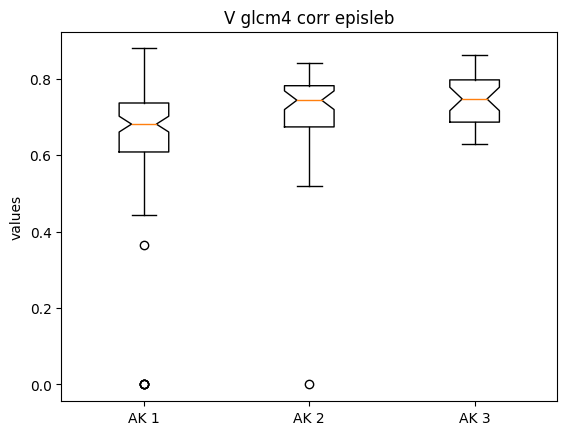

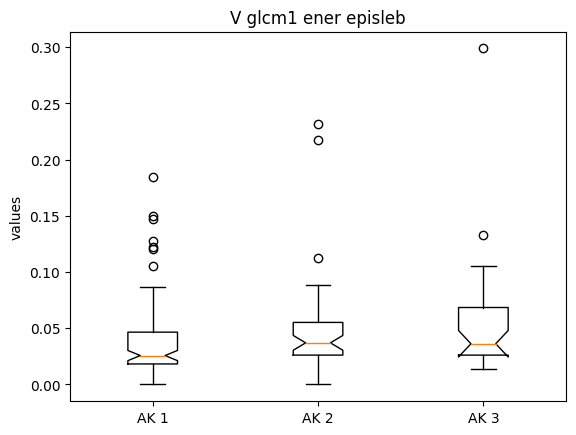

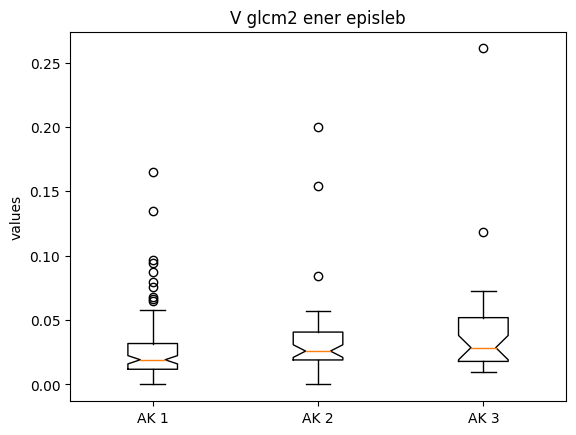

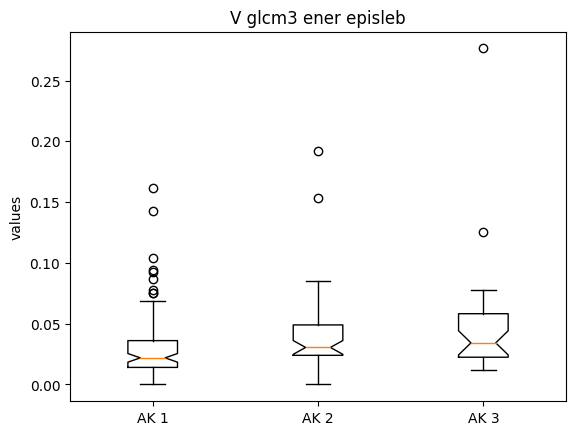

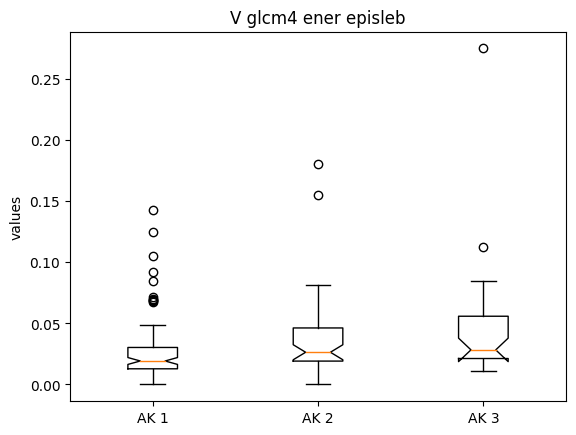

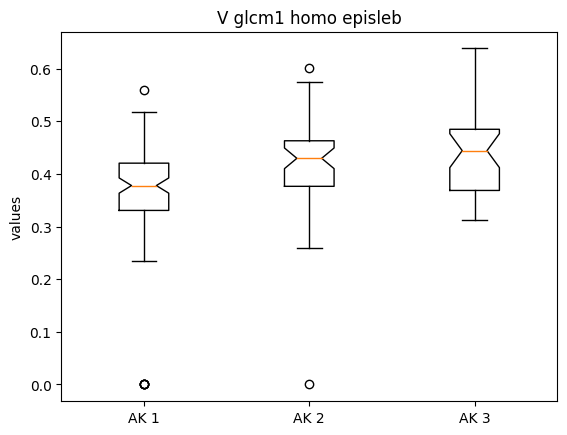

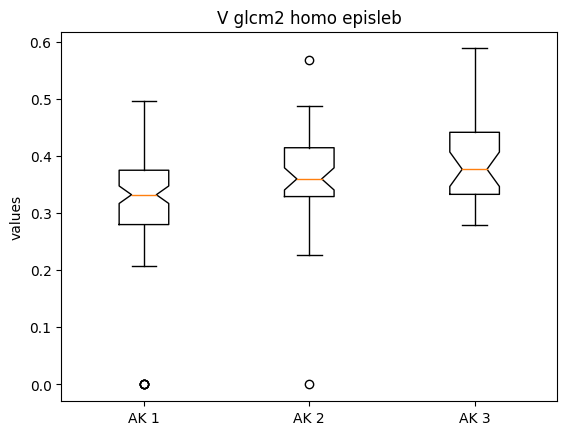

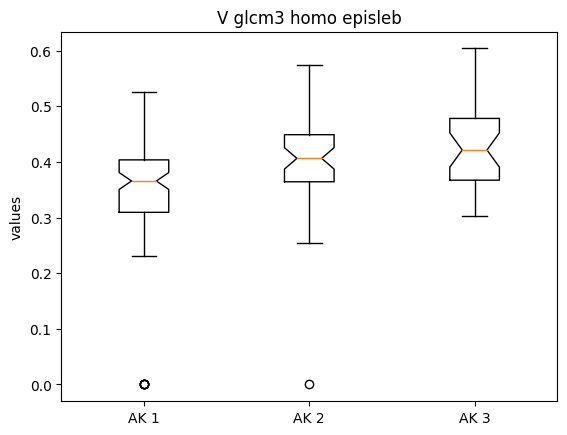

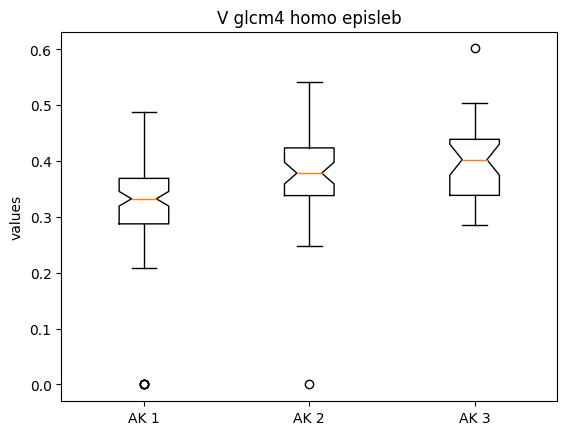

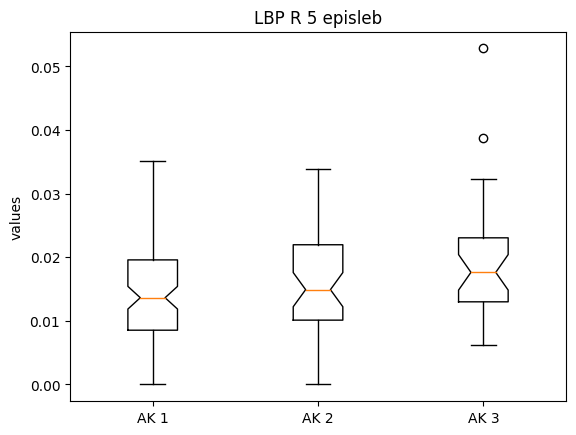

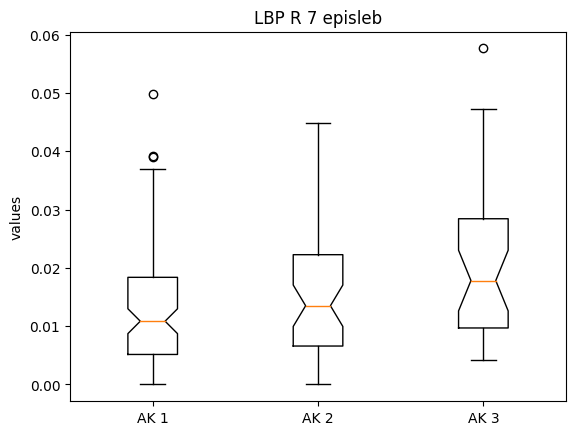

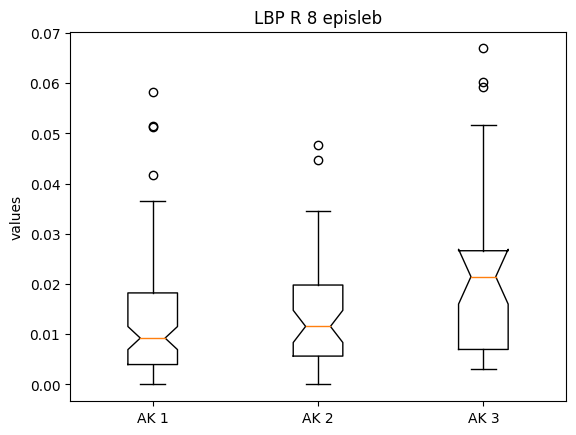

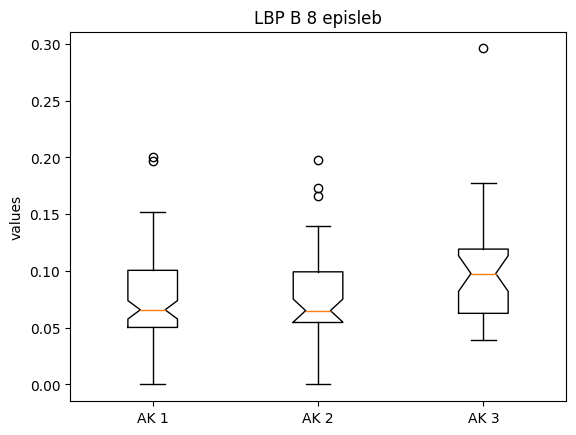

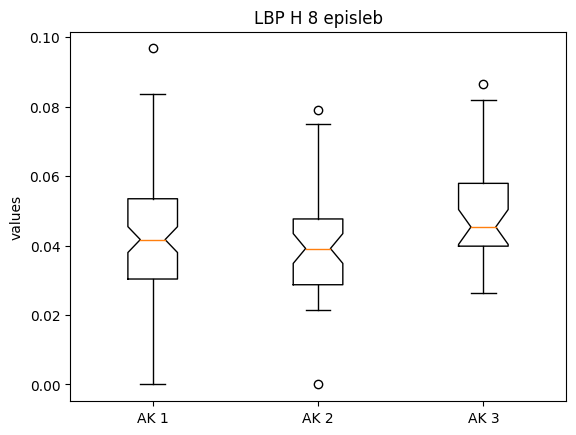

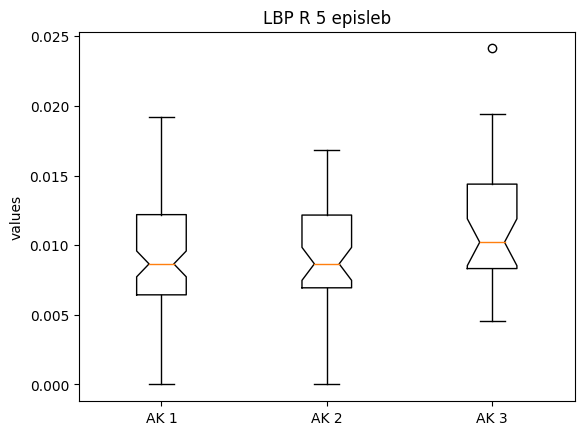

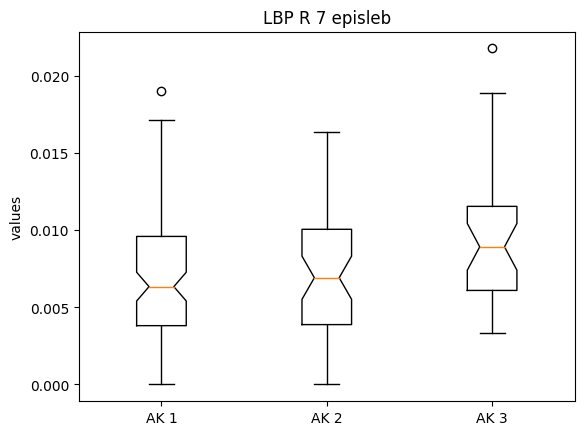

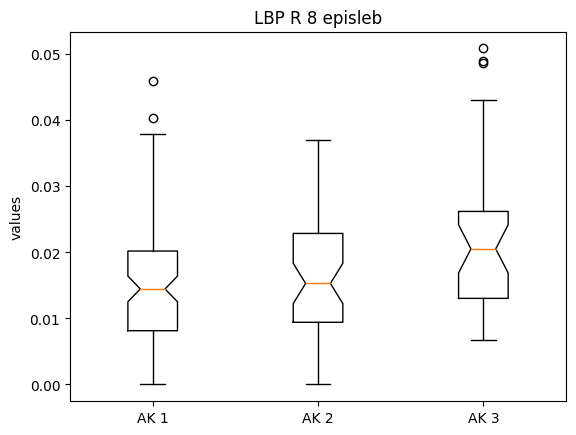

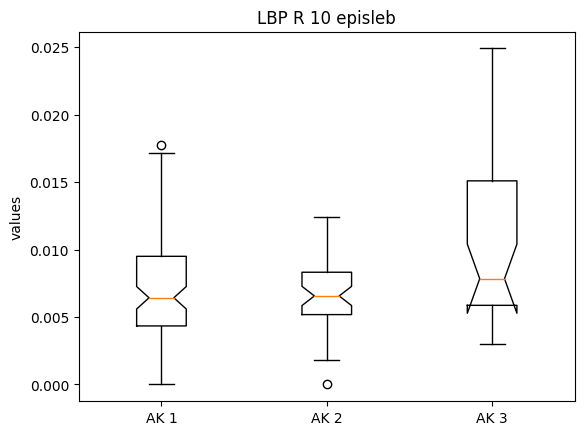

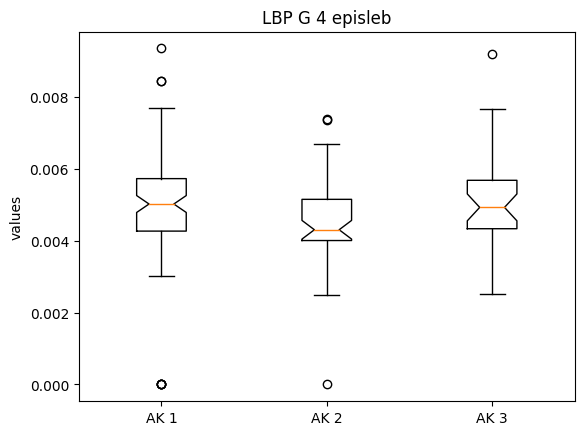

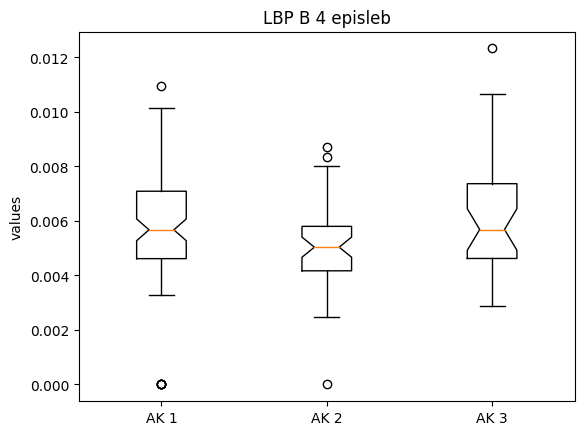

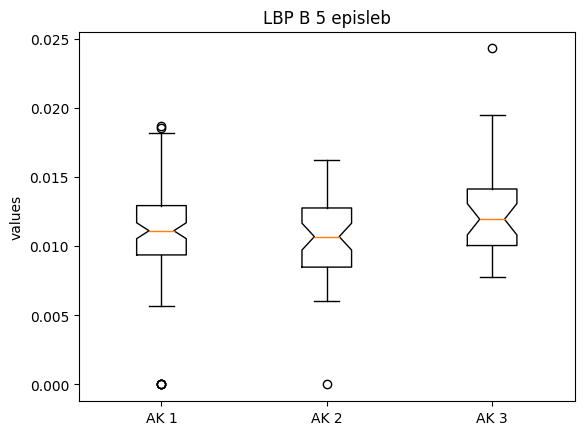

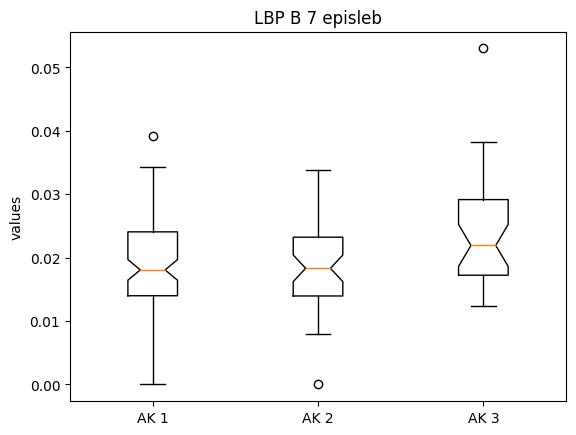

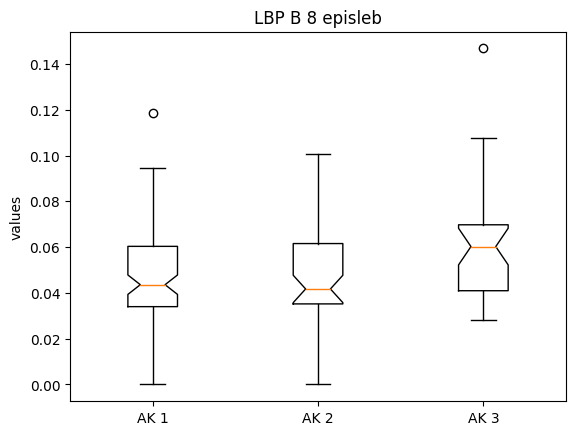

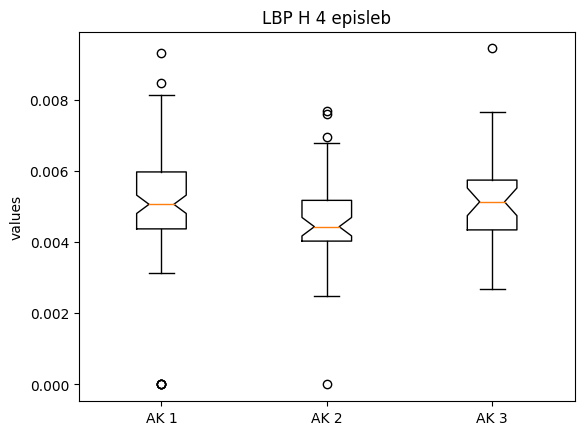

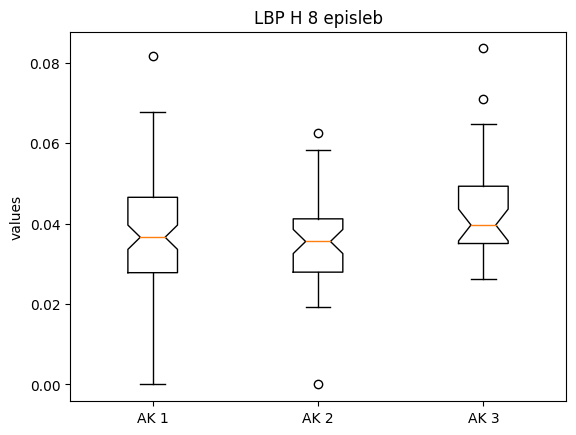

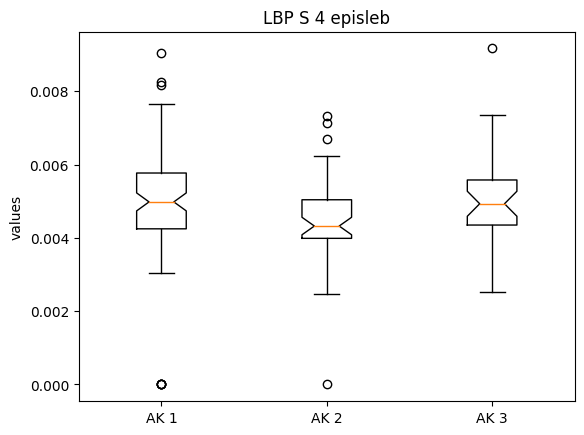

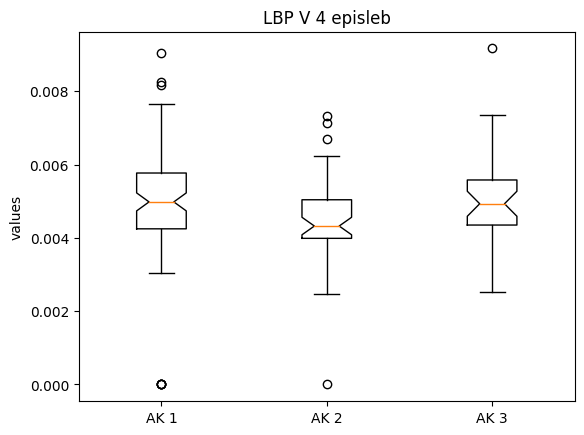

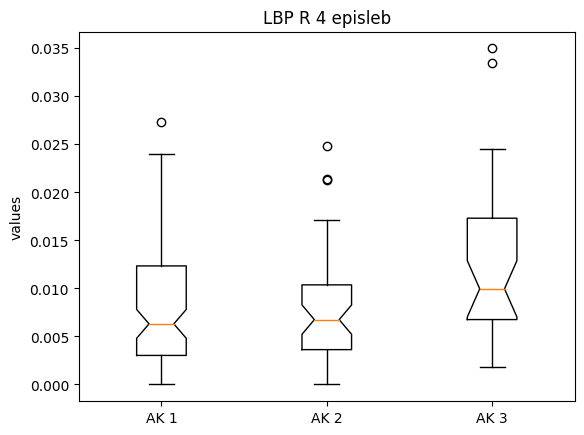

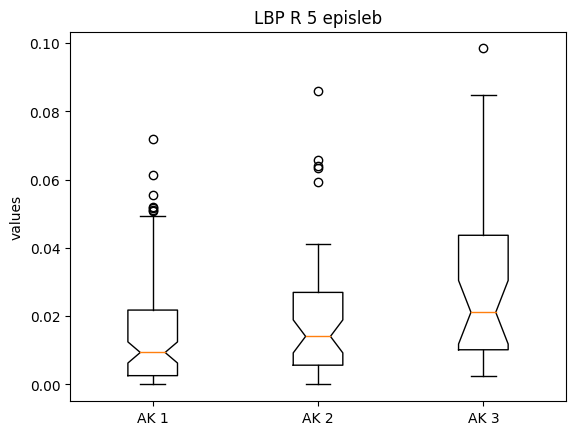

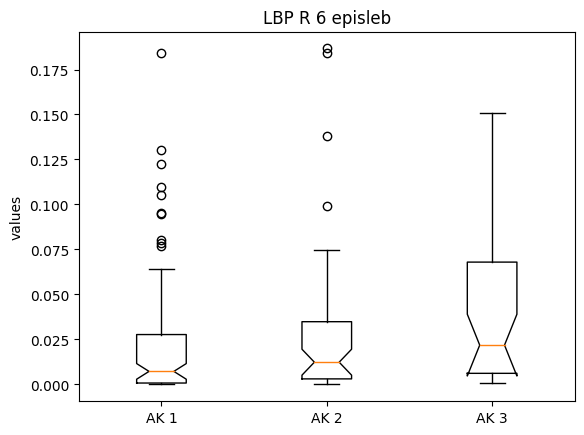

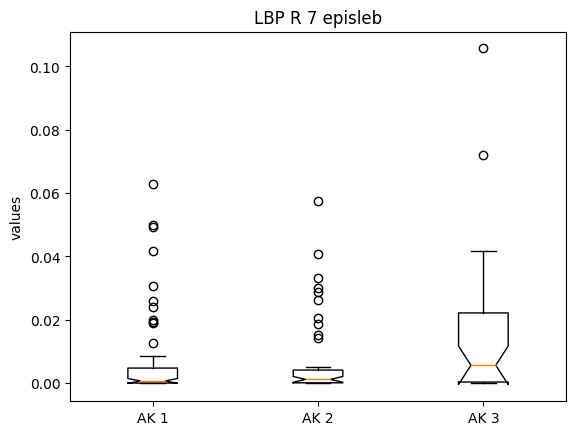

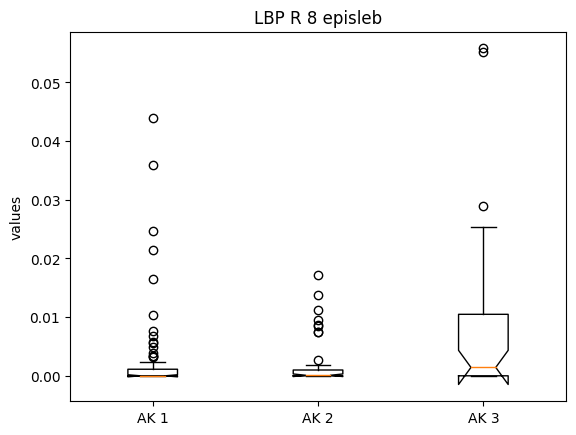

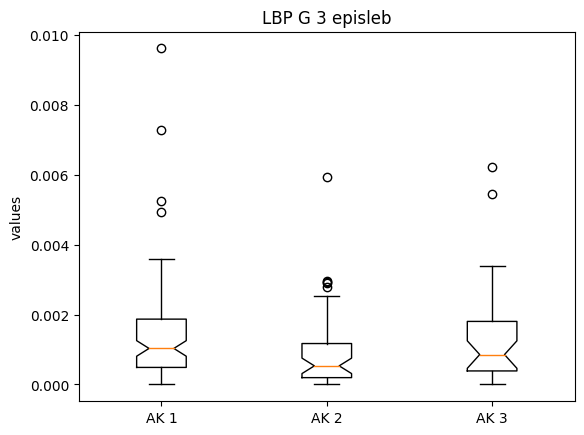

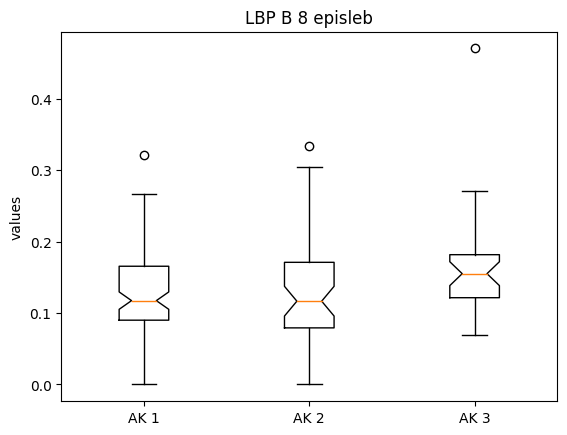

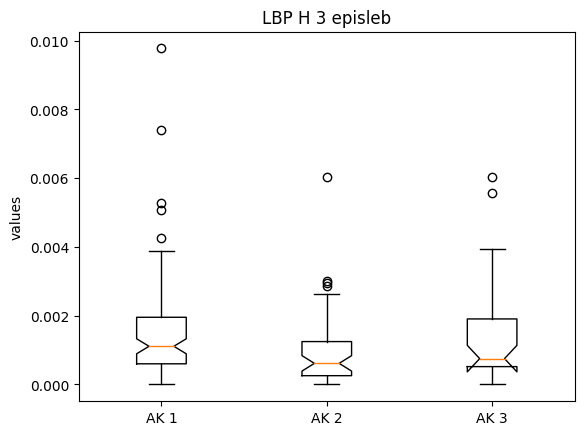

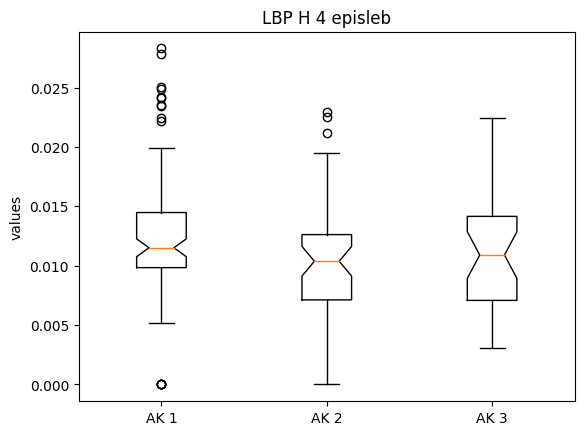

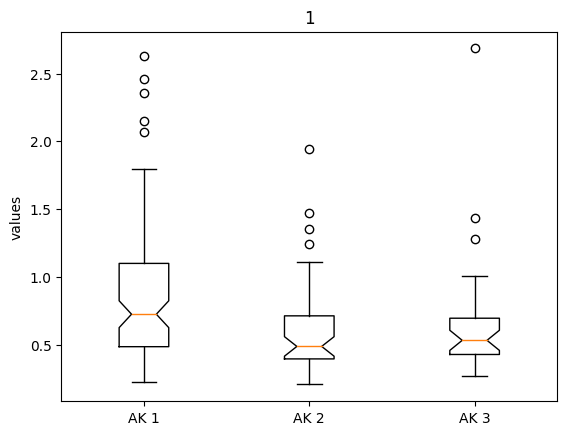

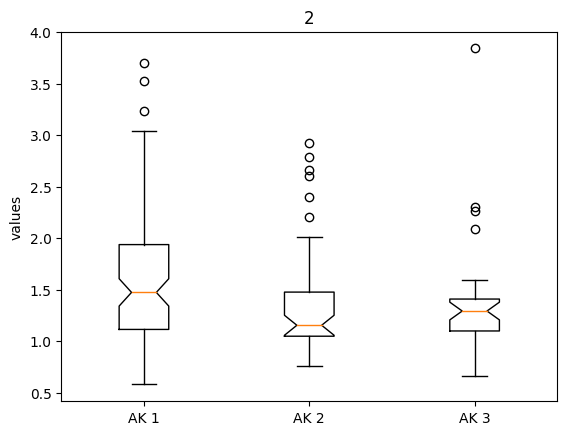

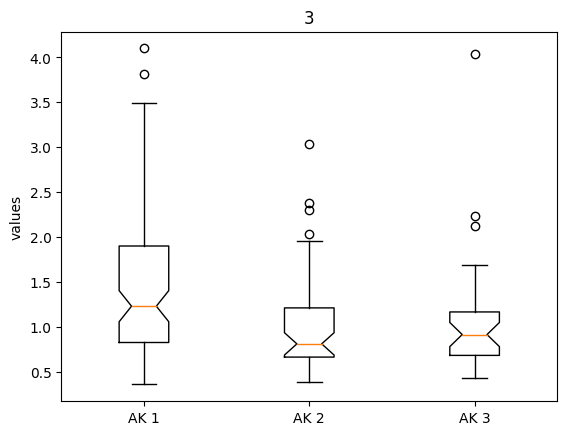

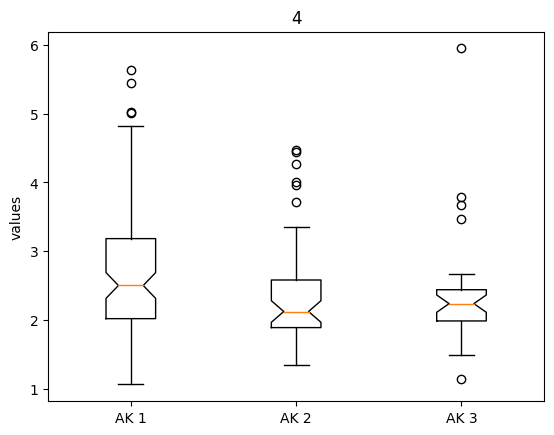

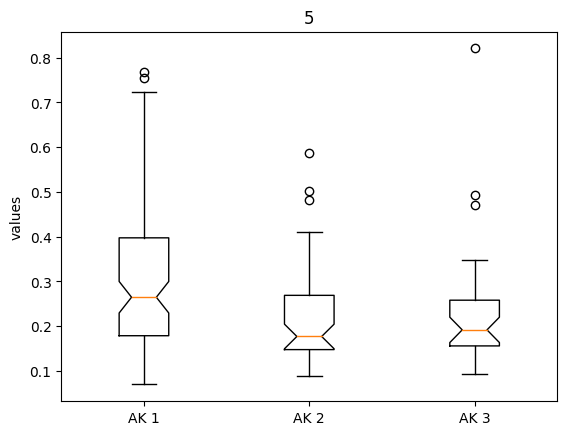

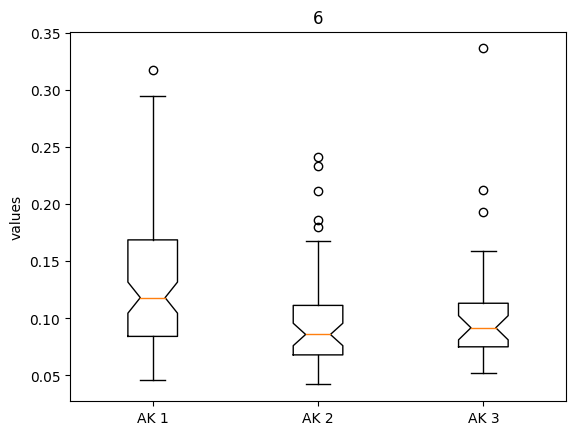

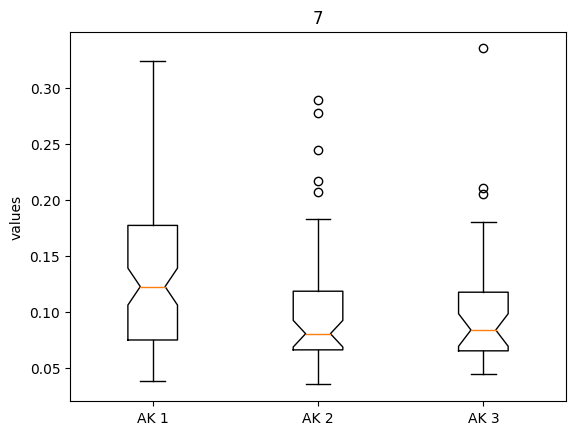

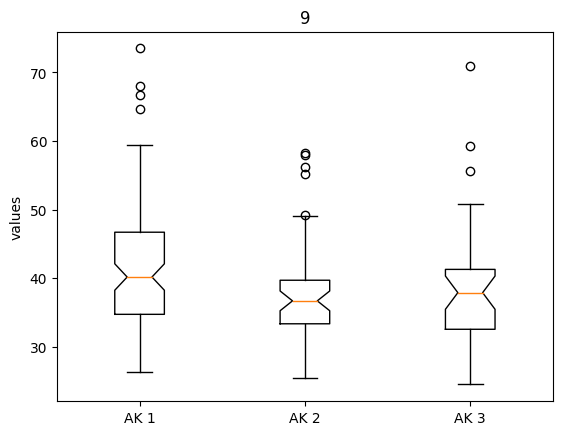

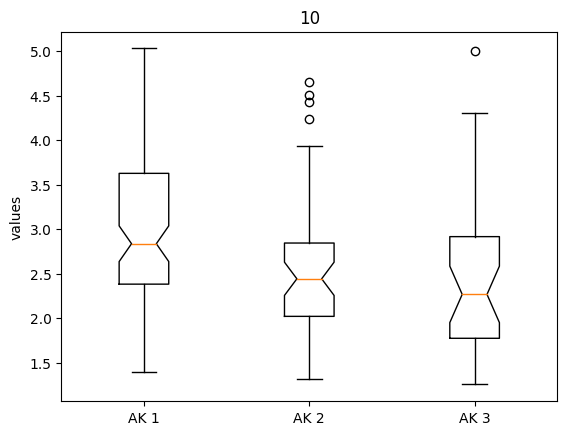

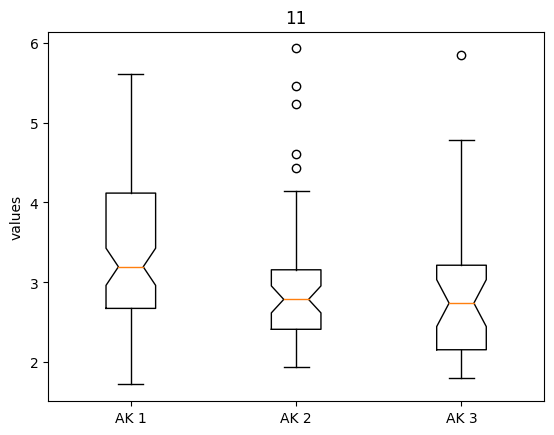

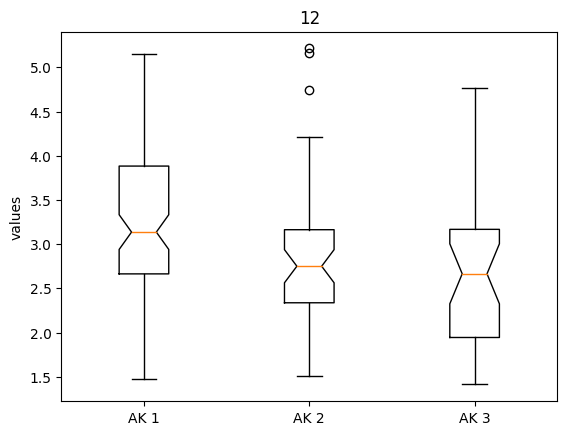

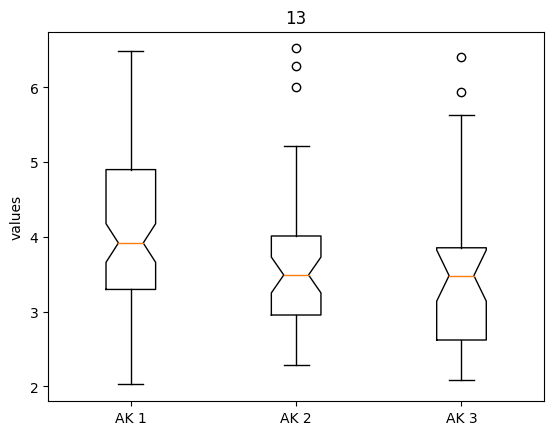

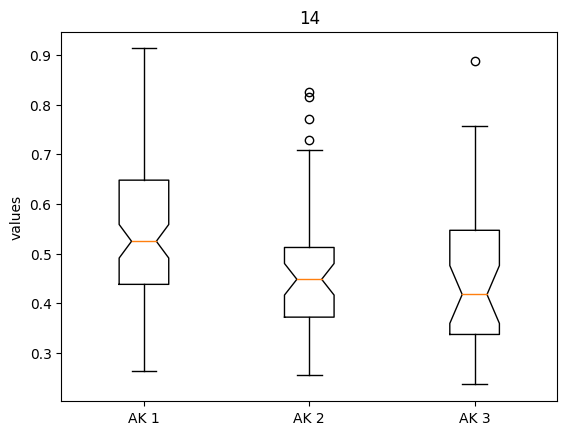

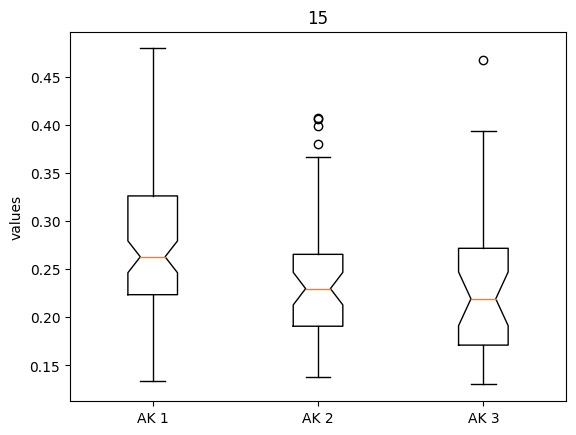

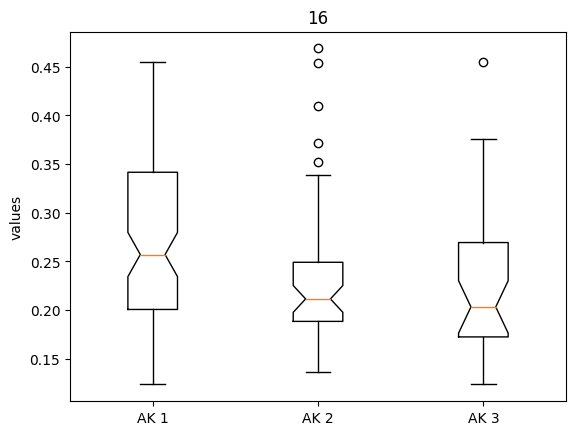

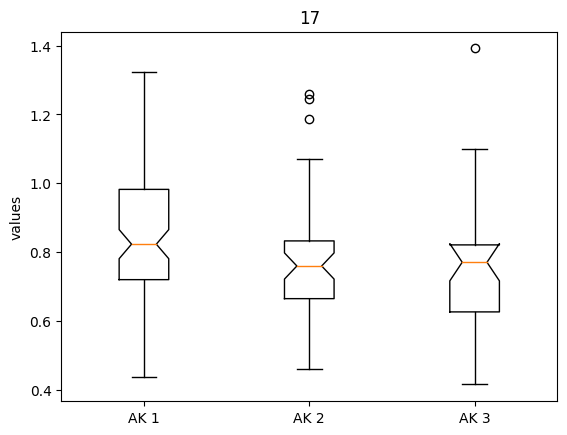

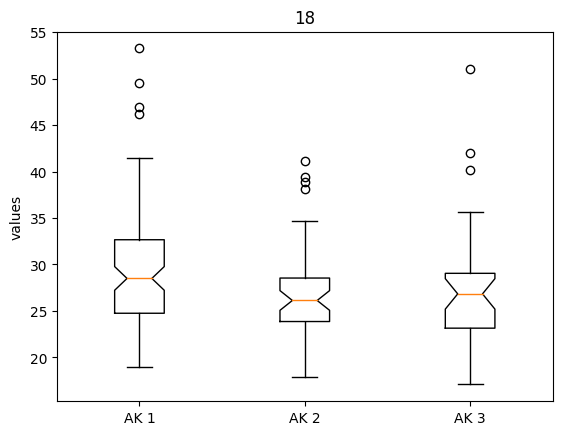

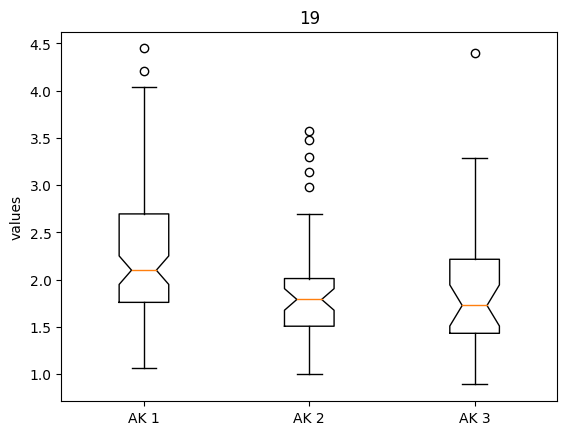

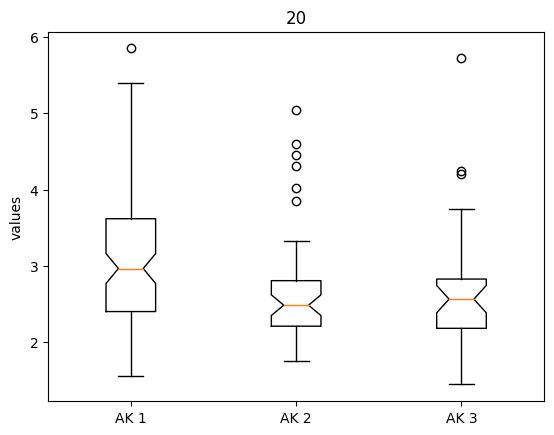

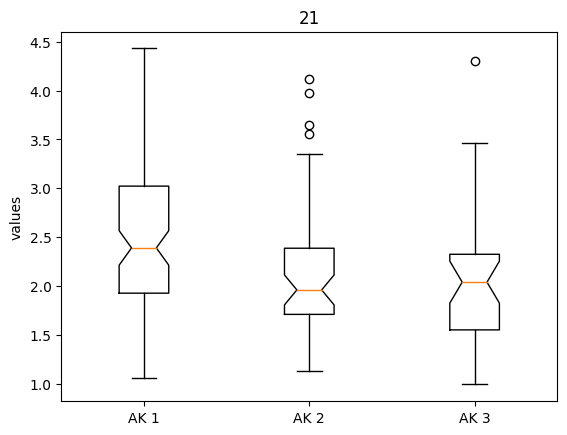

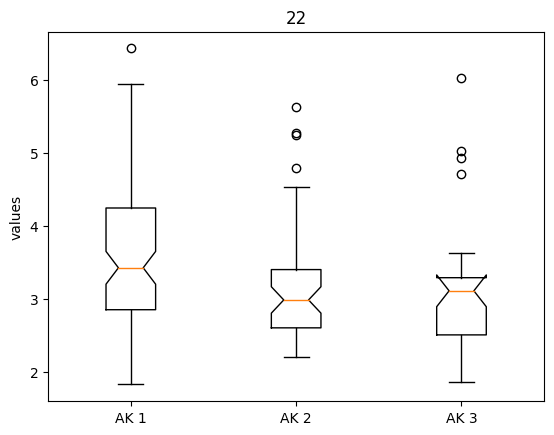

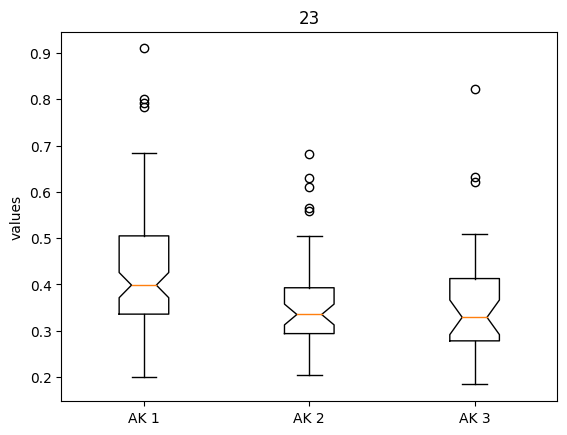

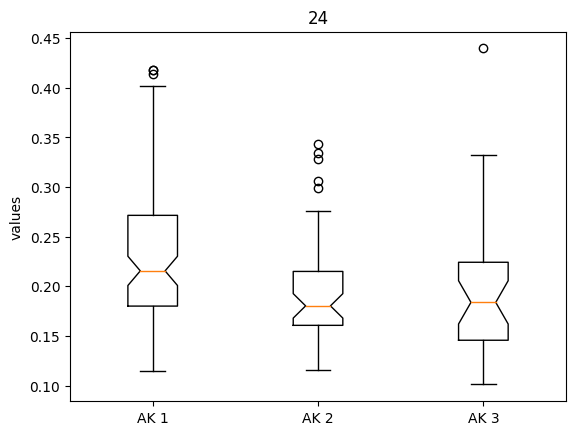

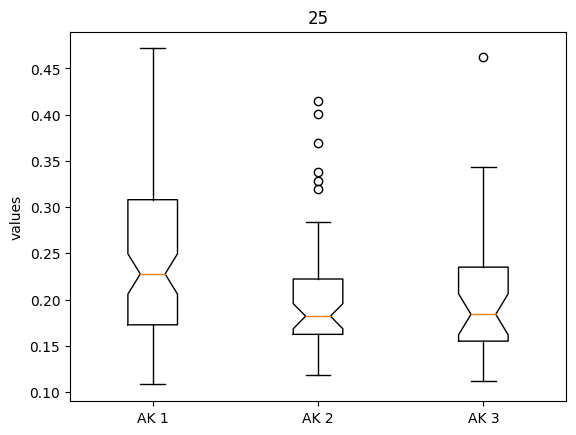

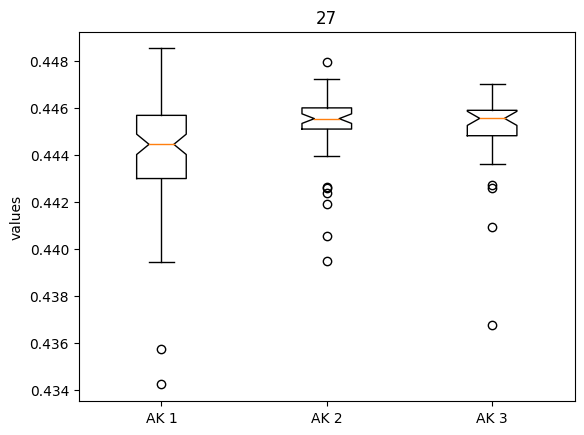

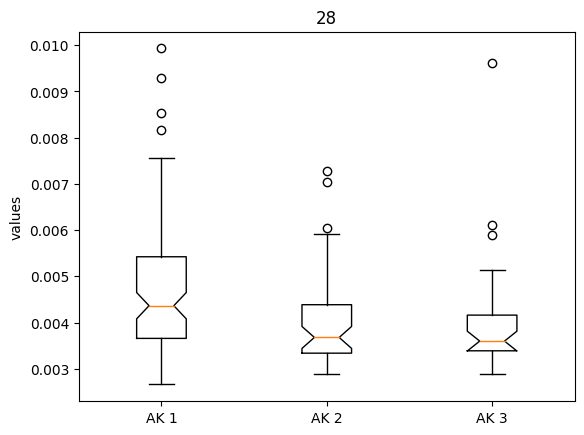

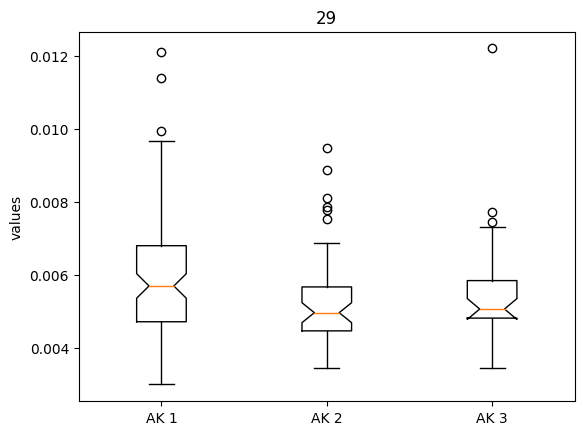

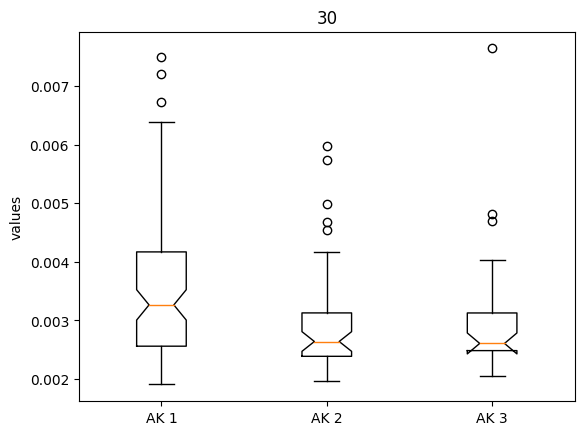

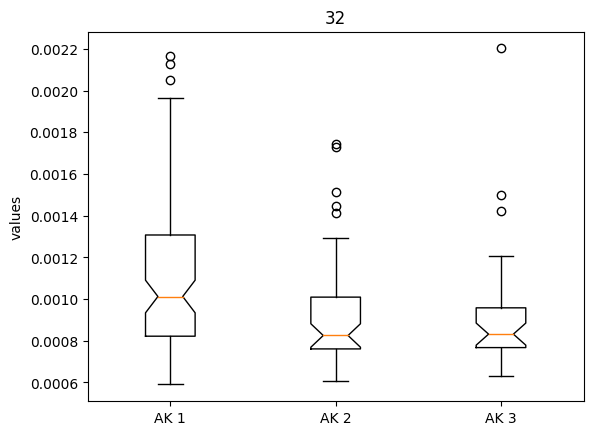

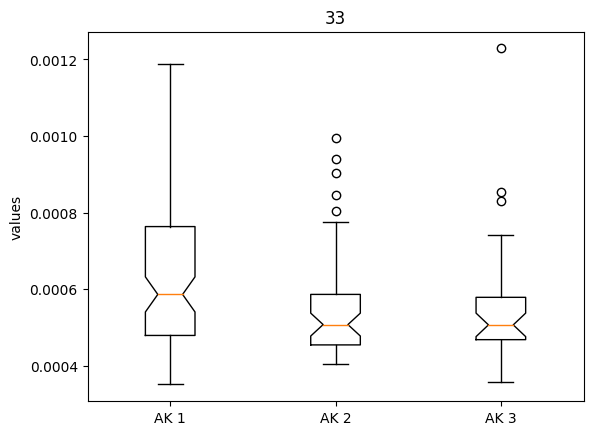

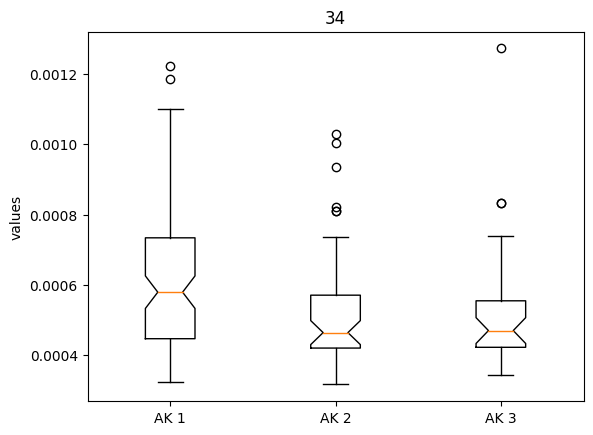

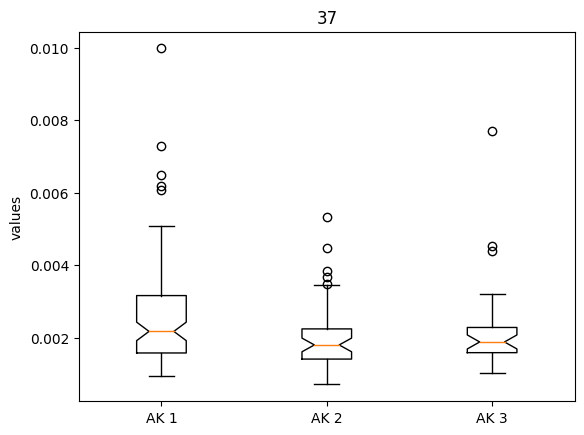

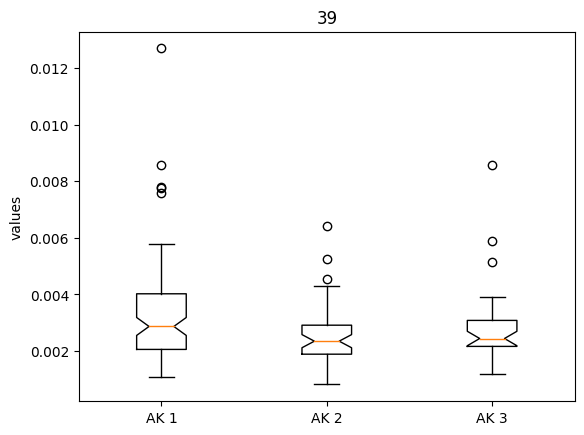

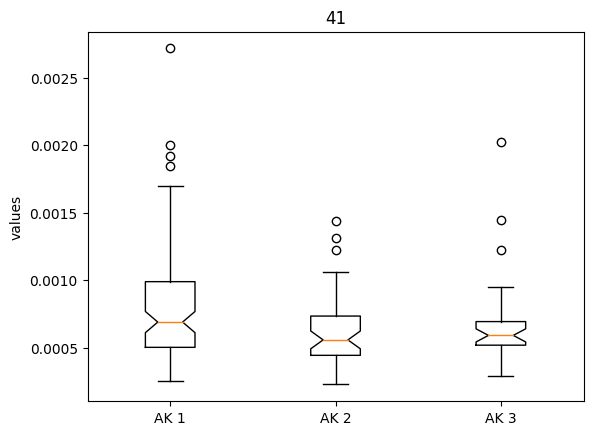

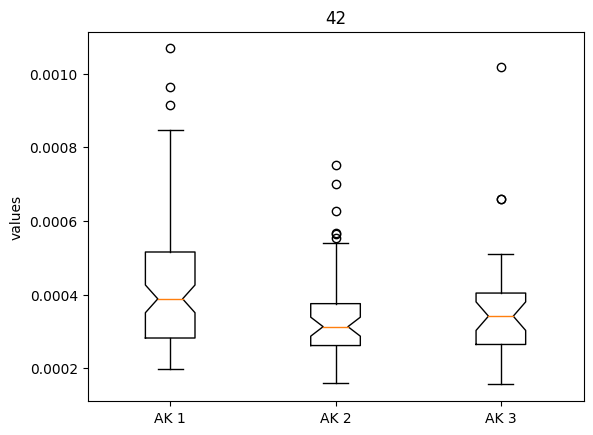

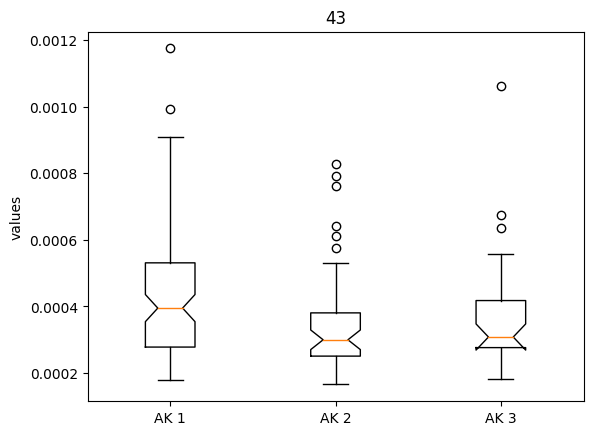

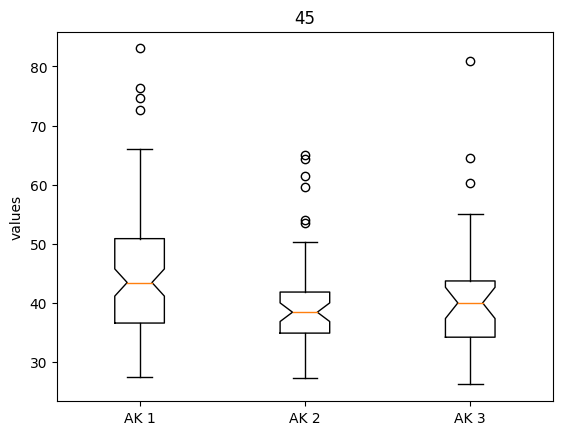

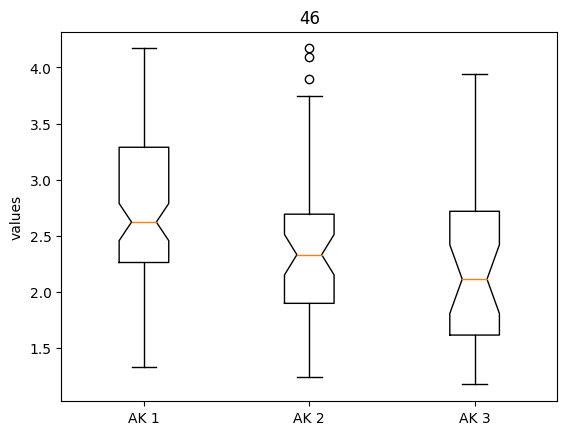

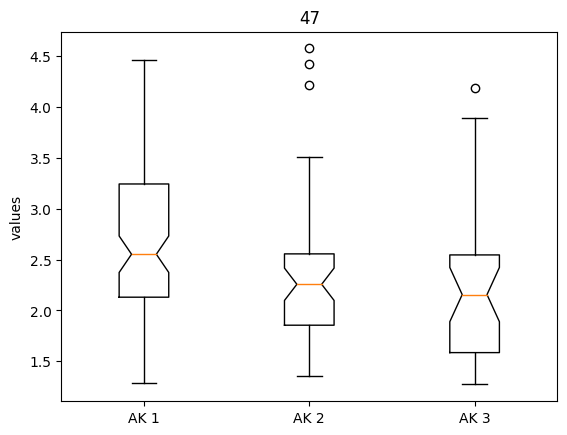

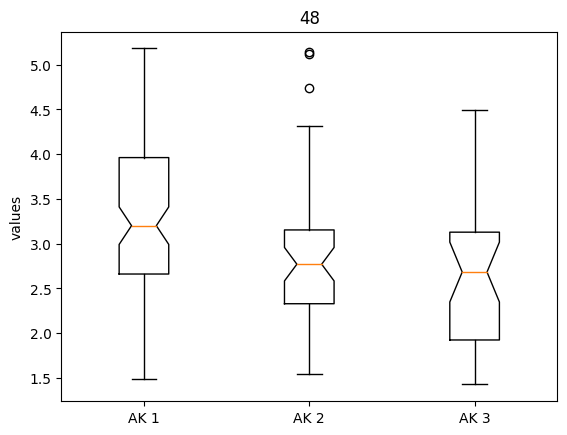

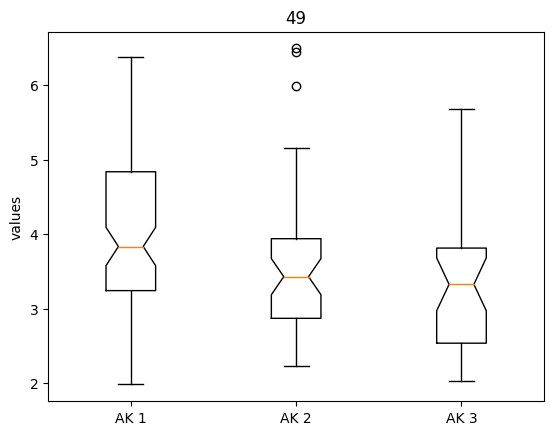

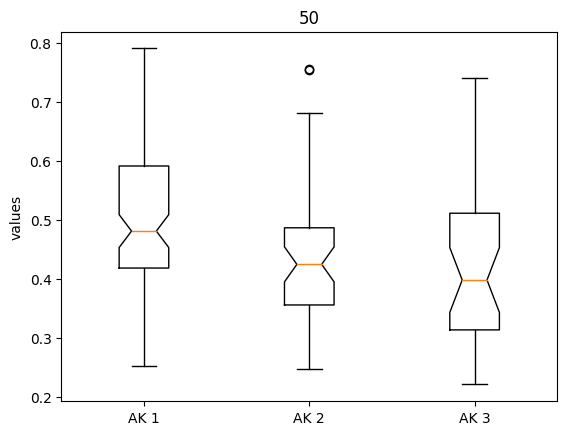

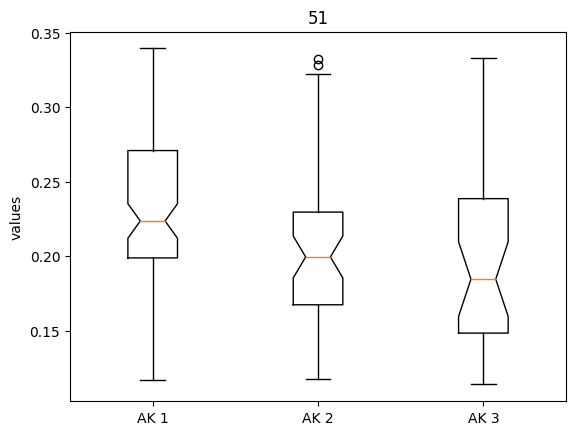

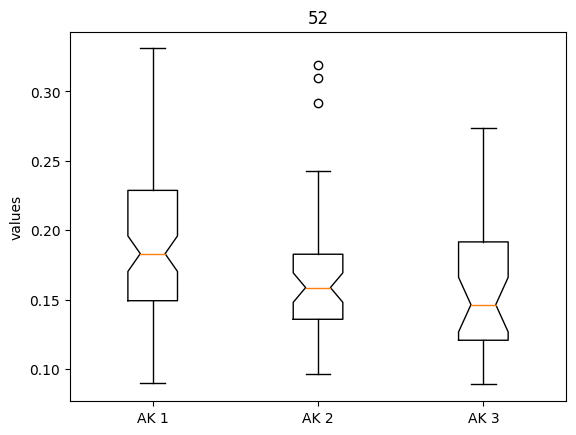

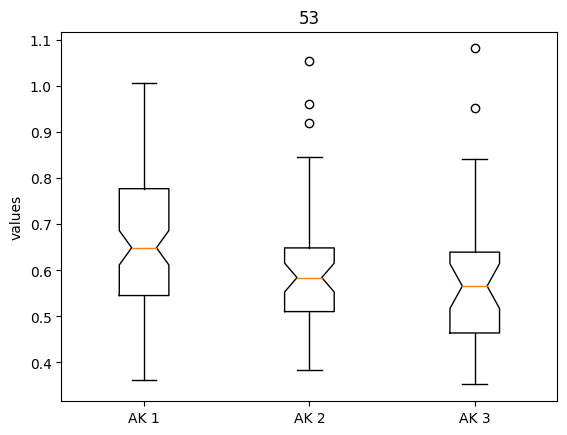

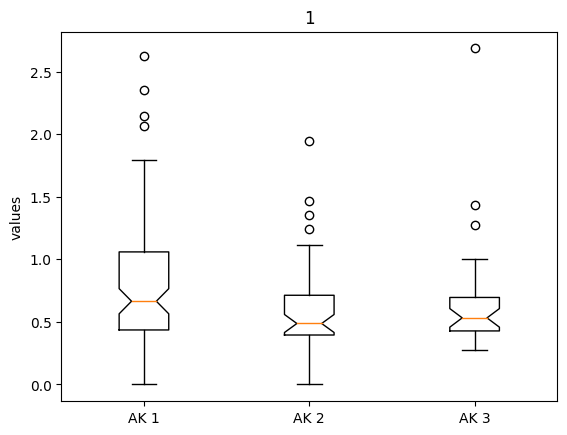

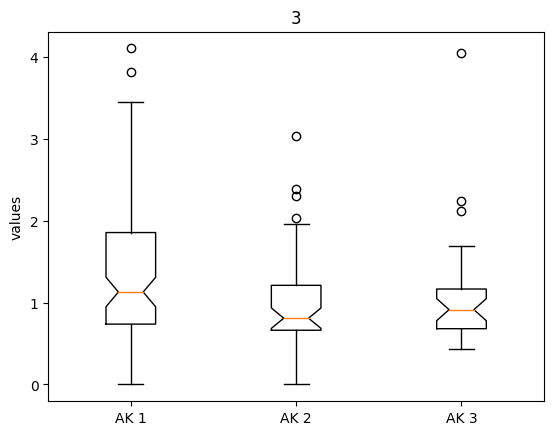

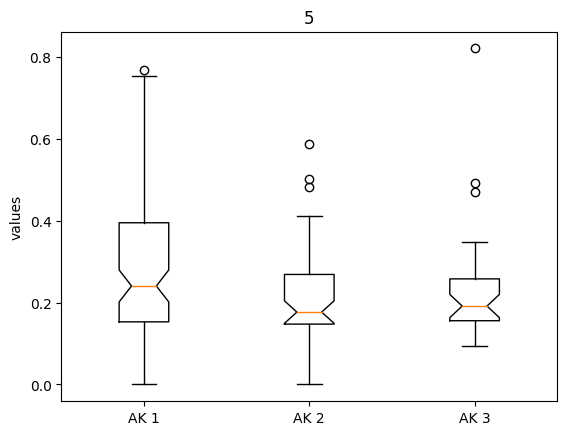

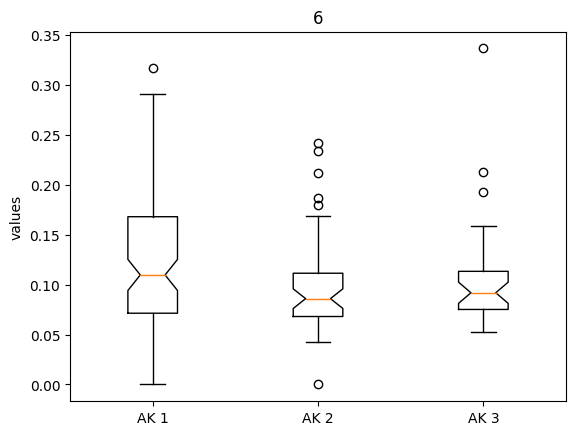

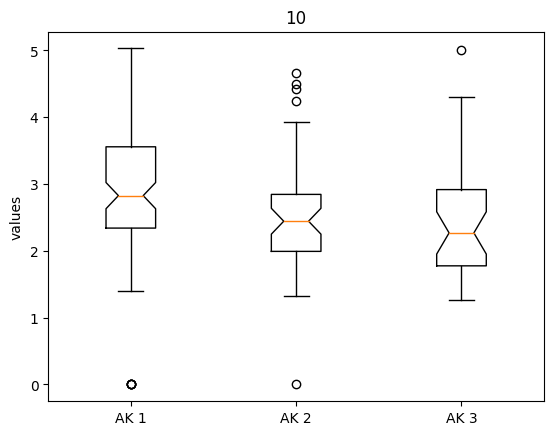

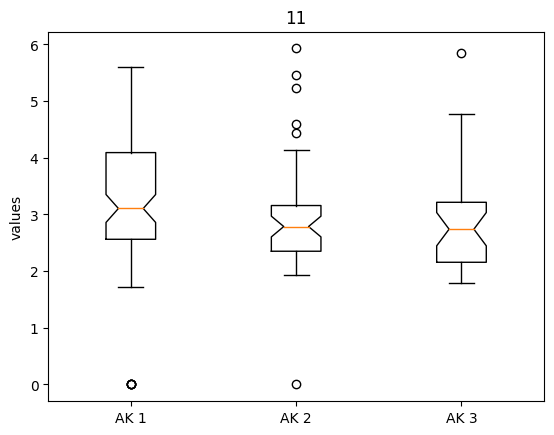

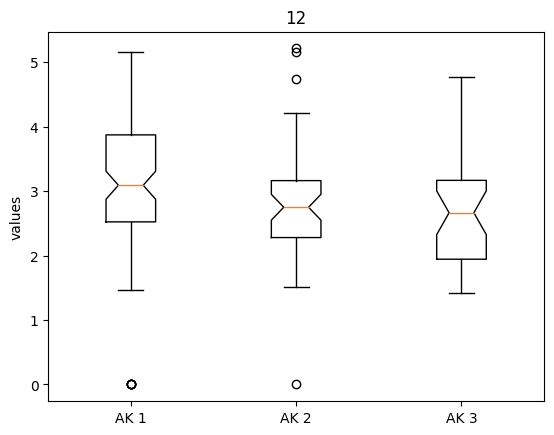

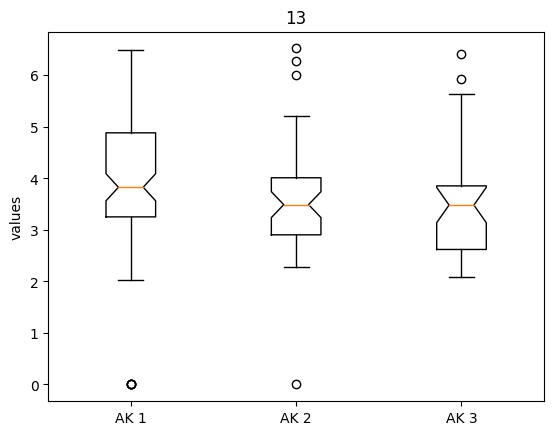

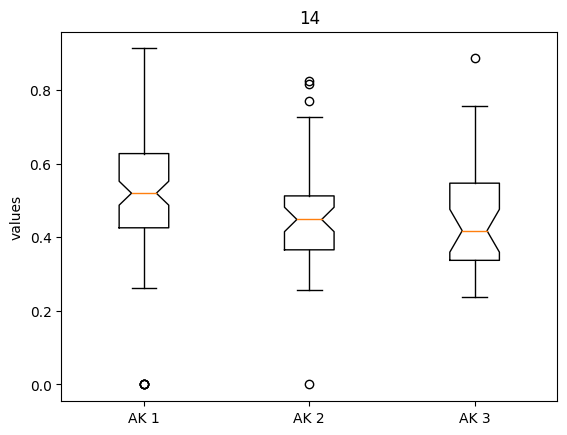

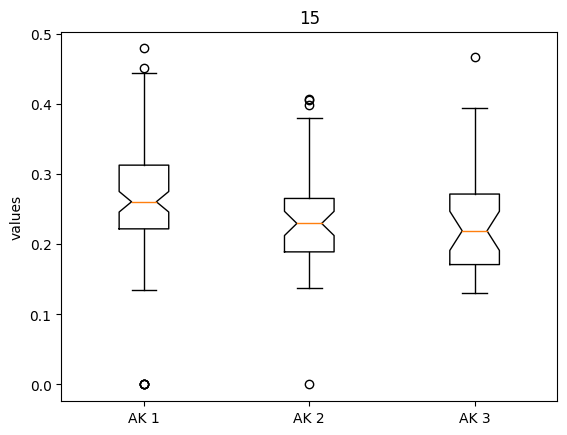

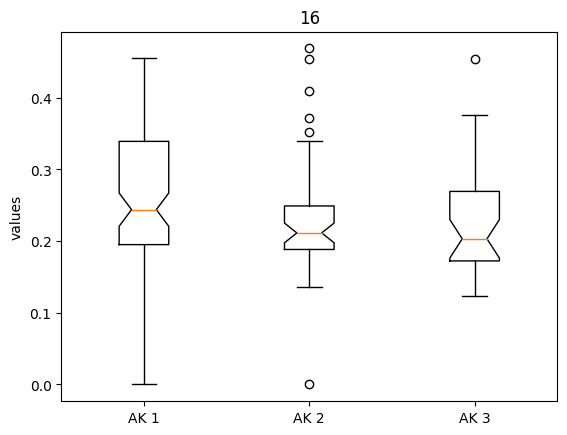

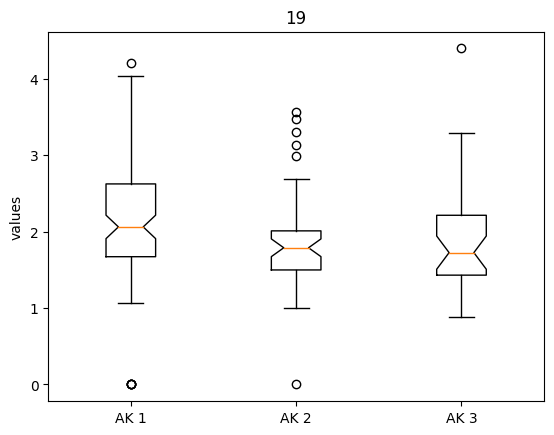

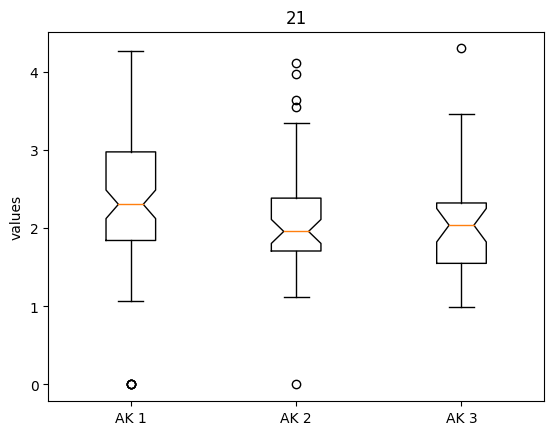

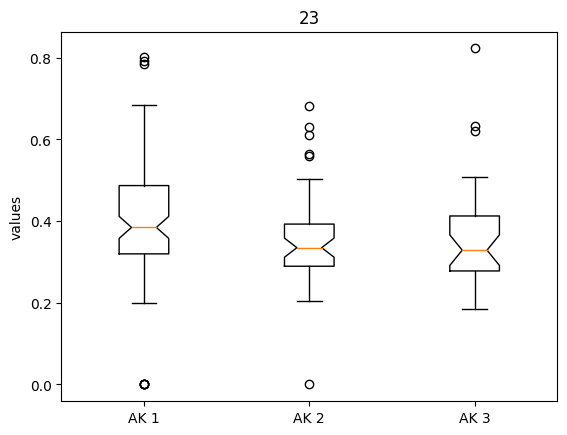

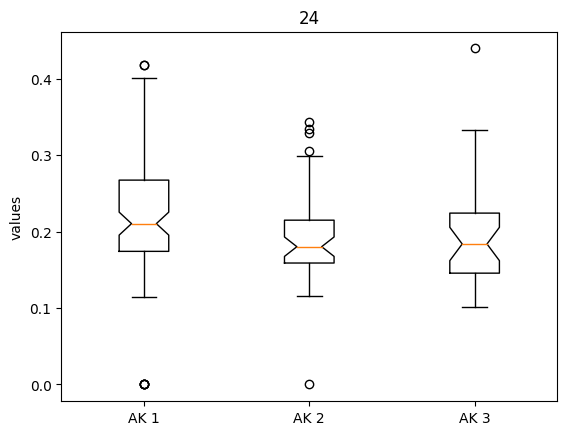

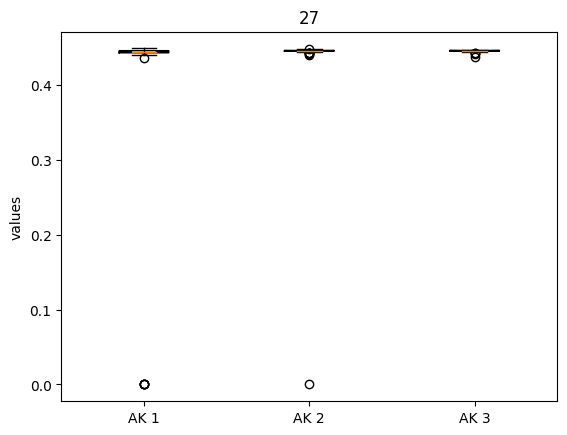

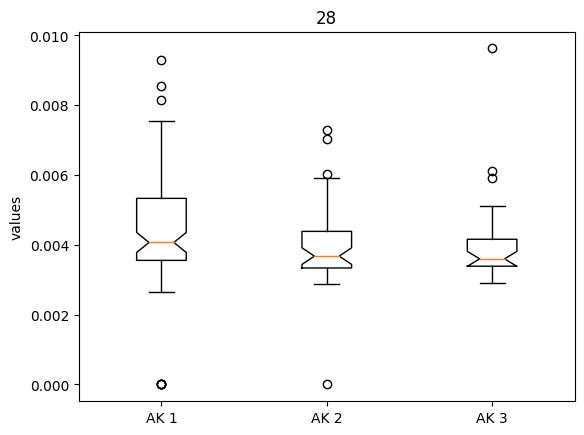

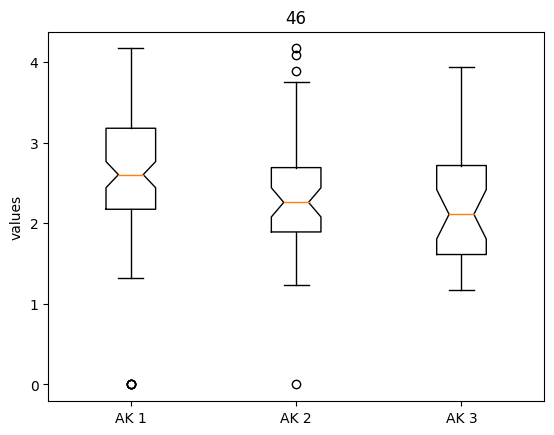

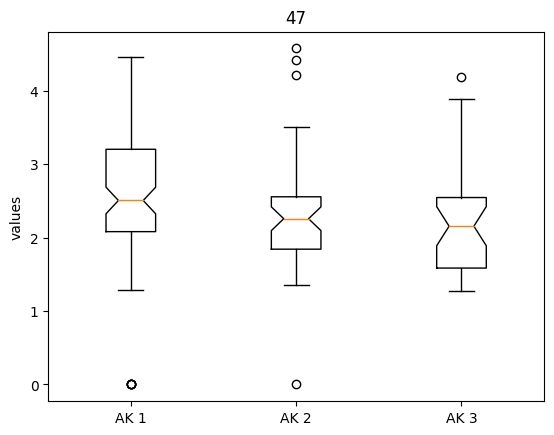

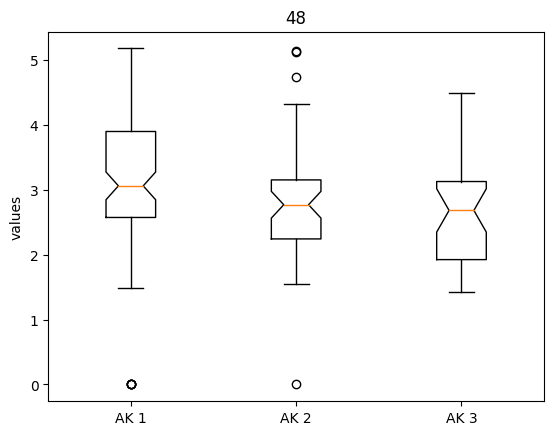

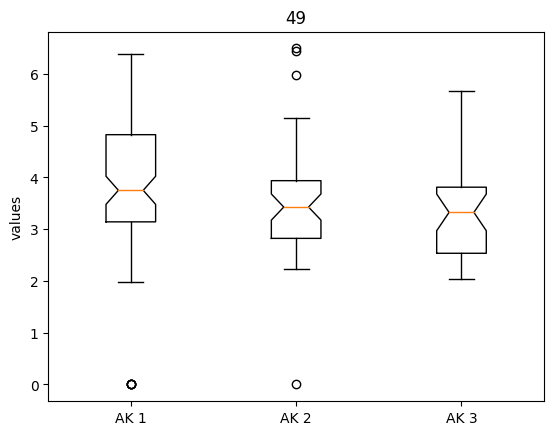

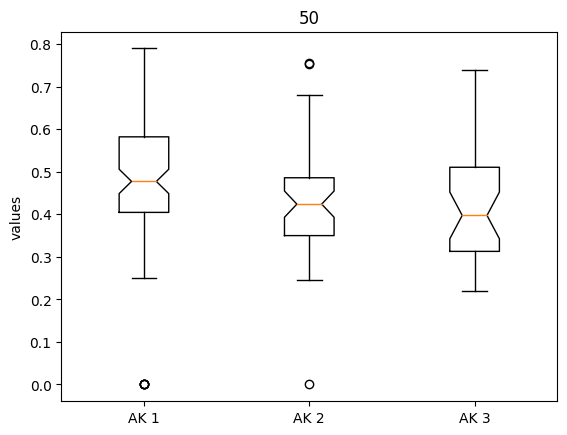

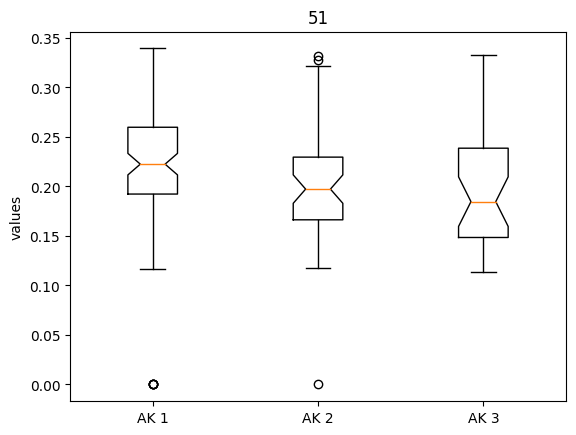

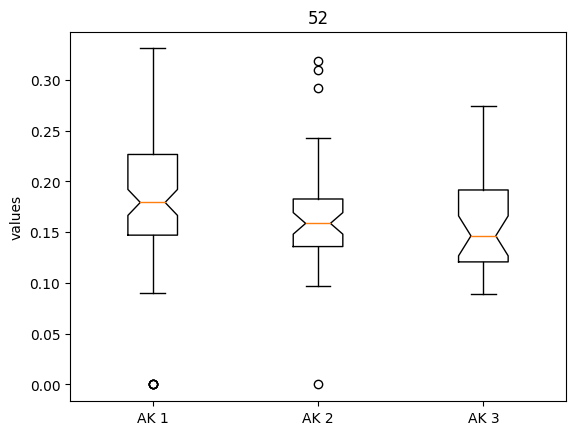

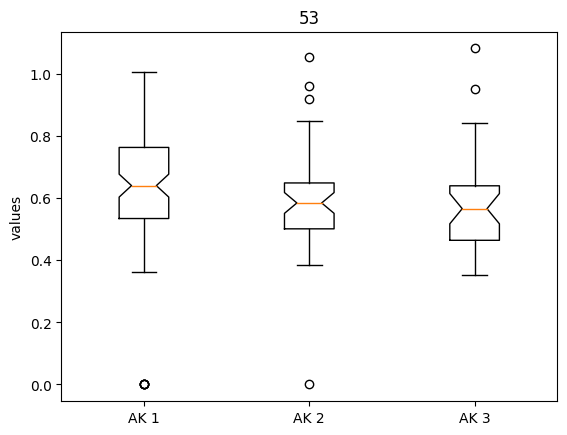

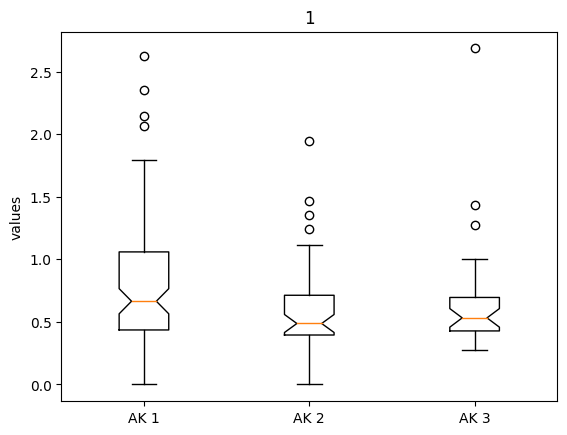

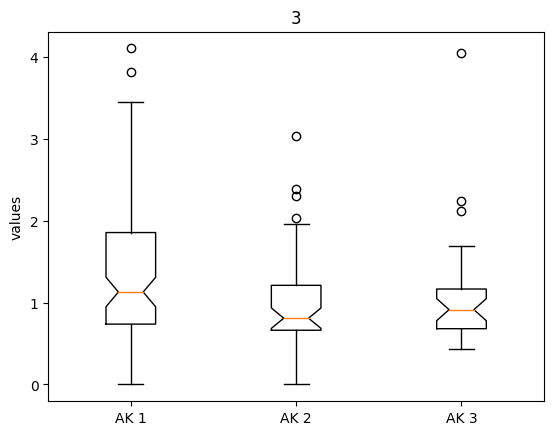

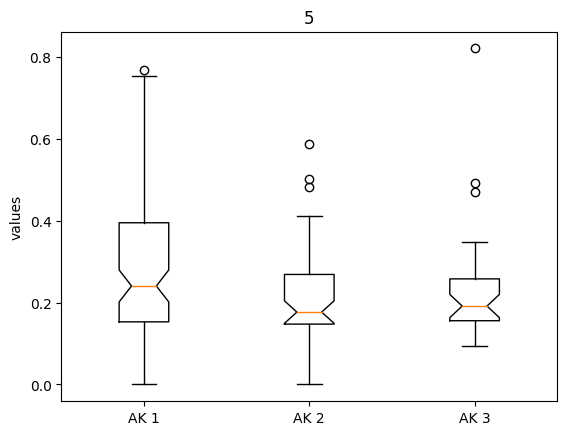

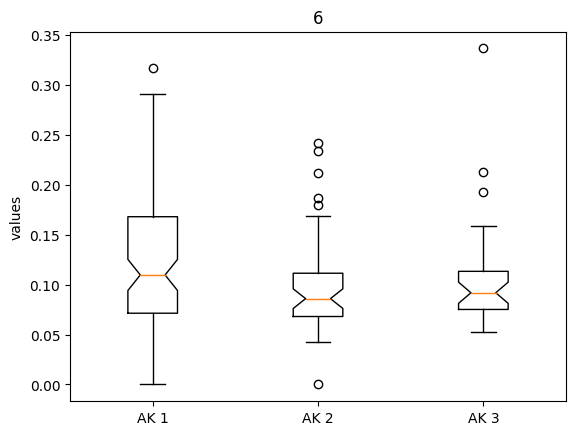

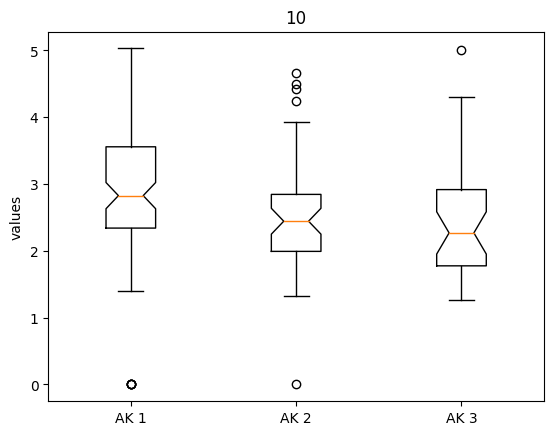

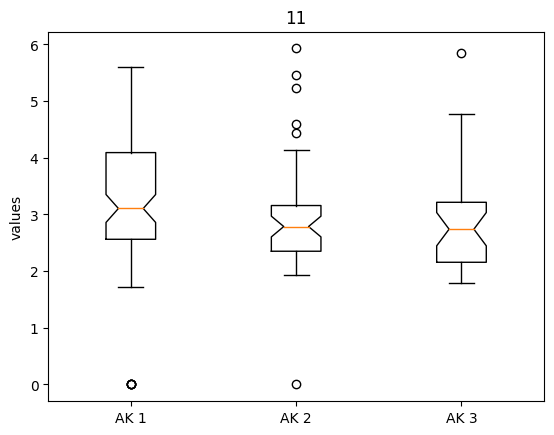

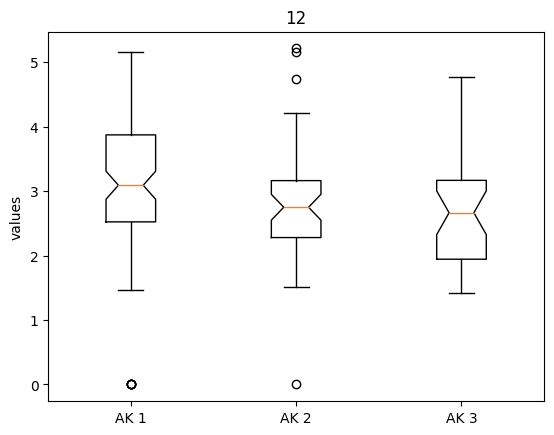

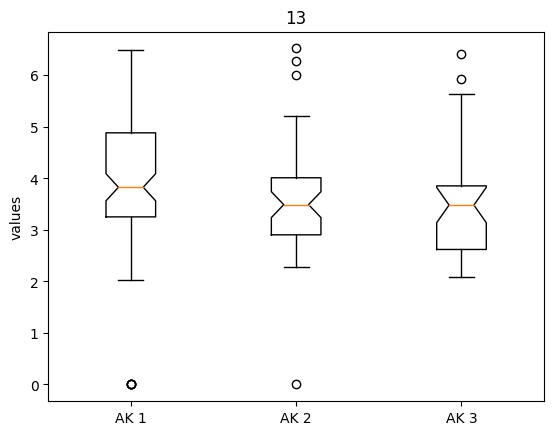

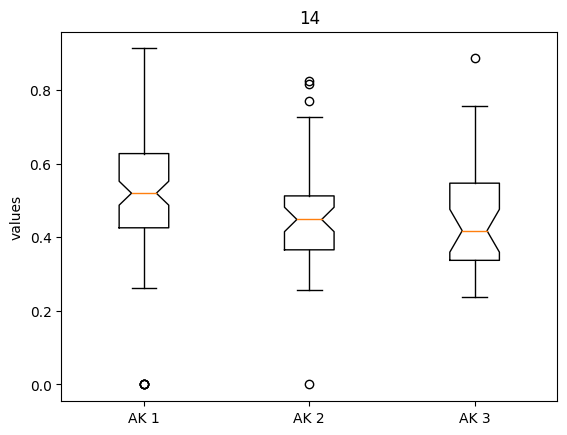

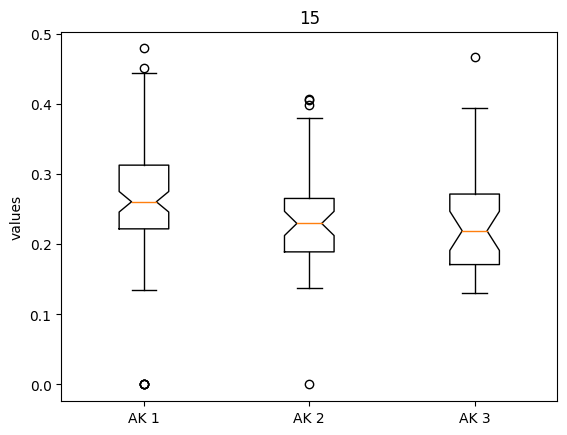

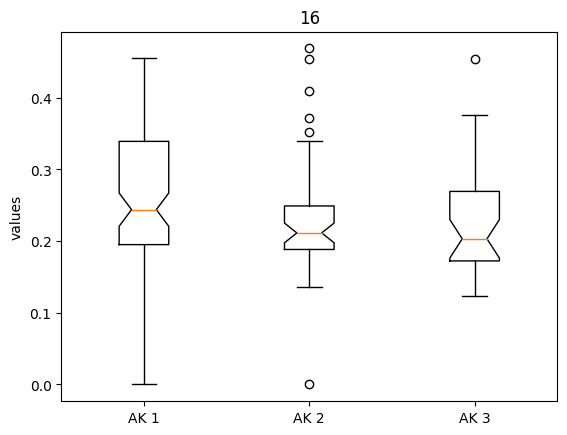

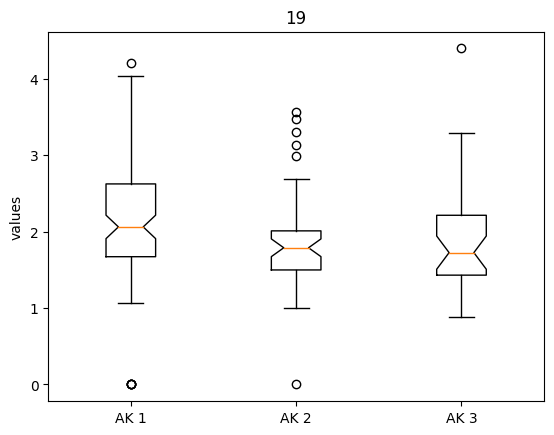

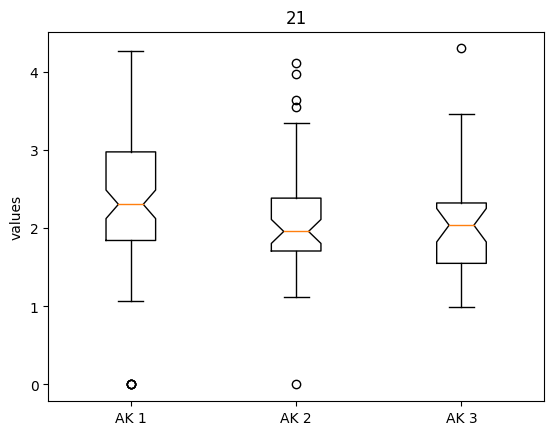

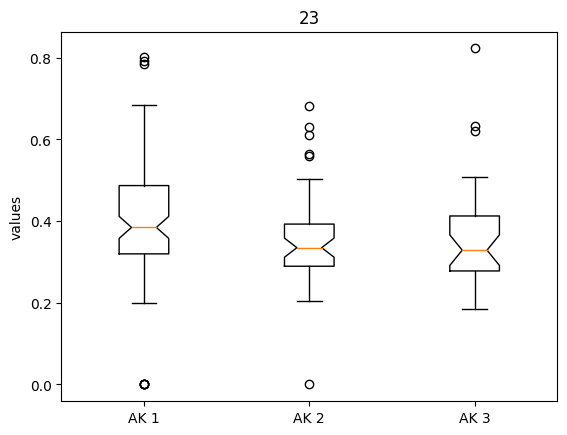

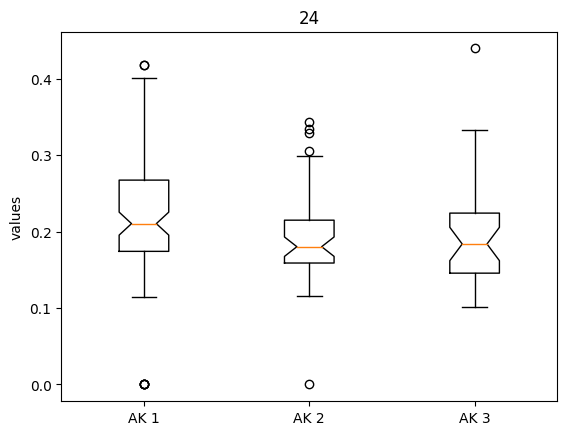

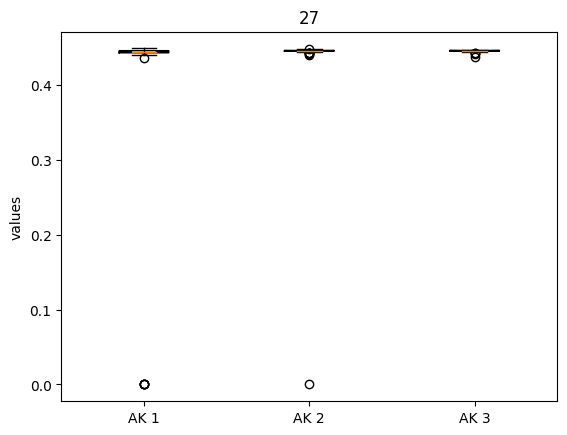

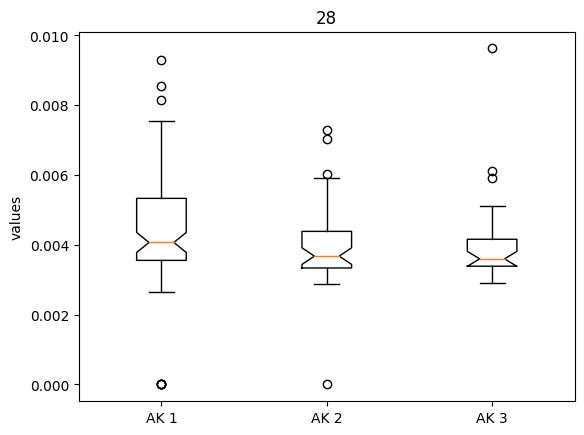

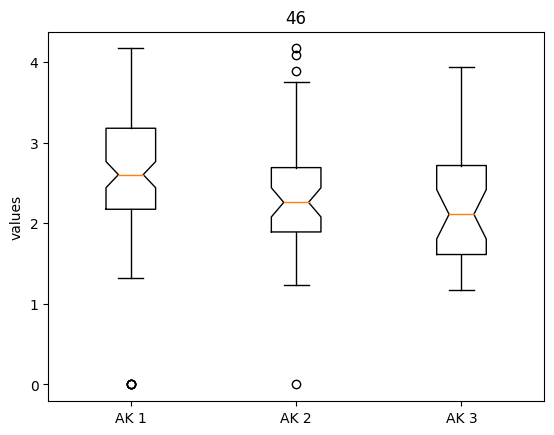

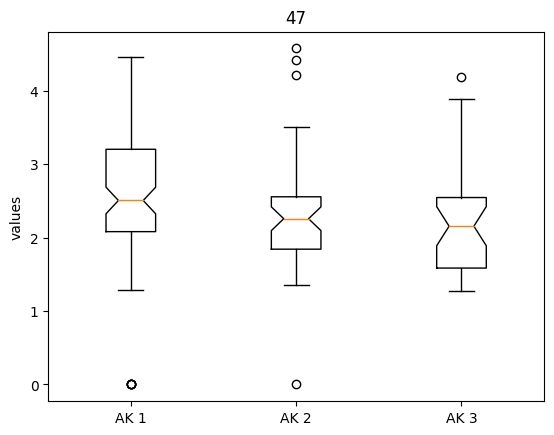

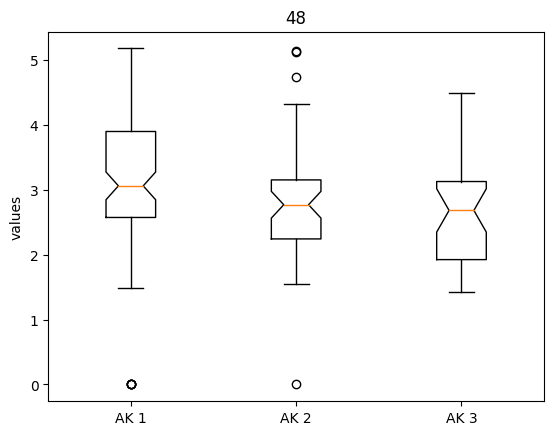

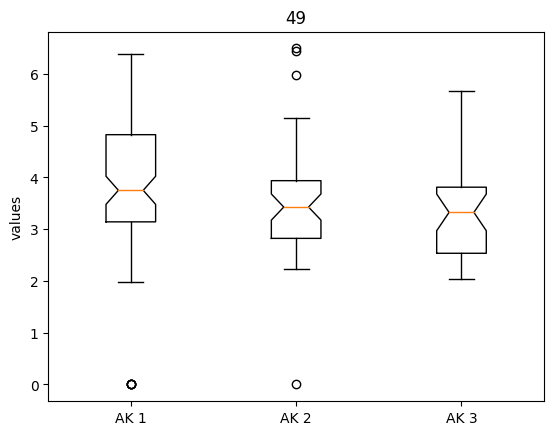

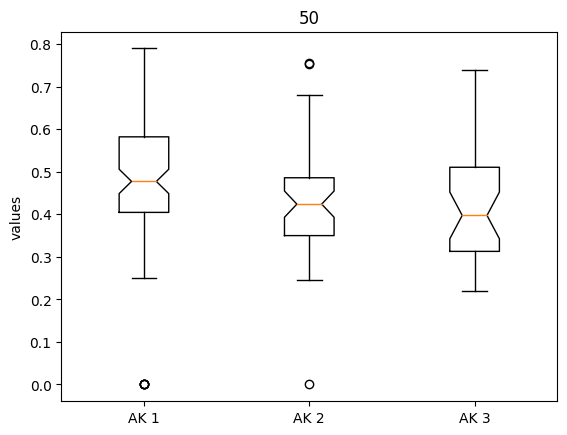

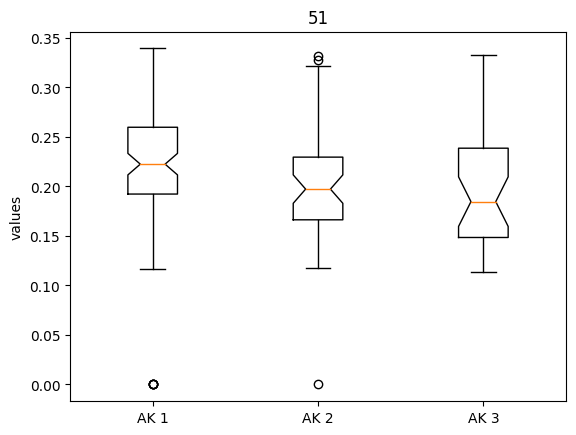

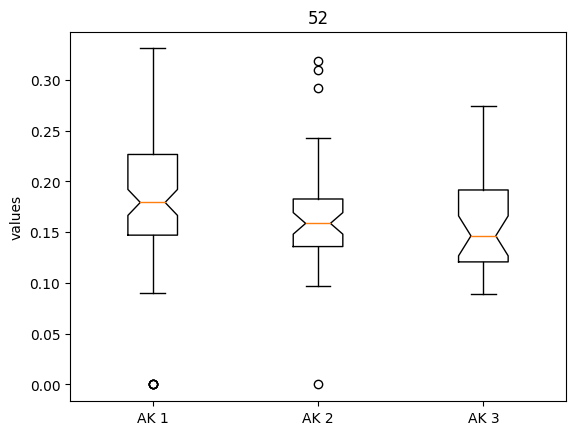

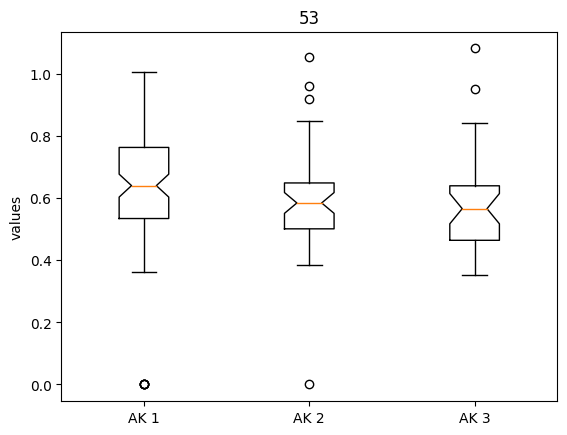

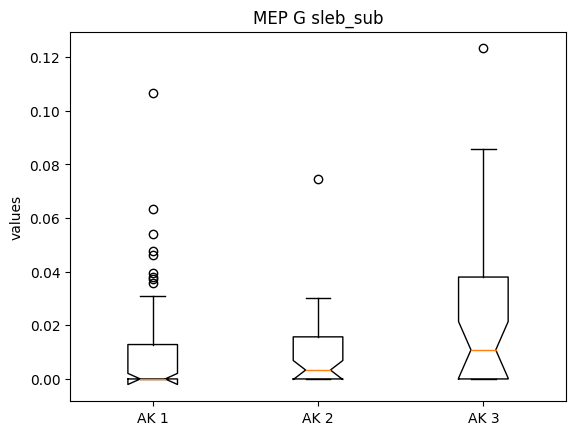

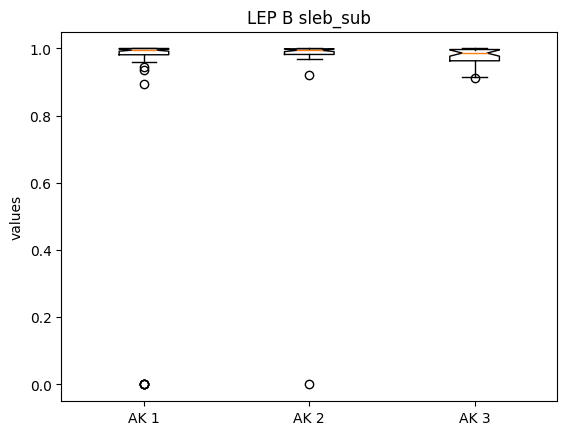

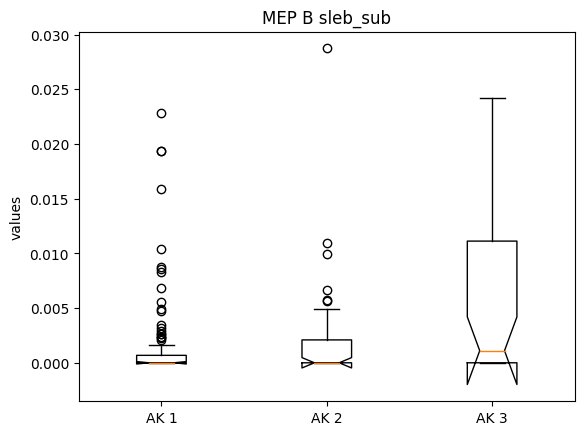

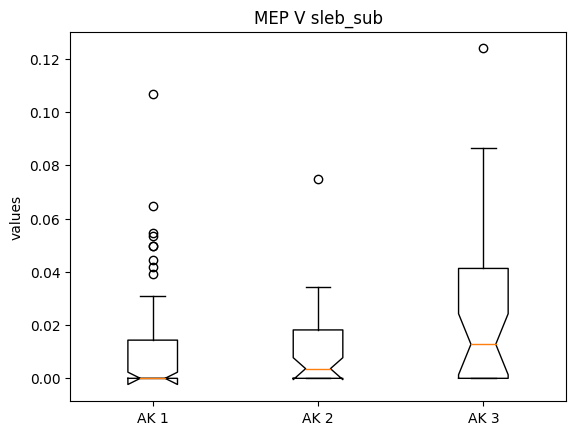

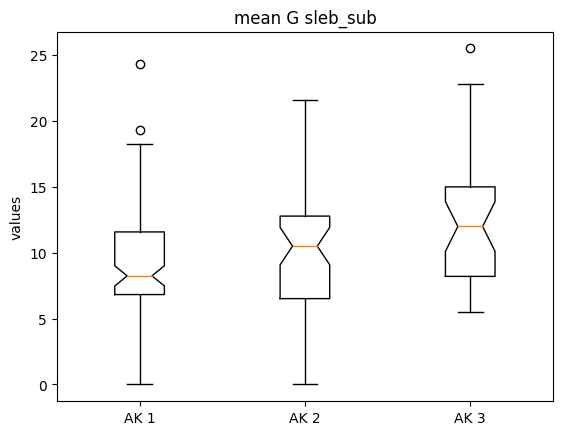

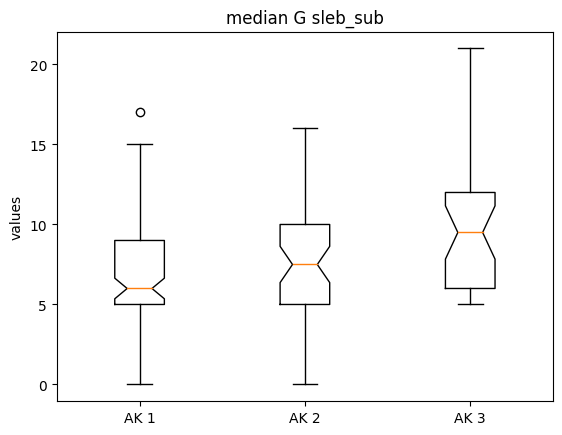

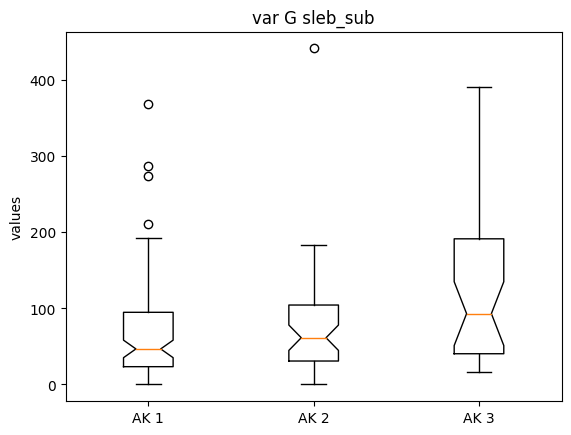

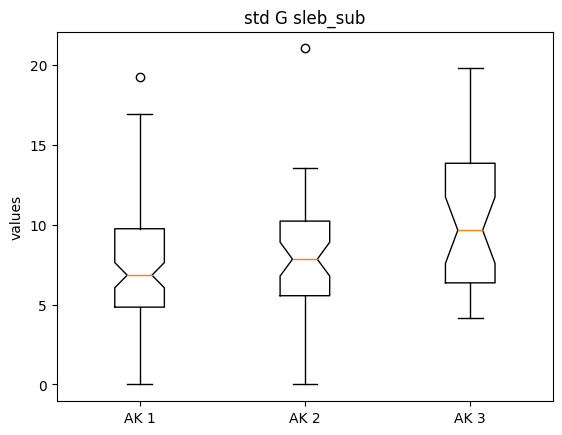

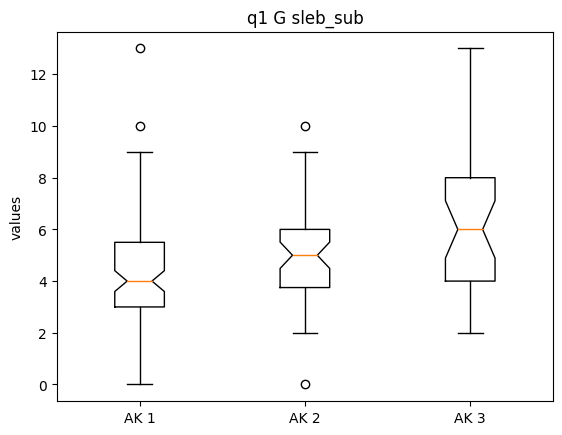

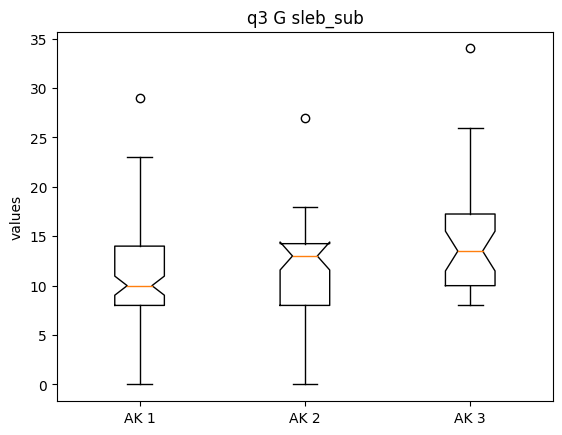

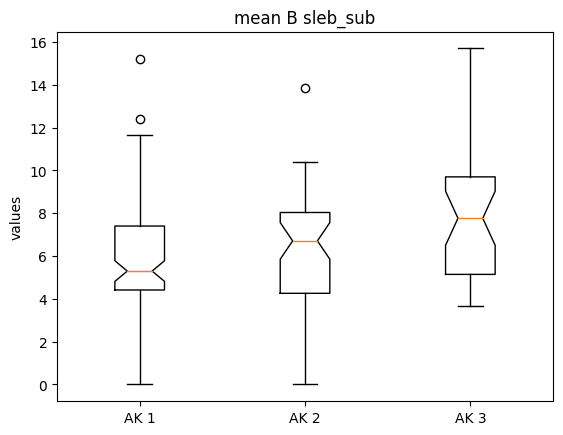

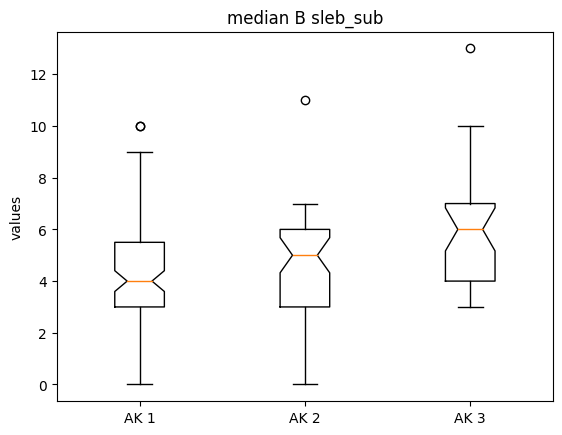

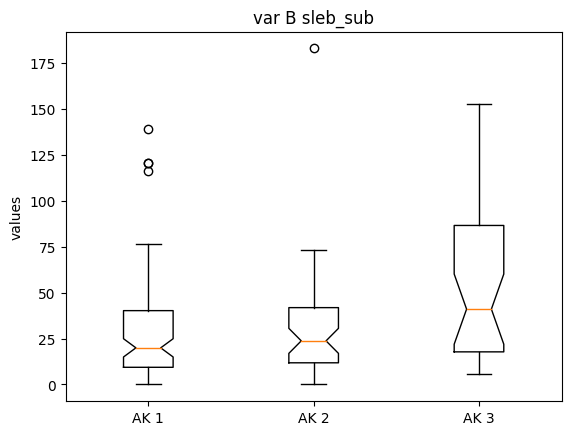

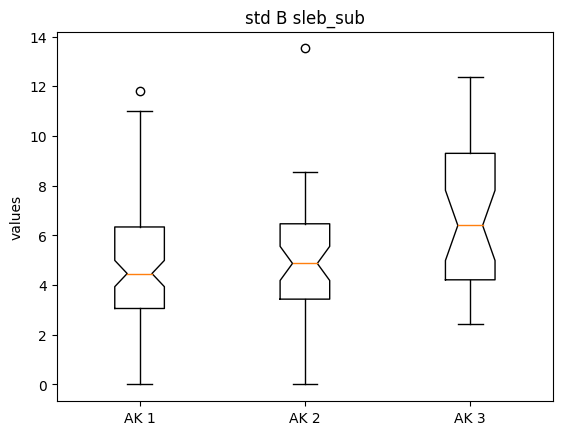

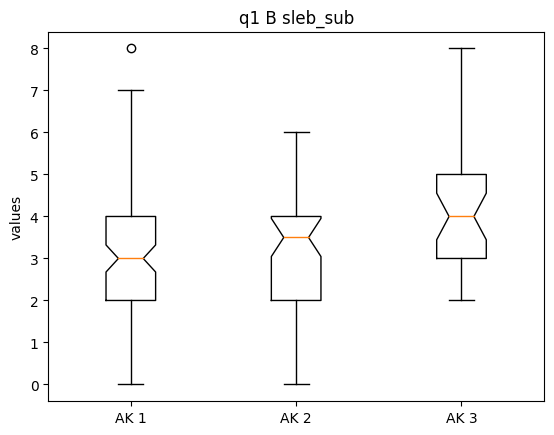

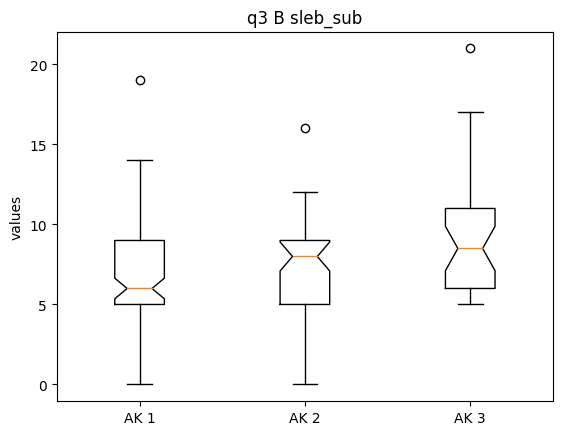

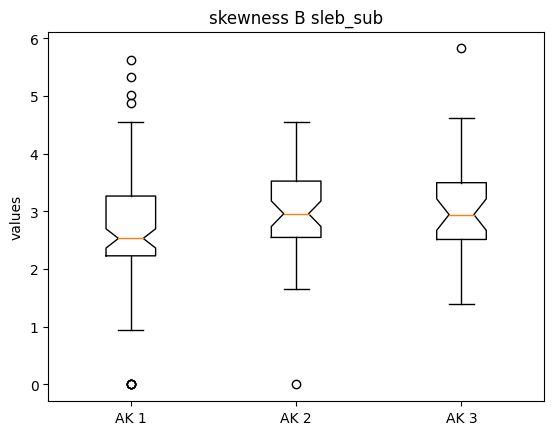

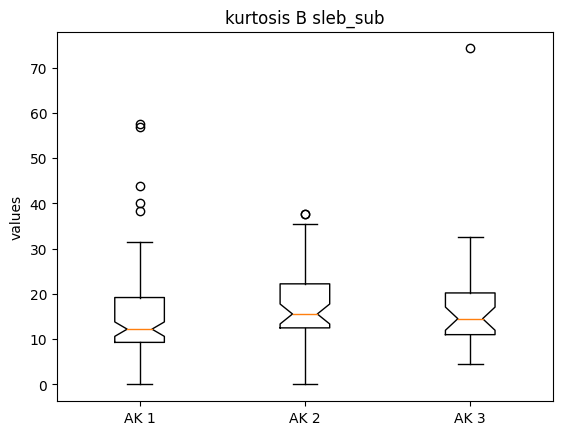

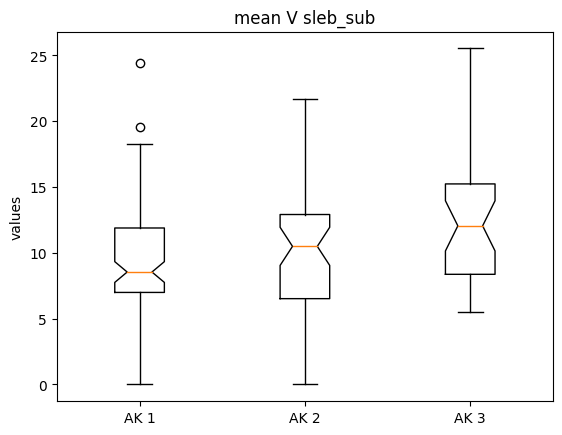

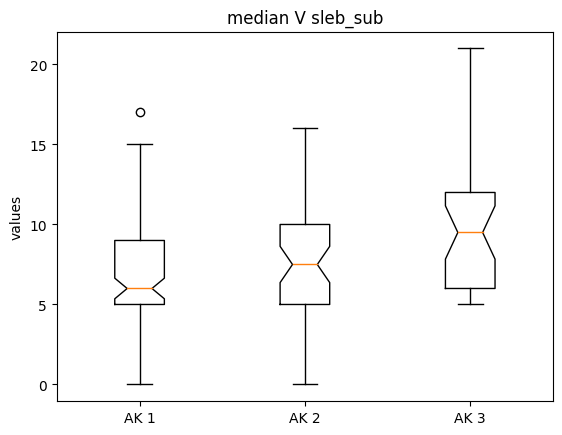

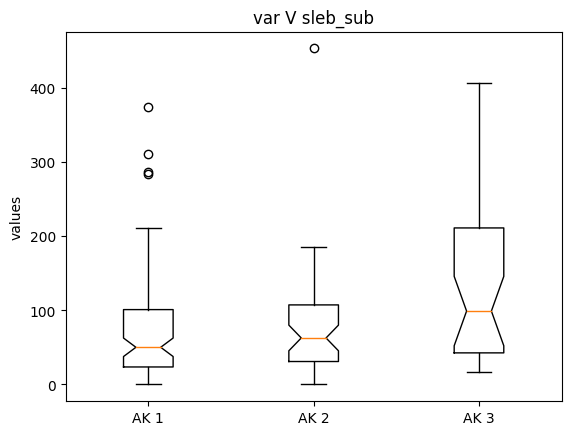

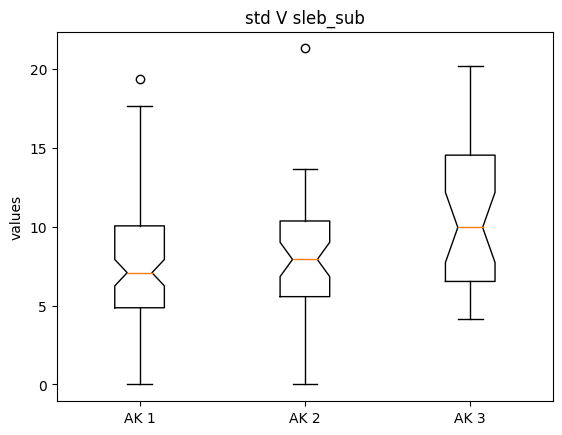

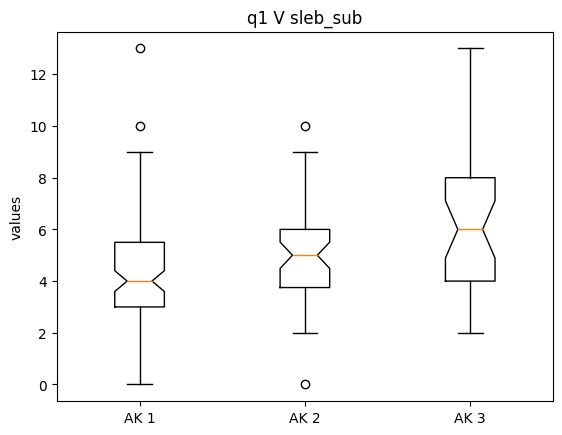

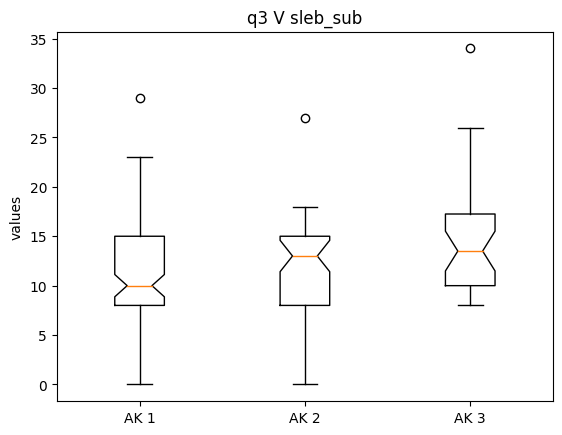

In [19]:
# browse through the directory and find the names of the feature files
path_ = '/content/drive/MyDrive/USG/analiza_AK/results3/'
pliki_idx = next(os.walk(path_))[2]

if "Thumbs.db" in pliki_idx:
    pliki_idx.remove("Thumbs.db")

pliki_size = len(pliki_idx)

Y = pd.read_csv('/content/drive/MyDrive/USG/analiza_AK/names_Y.csv', header=None).values
Y = Y[:, 1]


for n, id_ in enumerate(pliki_idx):
    pelna_nazwa = id_.split('.')
    PLIK_Z_CECHAMI = pelna_nazwa[0]
    print(PLIK_Z_CECHAMI)

    # Read all data from CSV
    if PLIK_Z_CECHAMI.__contains__('WAVE'):
        CECHY_ = pd.read_csv(path_ + PLIK_Z_CECHAMI + '.csv', header=None)
    else:
        CECHY_ = pd.read_csv(path_ + PLIK_Z_CECHAMI + '.csv')

    path_to_save_results = "/content/drive/MyDrive/USG/analiza_AK/statystyka_wyniki_4/"
    newpath = path_to_save_results + 'wykresy/' +  PLIK_Z_CECHAMI
    if not os.path.exists(newpath):
        os.makedirs(newpath)

    column_names = list(CECHY_.columns)
    CECHY = CECHY_.values

    # Shape of matrix with features
    w, k = CECHY.shape

    # empty lists
    ak1, ak2, ak3 = np.zeros((95, k)), np.zeros((48, k)), np.zeros((32, k))
    c1, c2, c3 = 0, 0, 0

    # Division of data into three groups on the basis of the Y-file
    for wiersz in range(0, 175):
        if Y[wiersz] == 1:
            ak1[c1, :] = CECHY[wiersz, :]
            c1 += 1
        elif Y[wiersz] == 2:
            ak2[c2, :] = CECHY[wiersz, :]
            c2 += 1
        elif Y[wiersz] == 3:
            ak3[c3, :] = CECHY[wiersz, :]
            c3 += 1

    print(column_names)

    # Initialisation of tables for results
    wyniki_nom = np.zeros((k, 5))
    wyniki_nom2 = np.zeros((k, 5))
    roznice_grupy = np.zeros((k, 3))
    cnt = 0
    data_tmp = []
    data_ = []

    # Analysis for each feature
    for i in range(0, k):
        # get feature name
        ft_name = column_names[i]
        Group1, Group2, Group3 = ak1[:, i], ak2[:, i], ak3[:, i]

        # normality and variance
        wyniki_nom[i, 0:3] = normality(Group1, Group2, Group3)
        wyniki_nom[i, 3] = varin(Group1, Group2, Group3).pvalue

        # if both normal and variance different -> we do ANOVE:
        if wyniki_nom[i, 0]  >= 0.05 and wyniki_nom[i,1]  >= 0.05 and wyniki_nom[i,2] >= 0.05 and wyniki_nom[i,3]  >= 0.05:#all(v >= 0.05 for v in wyniki_nom[i, :]):
            p_anova = get_anova(Group1, Group2, Group3)
            wyniki_nom[i, 4] = p_anova
            if p_anova < 0.05:  # there is a difference, we check between which groups
                # plot:
                plot_boxplot(Group1, Group2, Group3, ft_name)
                p_tukey = get_tukey(Group1, Group2, Group3)
                roznice_grupy[cnt, 0] = p_tukey[0, 1]  #  1 vs 2
                roznice_grupy[cnt, 1] = p_tukey[0, 2]  #  1 vs 3
                roznice_grupy[cnt, 2] = p_tukey[1, 2]  #  2 vs 3
                wyniki_nom2[cnt, :] = wyniki_nom[i, :]

                # save to dataframe results
                data_tmp.append({'variable_name': ft_name, 'norm1': wyniki_nom[i, 0], 'norm2': wyniki_nom[i, 1],
                                 'norm3': wyniki_nom[i, 2], 'vargrup': wyniki_nom[i, 3], 'anova_p': wyniki_nom[i, 4],
                                 'kw_p': 0,
                                 'tuk12': roznice_grupy[cnt, 0], 'tuk13': roznice_grupy[cnt, 1],
                                 'tuk23': roznice_grupy[cnt, 2], 'dun12': 0, 'dun13': 0, 'dun23': 0,})
                # save for later
                data_.append(ft_name)
                cnt = cnt + 1

        # IF NOT -> krusgallwallis:
        else:
            p_krus = get_kruskalwallis(Group1, Group2, Group3)
            wyniki_nom[i, 4] = p_krus
            if p_krus < 0.05:
                # plot :
                plot_boxplot(Group1, Group2, Group3, ft_name)
                p_dunn = get_dunn(Group1, Group2, Group3)
                roznice_grupy[cnt, 0] = p_dunn[0, 1]  #  1 vs 2
                roznice_grupy[cnt, 1] = p_dunn[0, 2]  #  1 vs 3
                roznice_grupy[cnt, 2] = p_dunn[1, 2]  #  2 vs 3
                wyniki_nom2[cnt, :] = wyniki_nom[i, :]
                # save ft to dataframe
                data_tmp.append({'variable_name': ft_name, 'norm1': wyniki_nom[i, 0], 'norm2': wyniki_nom[i, 1],
                                 'norm3': wyniki_nom[i, 2], 'vargrup': wyniki_nom[i, 3], 'anova_p': 0,
                                 'kw_p': wyniki_nom[i, 4],
                                 'tuk12': 0, 'tuk13': 0, 'tuk23': 0,
                                 'dun12': roznice_grupy[cnt, 0], 'dun13': roznice_grupy[cnt, 1],
                                 'dun23': roznice_grupy[cnt, 2]})
                data_.append(ft_name)
                cnt = cnt + 1


    # Save results to CSV
    results_df = pd.DataFrame(data_tmp)
    results_df.to_csv(path_to_save_results + PLIK_Z_CECHAMI + '_wyniki_dla_cech.csv', index=False)

    data_anova = CECHY_[data_]

    data_anova.to_csv(path_to_save_results +PLIK_Z_CECHAMI +  '_cechy_wazne.csv', index=False)